![Image of Yaktocat](https://logodownload.org/wp-content/uploads/2021/04/nhs-logo-3.png)

<div style="background-color:#005EB8; color:white; padding:20px; text-align:center; font-weight:bold; border-radius: 8px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">

<h2 style="font-size: 24px;">Diagnostic Analysis using Python - NHS case</h2>
    
</div>

<div style="color:#005EB8; font-weight:bold;">
    
## Import modules and display user-defined functions
    
</div>

In [1]:
# Data manipulation.
import pandas as pd
import numpy as np

# Data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Setting for this notebook.
%matplotlib inline

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set a style for the graphs.

import matplotlib.style as style

style.use('fivethirtyeight')
sns.set_context('talk')

<span style="color: #808080; font-style: italic;">User-defined functions</span>

In [3]:
def outliers(max_val, upper_limit, min_val, lower_limit):
    '''This is a user-defined function to determine if there are outliers to be removed.'''
    if (max_val > upper_limit) or (min_val < lower_limit):
        return 'There is at least one outlier to be removed.'
    else:
        return 'There are outliers to be removed.'


def barplot(column1, column2, df, title = 'Chart', xlabel = 'X Label', ylabel = 'Y label', yvalues = [], yticks = [], **kwargs):
    '''This user-defined function creates a bar chart.'''
    plt.figure(figsize = (12,8))
    sns.barplot(x = column1, y = column2, data = df, color = '#005EB8')
    plt.title(title, color = '#005EB8', size = 25, pad = 20)
    plt.xlabel(xlabel, color ='#005EB8', size = 15, ha = 'center', labelpad = 20)
    plt.ylabel(ylabel, color ='#005EB8', size = 15, ha = 'center', labelpad = 20)
    plt.xticks(size = 11, **kwargs)
    plt.yticks(yvalues, yticks, size = 11)
    plt.tight_layout()
    plt.show()


def metric(x, y):
    '''This user-defined function creates a metric of appointments by each doctor.'''
    appointments_doctor = (x / y).round(1)
    return appointments_doctor


# Create a function to show in percentage.
def share(t):
    '''This user-defined function transforms a column in a share between 0 and 100 and rounded.'''
    z = (t*100).round(1)
    return z
    

def capacity_day(m):
    '''This user-defined function returns an indication if the capacity of NHS is over the guideline.'''
    if m > max_capacity_day:
        return 'Yes'
    else:
        return 'No'


def calculate_growth_monthly(current_period, previous_period, df2, time_column, value_column):
    '''This user-defined function calculates the growth between two periods for doctors.'''
    growth_monthly = (((df2.loc[df2[time_column] == current_period, value_column].values[0] 
                       - df2.loc[df2[time_column] == previous_period, value_column].values[0]) 
                       / df2.loc[df2[time_column] == previous_period, value_column].values[0]) * 100).round(2)
    return growth_monthly

<div style="color:#005EB8; font-weight:bold;">
    
## Load, sense-check the data and some cleaning
    
</div>

**Actual Duration**

In [4]:
# Import the dataset.
ad = pd.read_csv('actual_duration.csv')

# Visualize.
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [5]:
# Make a copy of the raw data before starting to wrangle the data.
ad_raw = ad.copy()

In [6]:
# Check shape of dataset and the columns.
print(ad.shape)
print(ad.columns)

(137793, 8)
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


In [7]:
# Check columns and data types.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [8]:
# Information about the numerical columns.
ad.describe().round(2)

count_of_appointments
count              137793.00
mean                 1219.08
std                  1546.90
min                     1.00
25%                   194.00
50%                   696.00
75%                  1621.00
max                 15400.00

In [9]:
# Information about the other columns.
ad.describe(include='O')

sub_icb_location_code sub_icb_location_ons_code  \
count                 137793                    137793   
unique                   106                       106   
top                      26A                 E38000239   
freq                    1484                      1484   

                    sub_icb_location_name icb_ons_code region_ons_code  \
count                              137793       137793          137793   
unique                                106           42               7   
top     NHS Norfolk and Waveney ICB - 26A    E54000057       E40000010   
freq                                 1484        12668           33112   

       appointment_date         actual_duration  
count            137793                  137793  
unique              212                       7  
top           01-Dec-21  Unknown / Data Quality  
freq                742                   20161

In [10]:
# Check number of unique values.
ad.nunique()

sub_icb_location_code         106
sub_icb_location_ons_code     106
sub_icb_location_name         106
icb_ons_code                   42
region_ons_code                 7
appointment_date              212
actual_duration                 7
count_of_appointments        7611
dtype: int64

In [11]:
# Check for missing values.
ad.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [12]:
# Check for duplicate values.
ad.duplicated().sum()

0

In [13]:
# Check if the number of combinations in the DataFrame is equal to the number of rows.

# Select the columns needed.
ad_columns = ['sub_icb_location_code', 'sub_icb_location_ons_code', 'sub_icb_location_name', 'icb_ons_code',
              'region_ons_code', 'appointment_date', 'actual_duration']

# Combine the values in columns needed into a single Series.
ad_combined_series = ad[ad_columns].apply(tuple, axis=1)

# Calculate the number of unique combinations.
ad_unique_combinations = ad_combined_series.nunique()

# Print the objective.
if ad_unique_combinations == len(ad):
    print("Each row represents a unique combination!")
else:
    print("There are duplicate combinations in the DataFrame.")

Each row represents a unique combination!


<span style="color: #808080; font-style: italic;">Converting appointment_date to datetime type</span>

In [14]:
# Convert appointment date to datetime format.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# Check again the DateFrame.
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0       2021-12-01           31-60 Minutes                    364  
1       2021-12-01           21-30 Minutes                    619  
2       2021-12-01            6-10 Minutes                   1698  
3       2021-12-01  Unknown / Data Quality                   1277  
4       2021-12-01           16-20 Minutes                    730

**Appointments Regional**

In [15]:
# Import the dataset.
ar = pd.read_csv('appointments_regional.csv')

# Visualize.
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [16]:
# Make a copy of the raw data before starting to wrangle the data.
ar_raw = ar.copy()

In [17]:
# Check shape of dataset and the columns.
print(ar.shape)
print(ar.columns)

(596821, 7)
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


In [18]:
# Check columns and data types.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [19]:
# Information about the numerical columns.
ar.describe().round(2)

count_of_appointments
count              596821.00
mean                 1244.60
std                  5856.89
min                     1.00
25%                     7.00
50%                    47.00
75%                   308.00
max                211265.00

In [20]:
# Information about the other columns.
ar.describe(include='O')

icb_ons_code appointment_month appointment_status  \
count        596821            596821             596821   
unique           42                30                  3   
top       E54000057           2020-03           Attended   
freq          54527             21350             232137   

                    hcp_type appointment_mode  \
count                 596821           596821   
unique                     3                5   
top     Other Practice staff     Face-to-Face   
freq                  241557           180410   

       time_between_book_and_appointment  
count                             596821  
unique                                 8  
top                             Same Day  
freq                               95502

In [21]:
# Check number of unique values.
ar.nunique()

icb_ons_code                            42
appointment_month                       30
appointment_status                       3
hcp_type                                 3
appointment_mode                         5
time_between_book_and_appointment        8
count_of_appointments                22807
dtype: int64

In [22]:
# Check for missing values.
ar.isna().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [23]:
# Check for duplicate values.
ar.duplicated().sum()

21604

<span style="color: #808080; font-style: italic;">Deal with duplicates</span>

In [24]:
ar.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
596816    False
596817     True
596818    False
596819    False
596820     True
Length: 596821, dtype: bool

In [25]:
duplicated_rows = ar.duplicated()

# Display rows that are duplicates based on the selected columns.
duplicated_rows = ar[duplicated_rows].sort_values(by=['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
                                                      'appointment_mode', 'time_between_book_and_appointment',
                                                      'count_of_appointments'])

# Check
duplicated_rows

icb_ons_code appointment_month appointment_status  \
505707    E54000008           2020-01           Attended   
516594    E54000008           2020-01           Attended   
522453    E54000008           2020-01           Attended   
511261    E54000008           2020-01           Attended   
505709    E54000008           2020-01           Attended   
...             ...               ...                ...   
307333    E54000061           2022-06            Unknown   
307334    E54000061           2022-06            Unknown   
294829    E54000061           2022-06            Unknown   
307348    E54000061           2022-06            Unknown   
307349    E54000061           2022-06            Unknown   

                    hcp_type appointment_mode  \
505707                    GP     Face-to-Face   
516594                    GP     Face-to-Face   
522453                    GP     Face-to-Face   
511261                    GP     Face-to-Face   
505709                    GP       Home Visit   
...                      ...              ...   
307333  Other Practice staff     Video/Online   
307334               Unknown     Face-to-Face   
294829               Unknown     Face-to-Face   
307348               Unknown        Telephone   
307349               Unknown        Telephone   

       time_between_book_and_appointment  count_of_appointments  
505707            Unknown / Data Quality                      1  
516594            Unknown / Data Quality                      1  
522453            Unknown / Data Quality                      2  
511261            Unknown / Data Quality                      3  
505709                    15  to 21 Days                      1  
...                                  ...                    ...  
307333                          Same Day                      1  
307334                             1 Day                      4  
294829                    15  to 21 Days                      1  
307348                       2 to 7 Days                      4  
307349                    22  to 28 Days                      1  

[21604 rows x 7 columns]

In [26]:
# Check one duplicate example.
de1 = ar[
    (ar['icb_ons_code'] == 'E54000008') &
    (ar['appointment_month'] == '2020-01') &
    (ar['appointment_status'] == 'Attended') &
    (ar['hcp_type'] == 'GP') &
    (ar['appointment_mode'] == 'Face-to-Face') &
    (ar['time_between_book_and_appointment'] == 'Unknown / Data Quality')
]

de1.sort_values('count_of_appointments')
         

icb_ons_code appointment_month appointment_status hcp_type  \
496290    E54000008           2020-01           Attended       GP   
505707    E54000008           2020-01           Attended       GP   
516594    E54000008           2020-01           Attended       GP   
487191    E54000008           2020-01           Attended       GP   
522453    E54000008           2020-01           Attended       GP   
491544    E54000008           2020-01           Attended       GP   
511261    E54000008           2020-01           Attended       GP   
529546    E54000008           2020-01           Attended       GP   

       appointment_mode time_between_book_and_appointment  \
496290     Face-to-Face            Unknown / Data Quality   
505707     Face-to-Face            Unknown / Data Quality   
516594     Face-to-Face            Unknown / Data Quality   
487191     Face-to-Face            Unknown / Data Quality   
522453     Face-to-Face            Unknown / Data Quality   
491544     Face-to-Face            Unknown / Data Quality   
511261     Face-to-Face            Unknown / Data Quality   
529546     Face-to-Face            Unknown / Data Quality   

        count_of_appointments  
496290                      1  
505707                      1  
516594                      1  
487191                      2  
522453                      2  
491544                      3  
511261                      3  
529546                     19

In [27]:
# Check another duplicate example.
de2 = ar[
    (ar['icb_ons_code'] == 'E54000061') &
    (ar['appointment_month'] == '2022-06') &
    (ar['appointment_status'] == 'Unknown') &
    (ar['hcp_type'] == 'Unknown') &
    (ar['appointment_mode'] == 'Telephone') &
    (ar['time_between_book_and_appointment'] == '2 to 7 Days')
]

de2

icb_ons_code appointment_month appointment_status hcp_type  \
289282    E54000061           2022-06            Unknown  Unknown   
307348    E54000061           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
289282        Telephone                       2 to 7 Days   
307348        Telephone                       2 to 7 Days   

        count_of_appointments  
289282                      4  
307348                      4

Duplicates will stay and we will create a new DataFrame with the sum of the count_of_appointments.

In [28]:
# Group by all the columns.
ar = ar.groupby(['icb_ons_code', 'appointment_month', 'appointment_status',
                 'hcp_type', 'appointment_mode',
                 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

In [29]:
# Check the shape of new data.
ar.shape

(295692, 7)

In [30]:
# Check new DataFrame.
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000008           2020-01           Attended       GP     Face-to-Face   
1    E54000008           2020-01           Attended       GP     Face-to-Face   
2    E54000008           2020-01           Attended       GP     Face-to-Face   
3    E54000008           2020-01           Attended       GP     Face-to-Face   
4    E54000008           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                  32181  
1                    15  to 21 Days                  23190  
2                       2 to 7 Days                  83788  
3                    22  to 28 Days                  16172  
4                     8  to 14 Days                  53405

In [31]:
# Check duplicates.
ar.duplicated().sum()

0

In [32]:
# Analyze new column.
ar.describe().round(2)

count_of_appointments
count              295692.00
mean                 2512.09
std                 11026.70
min                     1.00
25%                     8.00
50%                    75.00
75%                   587.00
max                272700.00

In [33]:
# Information about new values.
ar.describe(include='O')

icb_ons_code appointment_month appointment_status  \
count        295692            295692             295692   
unique           42                30                  3   
top       E54000057           2020-03           Attended   
freq           9269             10634             111148   

                    hcp_type appointment_mode  \
count                 295692           295692   
unique                     3                5   
top     Other Practice staff     Face-to-Face   
freq                  116066            79154   

       time_between_book_and_appointment  
count                             295692  
unique                                 8  
top                             Same Day  
freq                               44798

In [34]:
# Check new duplicate example.
nde1 = ar[
    (ar['icb_ons_code'] == 'E54000008') &
    (ar['appointment_month'] == '2020-01') &
    (ar['appointment_status'] == 'Attended') &
    (ar['hcp_type'] == 'GP') &
    (ar['appointment_mode'] == 'Face-to-Face') &
    (ar['time_between_book_and_appointment'] == 'Unknown / Data Quality')
]

nde1

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
7    E54000008           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
7            Unknown / Data Quality                     32

In [35]:
# Check new duplicate example.
nde2 = ar[
    (ar['icb_ons_code'] == 'E54000061') &
    (ar['appointment_month'] == '2022-06') &
    (ar['appointment_status'] == 'Unknown') &
    (ar['hcp_type'] == 'Unknown') &
    (ar['appointment_mode'] == 'Telephone') &
    (ar['time_between_book_and_appointment'] == '2 to 7 Days')
]

nde2

icb_ons_code appointment_month appointment_status hcp_type  \
288119    E54000061           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
288119        Telephone                       2 to 7 Days   

        count_of_appointments  
288119                      8

In [36]:
# Check if the number of combinations in the DataFrame is equal to the number of rows.

# Select the columns needed.
ar_columns = ['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
              'appointment_mode', 'time_between_book_and_appointment']

# Combine the values in columns needed into a single Series.
ar_combined_series = ar[ar_columns].apply(tuple, axis=1)

# Calculate the number of unique combinations.
ar_unique_combinations = ar_combined_series.nunique()

# Print the objective.
if ar_unique_combinations == len(ar):
    print("Each row represents a unique combination!")
else:
    print("There are duplicate combinations in the DataFrame.")

Each row represents a unique combination!


<span style="color: #808080; font-style: italic;">Clean extra spaces in time_between_book_and_appointment column</span>

In [37]:
# Clean the specific values in the column
ar['time_between_book_and_appointment'] = ar['time_between_book_and_appointment'].str.replace('  to ', ' to ', regex=False)

<span style="color: #808080; font-style: italic;">Converting appointment_date to datetime type</span>

In [38]:
# Convert appointment date to datetime format.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# Check again the DateFrame.
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000008        2020-01-01           Attended       GP     Face-to-Face   
1    E54000008        2020-01-01           Attended       GP     Face-to-Face   
2    E54000008        2020-01-01           Attended       GP     Face-to-Face   
3    E54000008        2020-01-01           Attended       GP     Face-to-Face   
4    E54000008        2020-01-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                  32181  
1                     15 to 21 Days                  23190  
2                       2 to 7 Days                  83788  
3                     22 to 28 Days                  16172  
4                      8 to 14 Days                  53405

In [39]:
ar.dtypes

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object

**National Categories**

In [40]:
# Import the dataset.
nc = pd.read_excel('national_categories.xlsx')

# Visualize.
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [41]:
# Make a copy of the raw data before starting to wrangle the data.
nc_raw = nc.copy()

In [42]:
# Check shape of dataset and the columns.
print(nc.shape)
print(nc.columns)

(817394, 8)
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


In [43]:
# Check columns and data types.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [44]:
# Information about the numerical columns.
nc.describe().round(2)

appointment_date  count_of_appointments
count                         817394              817394.00
mean   2022-01-16 00:50:35.860796160                 362.18
min              2021-08-01 00:00:00                   1.00
25%              2021-10-25 00:00:00                   7.00
50%              2022-01-18 00:00:00                  25.00
75%              2022-04-07 00:00:00                 128.00
max              2022-06-30 00:00:00               16590.00
std                              NaN                1084.58

In [45]:
# Information about the other columns.
nc.describe(include='O')

icb_ons_code              sub_icb_location_name   service_setting  \
count        817394                             817394            817394   
unique           42                                106                 5   
top       E54000057  NHS North West London ICB - W2U3Z  General Practice   
freq          59180                              13007            359274   

                  context_type     national_category appointment_month  
count                   817394                817394            817394  
unique                       3                    18                11  
top     Care Related Encounter  Inconsistent Mapping           2022-03  
freq                    700481                 89494             82822

In [46]:
# Check number of unique values.
nc.nunique()

appointment_date          334
icb_ons_code               42
sub_icb_location_name     106
service_setting             5
context_type                3
national_category          18
count_of_appointments    9957
appointment_month          11
dtype: int64

In [47]:
# Check for missing values.
nc.isna().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [48]:
# Check for duplicate values.
nc.duplicated().sum()

0

In [49]:
# Check if the number of combinations in the DataFrame is equal to the number of rows.

# Select the columns needed.
nc_columns = ['appointment_date', 'icb_ons_code', 'sub_icb_location_name', 'service_setting', 'context_type',
              'national_category', 'count_of_appointments', 'appointment_month']

# Combine the values in columns needed into a single Series.
nc_combined_series = nc[nc_columns].apply(tuple, axis=1)

# Calculate the number of unique combinations.
nc_unique_combinations = nc_combined_series.nunique()

# Print the objective.
if nc_unique_combinations == len(nc):
    print("Each row represents a unique combination!")
else:
    print("There are duplicate combinations in the DataFrame.")

Each row represents a unique combination!


<span style="color: #808080; font-style: italic;">Converting appointment_date to datetime type</span>

In [50]:
# Convert appointment date to datetime format.
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Check again the DateFrame.
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [51]:
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

**NHS Regions**

In [52]:
# Import the dataset.
nr = pd.read_csv('nhs_regions.csv')

# Visualize.
nr

NHSER22CD NHSER22CDH                 NHSER22NM
0  E40000003        Y56                    London
1  E40000005        Y59                South East
2  E40000006        Y58                South West
3  E40000007        Y61           East of England
4  E40000010        Y62                North West
5  E40000011        Y60                  Midlands
6  E40000012        Y63  North East and Yorkshire

In [53]:
# Rename the columns.
nr = nr.rename(columns = {'NHSER22CD': 'region_ons_code',
                          'NHSER22CDH': 'region_code',
                          'NHSER22NM': 'region_name'})

# Visualize with new column names.
nr

region_ons_code region_code               region_name
0       E40000003         Y56                    London
1       E40000005         Y59                South East
2       E40000006         Y58                South West
3       E40000007         Y61           East of England
4       E40000010         Y62                North West
5       E40000011         Y60                  Midlands
6       E40000012         Y63  North East and Yorkshire

In [54]:
# Make a copy of the raw data before starting to wrangle the data.
nr_raw = nr.copy()

In [55]:
# Check shape of dataset and the columns.
print(nr.shape)
print(nr.columns)

(7, 3)
Index(['region_ons_code', 'region_code', 'region_name'], dtype='object')


In [56]:
# Check columns and data types.
nr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   region_ons_code  7 non-null      object
 1   region_code      7 non-null      object
 2   region_name      7 non-null      object
dtypes: object(3)
memory usage: 300.0+ bytes


In [57]:
# Check number of unique values.
nr.nunique()

region_ons_code    7
region_code        7
region_name        7
dtype: int64

**NHS Staff**

In [58]:
# Import the dataset.
nhs_staff = pd.read_csv('nhs_staff.csv')

# Visualize.
nhs_staff

NHS England Region Code  2021-12  2022-01  2022-02  2022-03  2022-04  \
0                     Y56     5384     5334     5356     5336     5333   
1                     Y58     3731     3704     3744     3721     3709   
2                     Y59     4984     4956     4963     4938     4937   
3                     Y60     7055     7050     6989     6960     6945   
4                     Y61     3794     3779     3810     3794     3785   
5                     Y62     4823     4828     4893     4879     4802   
6                     Y63     5487     5437     5507     5486     5461   

   2022-05  2022-06  
0     5287     5282  
1     3679     3649  
2     4950     4930  
3     6871     6923  
4     3768     3738  
5     4777     4740  
6     5428     5324

In [59]:
# Transform the nhs_staff DataFrame.

# Melt the DataFrame.
ns = pd.melt(nhs_staff, id_vars = 'NHS England Region Code', var_name = 'month', value_name = 'doctors')

# Rename columns.
ns = ns.rename(columns = {'NHS England Region Code': 'region_ons_code'})

# Visualize.
ns.head(10)

region_ons_code    month  doctors
0             Y56  2021-12     5384
1             Y58  2021-12     3731
2             Y59  2021-12     4984
3             Y60  2021-12     7055
4             Y61  2021-12     3794
5             Y62  2021-12     4823
6             Y63  2021-12     5487
7             Y56  2022-01     5334
8             Y58  2022-01     3704
9             Y59  2022-01     4956

In [60]:
# Make a copy of the raw data before starting to wrangle the data.
ns_raw = ns.copy()

In [61]:
# Check shape of dataset and the columns.
print(ns.shape)
print(ns.columns)

(49, 3)
Index(['region_ons_code', 'month', 'doctors'], dtype='object')


In [62]:
# Check columns and data types.
ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   region_ons_code  49 non-null     object
 1   month            49 non-null     object
 2   doctors          49 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [63]:
# Information about the numerical columns.
ns.describe().round(2)

doctors
count    49.00
mean   5000.82
std    1038.86
min    3649.00
25%    3794.00
50%    4950.00
75%    5428.00
max    7055.00

In [64]:
# Information about the other columns.
ns.describe(include='O')

region_ons_code    month
count               49       49
unique               7        7
top                Y56  2021-12
freq                 7        7

In [65]:
# Check number of unique values.
ns.nunique()

region_ons_code     7
month               7
doctors            48
dtype: int64

In [66]:
# Check for missing values.
ns.isna().sum()

region_ons_code    0
month              0
doctors            0
dtype: int64

<span style="color: #808080; font-style: italic;">Converting month to datetime type</span>

In [67]:
# Assuming 'month' is the column containing the appointment dates.
ns['month'] = pd.to_datetime(ns['month'])

In [68]:
ns.dtypes

region_ons_code            object
month              datetime64[ns]
doctors                     int64
dtype: object

**Outlier Analysis**

<span style="color: #808080; font-style: italic;">Actual Duration</span>

In [69]:
# Quantiles.
q1_ad = ad['count_of_appointments'].quantile(0.25)
q3_ad = ad['count_of_appointments'].quantile(0.75)
IQR_ad = q3_ad - q1_ad
upper_limit_ad = q3_ad + 1.5 * IQR_ad
lower_limit_ad = q1_ad - 1.5 * IQR_ad

print("Quantile 1 -", q1_ad)
print("Quantile 3 -", q3_ad)
print("Interquantile Range -", IQR_ad)
print("Lower Limit -", lower_limit_ad)
print("Upper Limit -", upper_limit_ad)

Quantile 1 - 194.0
Quantile 3 - 1621.0
Interquantile Range - 1427.0
Lower Limit - -1946.5
Upper Limit - 3761.5


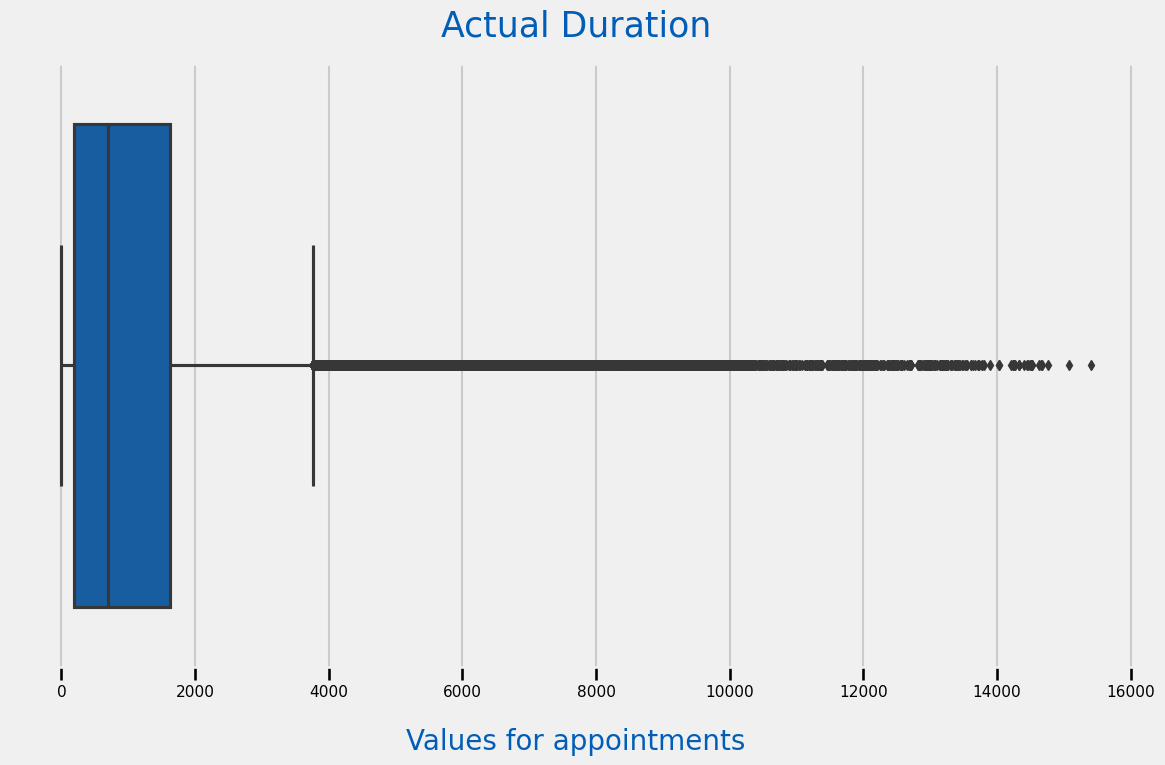

In [70]:
# Visualize in a graph.
plt.figure(figsize = (12,8))
sns.boxplot(x = 'count_of_appointments', data = ad, color='#005EB8')
plt.title('Actual Duration', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Values for appointments', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([])
plt.tight_layout()
plt.savefig('outliers.png')
plt.show()

In [71]:
outliers(ad['count_of_appointments'].max(), upper_limit_ad, ad['count_of_appointments'].min(), lower_limit_ad)

'There is at least one outlier to be removed.'

<span style="color: #808080; font-style: italic;">Appointments Regional</span>

In [72]:
# Quantiles.
q1_ar = ar['count_of_appointments'].quantile(0.25)
q3_ar = ar['count_of_appointments'].quantile(0.75)
IQR_ar = q3_ar - q1_ar
upper_limit_ar = q3_ar + 1.5 * IQR_ar
lower_limit_ar = q1_ar - 1.5 * IQR_ar

print("Quantile 1 -", q1_ar)
print("Quantile 3 -", q3_ar)
print("Interquantile Range -", IQR_ar)
print("Lower Limit -", lower_limit_ar)
print("Upper Limit -", upper_limit_ar)

Quantile 1 - 8.0
Quantile 3 - 587.0
Interquantile Range - 579.0
Lower Limit - -860.5
Upper Limit - 1455.5


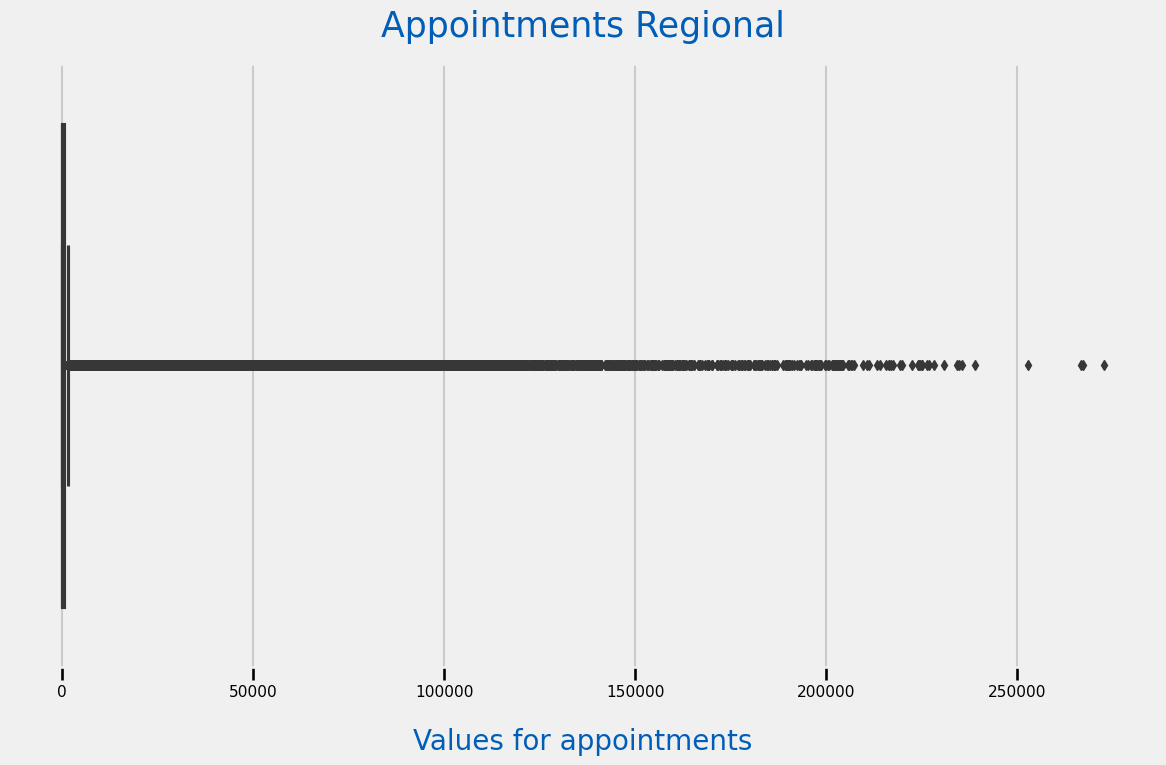

In [73]:
# Visualize in a graph.
plt.figure(figsize = (12,8))
sns.boxplot(x = 'count_of_appointments', data = ar, color='#005EB8')
plt.title('Appointments Regional', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Values for appointments', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([])
plt.tight_layout()
plt.show()

In [74]:
outliers(ar['count_of_appointments'].max(), upper_limit_ar, ar['count_of_appointments'].min(), lower_limit_ar)

'There is at least one outlier to be removed.'

In [75]:
# Create a DataFrame with the outliers.
over_ar = ar[ar['count_of_appointments'] >= upper_limit_ar]

# Visualize.
over_ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000008        2020-01-01           Attended       GP     Face-to-Face   
1    E54000008        2020-01-01           Attended       GP     Face-to-Face   
2    E54000008        2020-01-01           Attended       GP     Face-to-Face   
3    E54000008        2020-01-01           Attended       GP     Face-to-Face   
4    E54000008        2020-01-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                  32181  
1                     15 to 21 Days                  23190  
2                       2 to 7 Days                  83788  
3                     22 to 28 Days                  16172  
4                      8 to 14 Days                  53405

In [76]:
# Compare.
print("Number of records in Appointments Regional -", ar.shape[0])
print("Number of values above the Upper Limit -", over_ar.shape[0])

Number of records in Appointments Regional - 295692
Number of values above the Upper Limit - 46927


In this case and since the data was cleaned previously, the outliers are going to be kept. Taking them would take an important piece of the information.

<span style="color: #808080; font-style: italic;">National Categories</span>

In [77]:
# Quantiles.
q1_nc = nc['count_of_appointments'].quantile(0.25)
q3_nc = nc['count_of_appointments'].quantile(0.75)
IQR_nc = q3_nc - q1_nc
upper_limit_nc = q3_nc + 1.5 * IQR_nc
lower_limit_nc = q1_nc - 1.5 * IQR_nc

print("Quantile 1 -", q1_nc)
print("Quantile 3 -", q3_nc)
print("Interquantile Range -", IQR_nc)
print("Lower Limit -", lower_limit_nc)
print("Upper Limit -", upper_limit_nc)

Quantile 1 - 7.0
Quantile 3 - 128.0
Interquantile Range - 121.0
Lower Limit - -174.5
Upper Limit - 309.5


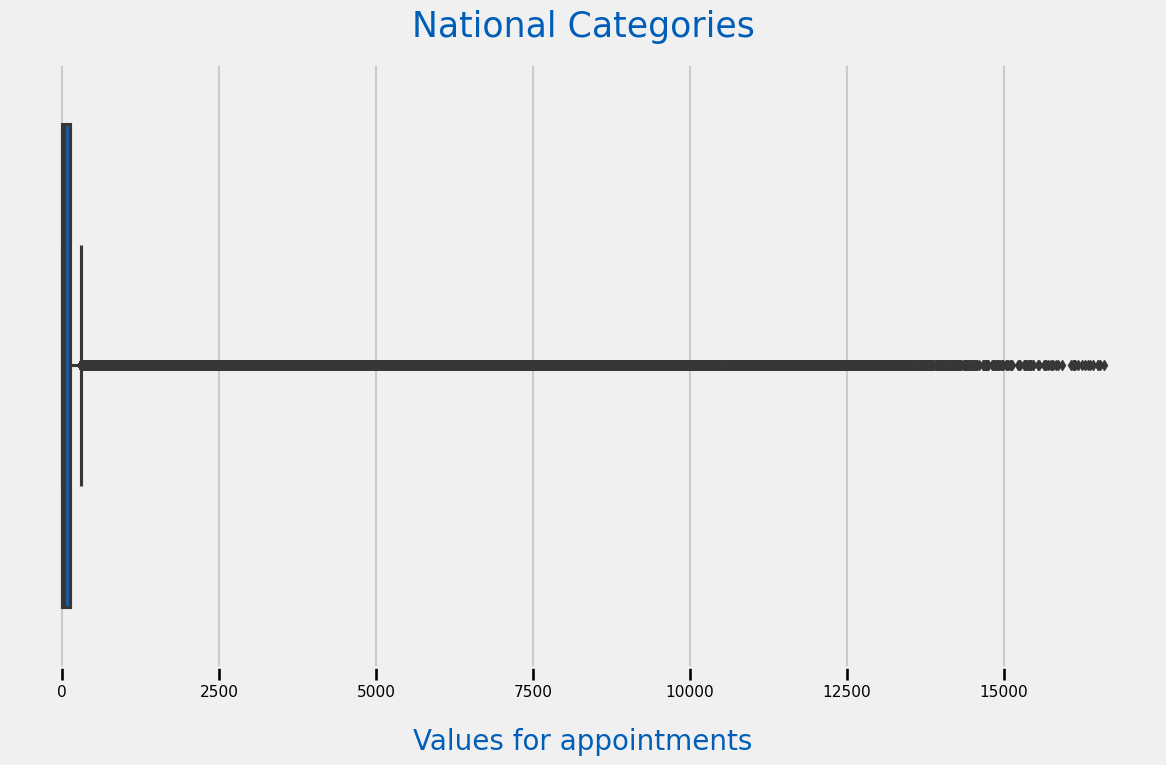

In [78]:
# Visualize in a graph.
plt.figure(figsize = (12,8))
sns.boxplot(x = 'count_of_appointments', data = nc, color='#005EB8')
plt.title('National Categories', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Values for appointments', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([])
plt.tight_layout()
plt.show()

In [79]:
outliers(nc['count_of_appointments'].max(), upper_limit_nc, nc['count_of_appointments'].min(), lower_limit_nc)

'There is at least one outlier to be removed.'

In [80]:
# Create a DataFrame with the outliers.
over_nc = nc[nc['count_of_appointments'] >= upper_limit_nc]

# Visualize.
over_nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
3        2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
6        2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
12       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
25       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
27       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

     service_setting            context_type             national_category  \
3   General Practice  Care Related Encounter    General Consultation Acute   
6           Unmapped                Unmapped                      Unmapped   
12  General Practice    Inconsistent Mapping          Inconsistent Mapping   
25  General Practice  Care Related Encounter               Planned Clinics   
27  General Practice  Care Related Encounter  General Consultation Routine   

    count_of_appointments appointment_month  
3                     725           2021-08  
6                     372           2021-08  
12                    619           2021-08  
25                   1993           2021-08  
27                   1933           2021-08

In [81]:
# Compare.
print("Number of records in National Categories -", nc.shape[0])
print("Number of values above the Upper Limit -", over_nc.shape[0])

Number of records in National Categories - 817394
Number of values above the Upper Limit - 147958


The same decision as in the previous DataFrame was taken.

![Image of Yaktocat](https://i.postimg.cc/fL4xF3hP/ERD.png)

*ERD of the initial DataFrames*


<div style="color:#005EB8; font-weight:bold;">
    
## Initial exploratory data analysis
    
</div>

**Locations**

<span style="color: #808080; font-style: italic;">Number of locations in the data set</span>

In [82]:
# Determine the unique values of the specific column.
loc = nc['sub_icb_location_name'].nunique()

# Visualize.
print('There are', loc, "locations in the data set.")

There are 106 locations in the data set.


<span style="color: #808080; font-style: italic;">Locations with the highest number of records</span>

In [83]:
# Count the locations.
loc_count = nc['sub_icb_location_name'].value_counts()

# Top 5 of locations with the highest number of records.
five_loc = loc_count.head(5)

# Check the results.
print("Top 5 locations with the highest number of records:")
for location, count in five_loc.items():
    print(f"{location}: {count}")

Top 5 locations with the highest number of records:
NHS North West London ICB - W2U3Z: 13007
NHS Kent and Medway ICB - 91Q: 12637
NHS Devon ICB - 15N: 12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V: 12171
NHS North East London ICB - A3A8R: 11837


<span style="color: #808080; font-style: italic;">Locations with the highest number of appointments</span>

In [84]:
# Group by the sub_icb_location_name.
loc_sum = nc.groupby('sub_icb_location_name')['count_of_appointments'].sum().sort_values(ascending = False).reset_index()

# Filter the top 10 locations.
loc_top_10 = loc_sum.head(10)

# Visualize.
loc_top_10

sub_icb_location_name  count_of_appointments
0            NHS North West London ICB - W2U3Z               12142390
1            NHS North East London ICB - A3A8R                9588891
2                NHS Kent and Medway ICB - 91Q                9286167
3  NHS Hampshire and Isle Of Wight ICB - D9Y0V                8288102
4              NHS South East London ICB - 72Q                7850170
5                          NHS Devon ICB - 15N                7447758
6              NHS South West London ICB - 36L                7155030
7                NHS Black Country ICB - D2P2L                7033637
8           NHS North Central London ICB - 93C                6747958
9        NHS Birmingham and Solihull ICB - 15E                6383746

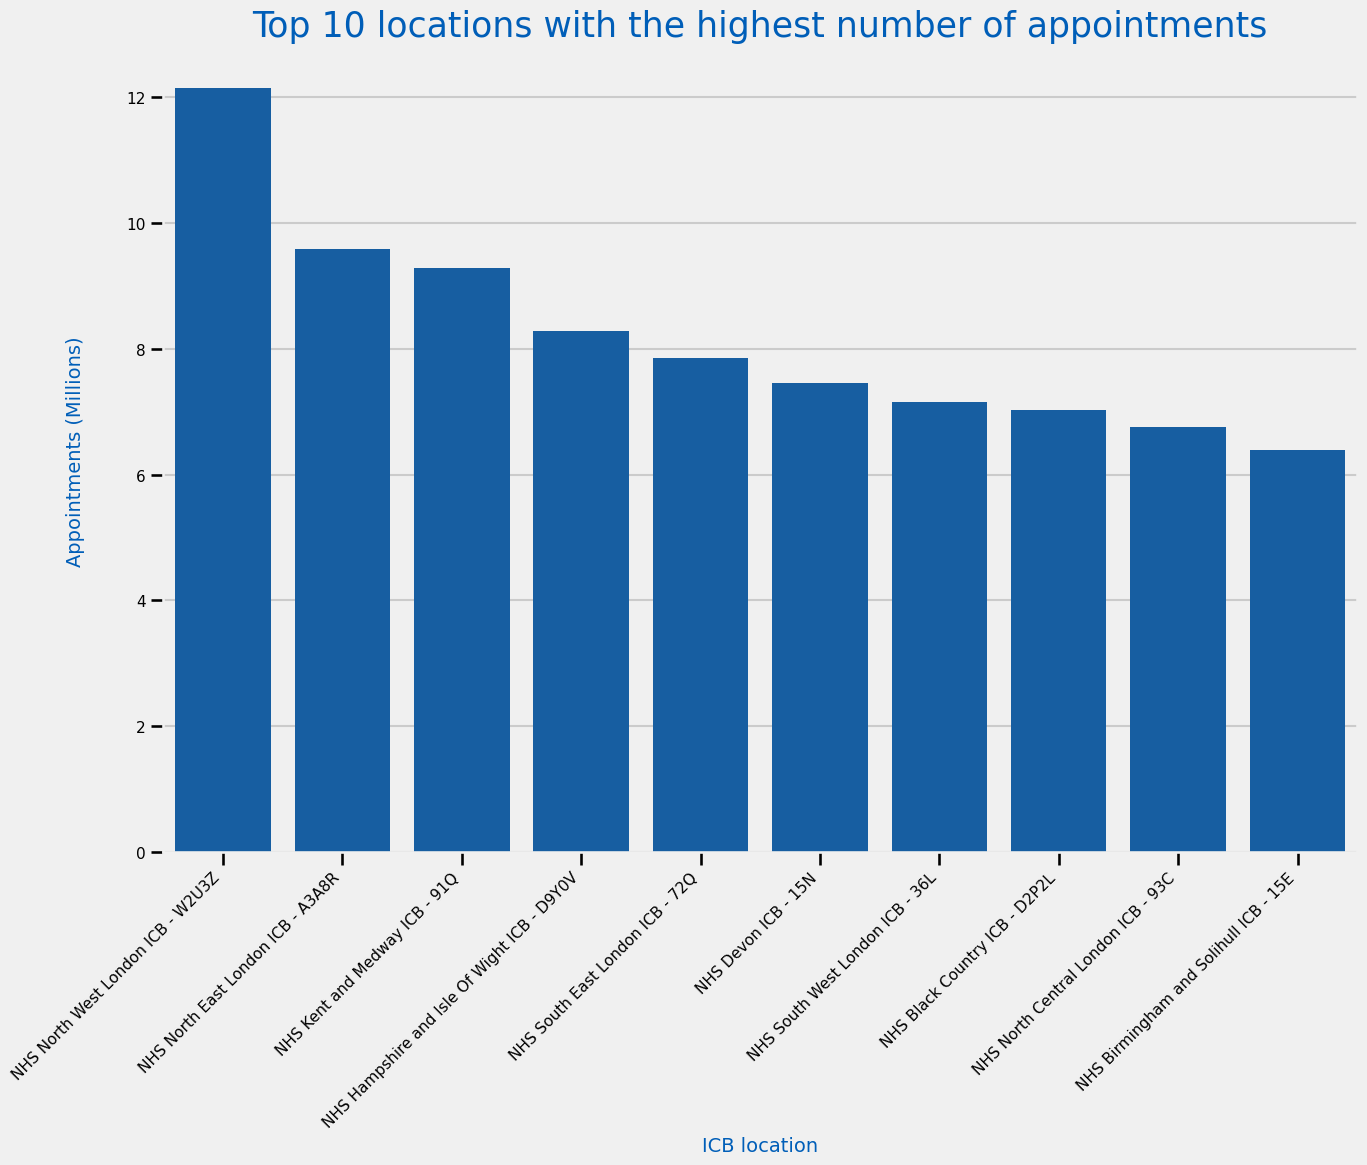

In [85]:
# Visualize in a graph.
plt.figure(figsize = (14,12))
sns.barplot(x = 'sub_icb_location_name', y = 'count_of_appointments', data = loc_top_10, color = '#005EB8')
plt.title('Top 10 locations with the highest number of appointments', color = '#005EB8', size = 25, pad = 10)
plt.xlabel('ICB location', size = 14, color='#005EB8', ha = 'center')
plt.ylabel('Appointments (Millions)', size = 14, color='#005EB8', ha='center', labelpad = 30)
plt.xticks(rotation = 45, ha='right', size = 11)
plt.yticks([0, 2e6, 4e6, 6e6, 8e6, 10e6, 12e6], ['0', '2', '4', '6', '8', '10', '12'], size = 11)
plt.tight_layout()
plt.show()

**Service settings**

In [86]:
# Determine the unique values of the specific column.
ss = nc['service_setting'].nunique()

# Visualize.
print('There are', ss, "service settings in the data set.")

There are 5 service settings in the data set.


In [87]:
# Determine the unique values of the 'service_setting' column.
unique_service_settings = nc['service_setting'].unique()

# Visualize the unique service settings.
print("Unique service settings:")
for service_setting in unique_service_settings:
    print(service_setting)

Unique service settings:
Primary Care Network
Other
General Practice
Unmapped
Extended Access Provision


<span style="color: #808080; font-style: italic;">Service settings by appointments</span>

In [88]:
# Sum up.
ss_sum = nc.groupby('service_setting')['count_of_appointments'].sum().sort_values(ascending = False).reset_index()

# Visualize.
ss_sum

service_setting  count_of_appointments
0           General Practice              270811691
1                   Unmapped               11080810
2       Primary Care Network                6557386
3                      Other                5420076
4  Extended Access Provision                2176807

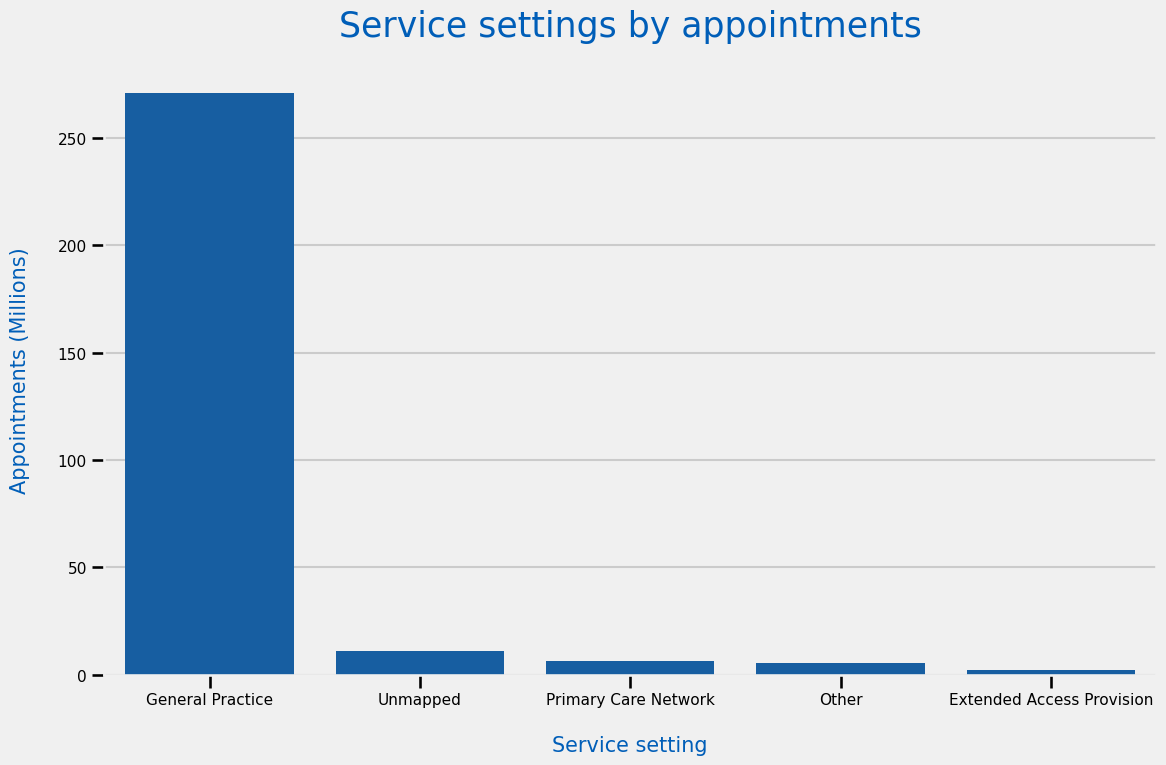

In [89]:
# Visualize in a graph.
barplot('service_setting', 'count_of_appointments', ss_sum, 
        title = 'Service settings by appointments',
        xlabel = 'Service setting', ylabel = 'Appointments (Millions)',
        yvalues = [0, 5e7, 10e7, 15e7, 20e7, 25e7],
        yticks = ['0', '50', '100', '150', '200', '250'])

<span style="color: #808080; font-style: italic;">Service setting spread per month</span>

In [90]:
# Group by the nc DataFrame.
nc_new = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Visualize.
nc_new.head(6)

appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843
5           2021-09  Extended Access Provision                 187906

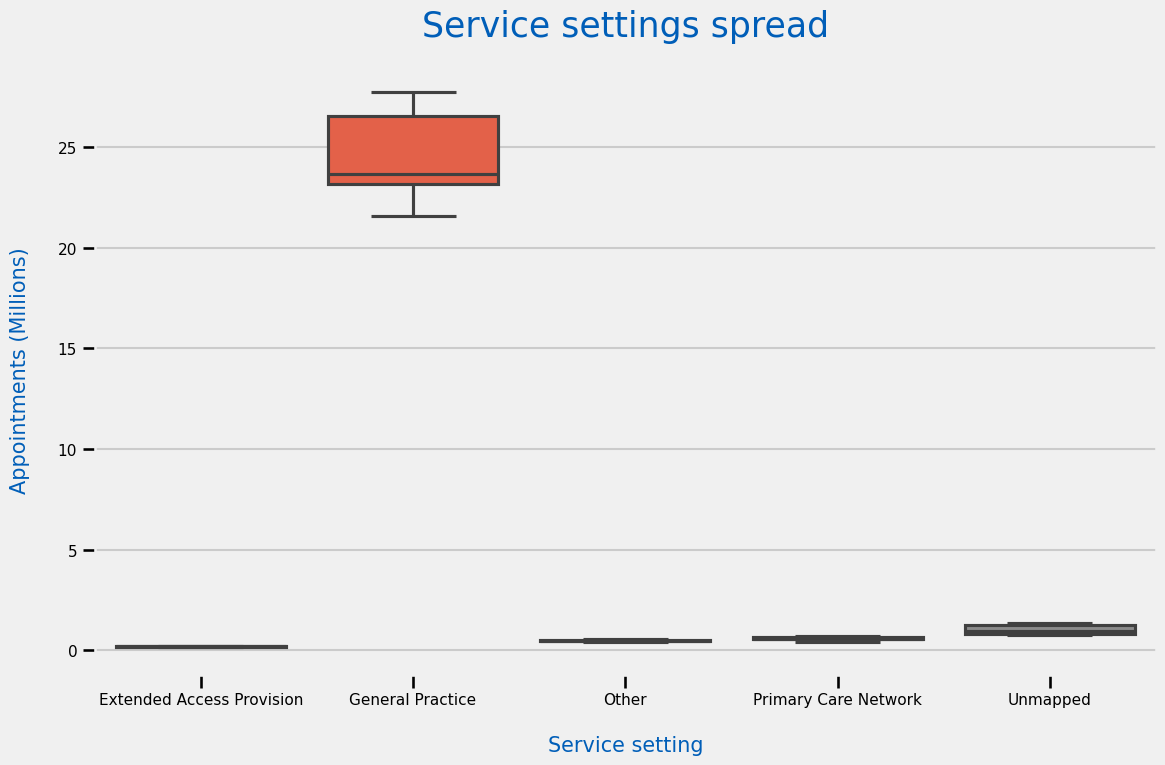

In [91]:
# Boxplot to investigate the spread of service settings.
plt.figure(figsize = (12,8))
sns.boxplot(x='service_setting', y='count_of_appointments', data = nc_new)
plt.title('Service settings spread', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Service setting', color='#005EB8', size = 15, ha= 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 0.5e7, 1e7, 1.5e7, 2e7, 2.5e7], ['0', '5', '10', '15', '20', '25'], size = 11)
plt.tight_layout()
plt.show()

In [92]:
# Exclude General Practice.
nc_no_gp = nc_new[nc_new['service_setting'] != 'General Practice']

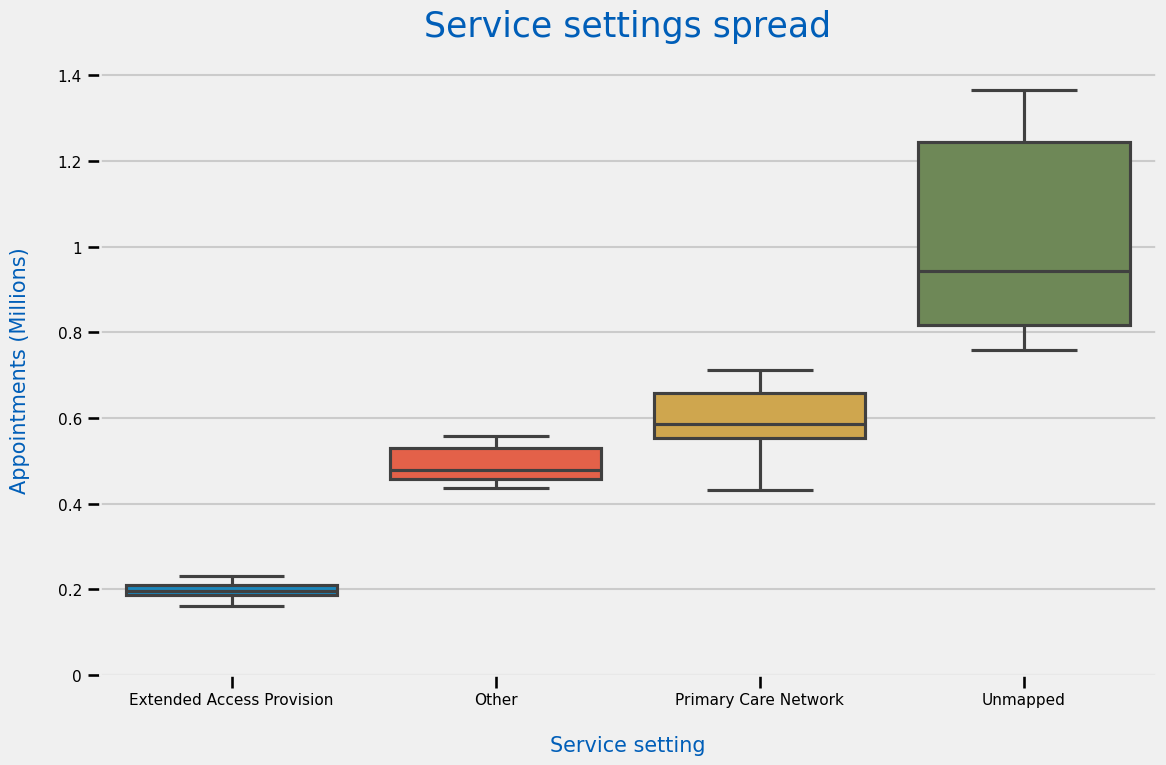

In [93]:
# Boxplot to investigate the spread of service settings.
plt.figure(figsize = (12,8))
sns.boxplot(x='service_setting', y='count_of_appointments', data = nc_no_gp)
plt.title('Service settings spread', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Service setting', color='#005EB8', size = 15, ha= 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6, 1.2e6, 1.4e6], ['0', '0.2', '0.4', '0.6', '0.8', '1', '1.2', '1.4'], size = 11)
plt.tight_layout()
plt.show()

**Context type**

In [94]:
# Determine the unique values of the specific column.
ct = nc['context_type'].nunique()

# Visualize.
print('There are', ct, "context types in the data set.")

There are 3 context types in the data set.


In [95]:
# Determine the unique values of the 'context_type' column.
unique_context_types = nc['context_type'].unique()

# Visualize the unique context types.
print("Unique context types:")
for context_type in unique_context_types:
    print(context_type)

Unique context types:
Care Related Encounter
Unmapped
Inconsistent Mapping


<span style="color: #808080; font-style: italic;">Context types by appointments</span>

In [96]:
# # Group by context_type.
ct_sum = nc.groupby('context_type')['count_of_appointments'].sum().sort_values(ascending = False).reset_index()

# Visualize.
ct_sum

context_type  count_of_appointments
0  Care Related Encounter              257075158
1    Inconsistent Mapping               27890802
2                Unmapped               11080810

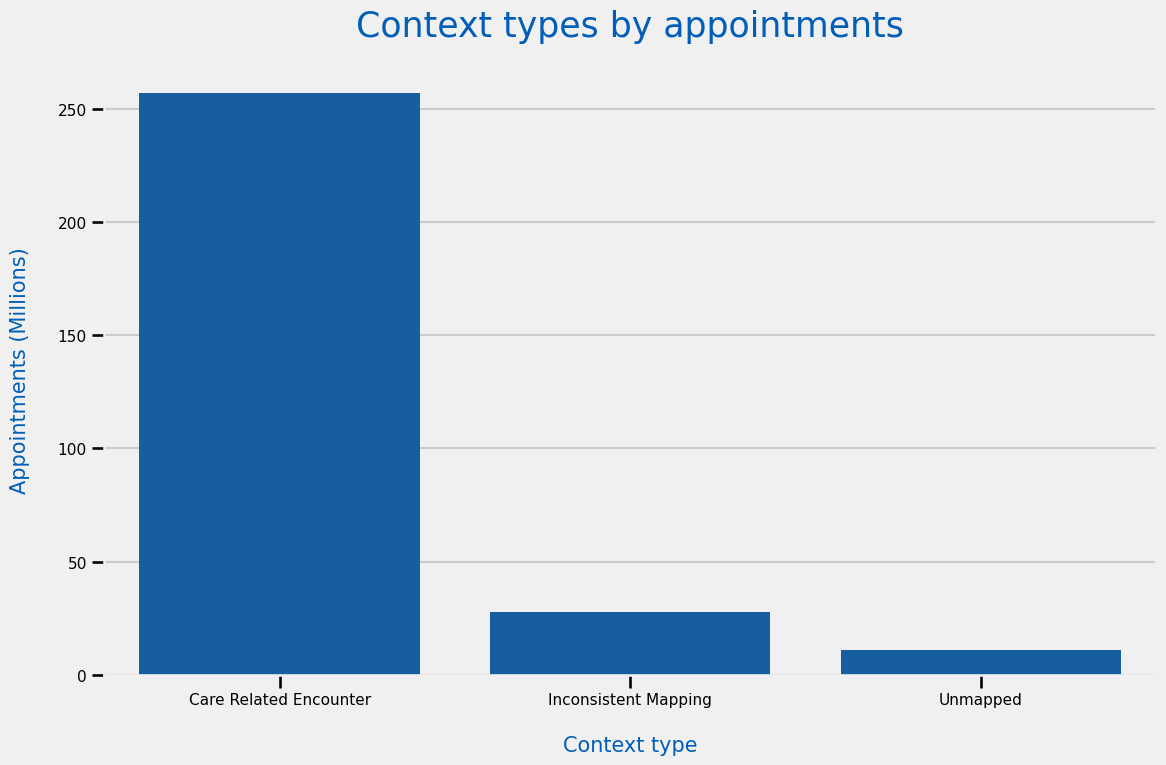

In [97]:
# Visualize in a graph.
barplot('context_type', 'count_of_appointments', ct_sum, 
        title = 'Context types by appointments',
        xlabel = 'Context type', ylabel = 'Appointments (Millions)',
        yvalues = [0, 5e7, 10e7, 15e7, 20e7, 25e7],
        yticks = ['0', '50', '100', '150', '200', '250'])

**National categories**

In [98]:
# Determine the unique values of the specific column.
nat_cat = nc['national_category'].nunique()

# Visualize.
print('There are', nat_cat, "national categories in the data set.")

There are 18 national categories in the data set.


In [99]:
# Determine the unique values of the 'national_category' column.
unique_national_categories = nc['national_category'].unique()

# Visualize the unique context types.
print("Unique national categories:")
for national_category in unique_national_categories:
    print(national_category)

Unique national categories:
Patient contact during Care Home Round
Planned Clinics
Home Visit
General Consultation Acute
Structured Medication Review
Care Home Visit
Unmapped
Clinical Triage
Planned Clinical Procedure
Inconsistent Mapping
Care Home Needs Assessment & Personalised Care and Support Planning
General Consultation Routine
Service provided by organisation external to the practice
Unplanned Clinical Activity
Social Prescribing Service
Non-contractual chargeable work
Group Consultation and Group Education
Walk-in


<span style="color: #808080; font-style: italic;">Top 5 national categories by appointments</span>

In [100]:
# Group by national_category.
nc_sum = nc.groupby('national_category')['count_of_appointments'].sum().sort_values(ascending = False).reset_index()

# Filter the top 10 locations.
nc_top_5 = nc_sum.head(5)

# Visualize.
nc_top_5

national_category  count_of_appointments
0  General Consultation Routine               97271522
1    General Consultation Acute               53691150
2               Clinical Triage               41546964
3               Planned Clinics               28019748
4          Inconsistent Mapping               27890802

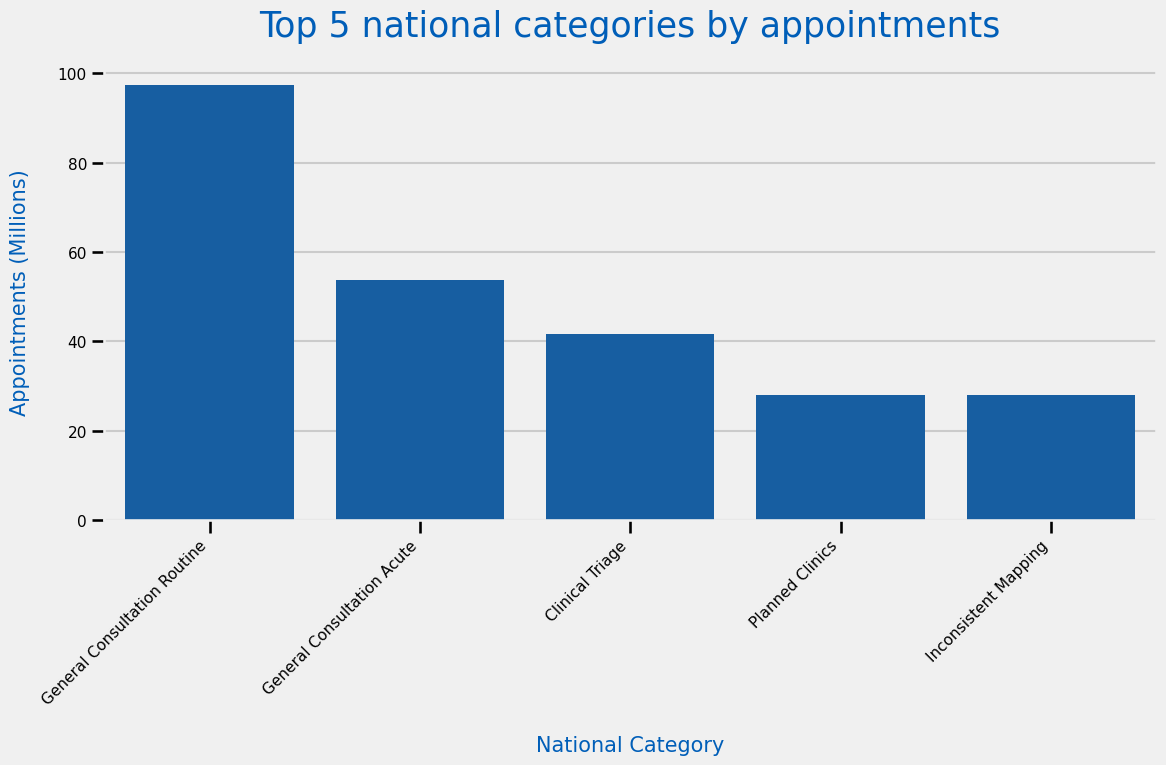

In [101]:
# Visualize in a graph.
barplot('national_category', 'count_of_appointments', nc_top_5, 
        title = 'Top 5 national categories by appointments',
        xlabel = 'National Category', ylabel = 'Appointments (Millions)',
        yvalues = [0, 2e7, 4e7, 6e7, 8e7, 10e7],
        yticks = ['0', '20', '40', '60', '80', '100'],
        rotation = 45, ha = 'right')

**Appointment status**

In [102]:
# Determine the unique values of the specific column.
app_sta = ar['appointment_status'].nunique()

# Visualize.
print('There are', app_sta, "appointment status in the data set.")

There are 3 appointment status in the data set.


In [103]:
# Determine the unique values of the 'appointment_status' column.
unique_appointment_status = ar['appointment_status'].unique()

# Visualize the unique context types.
print("Unique appointment status:")
for appointment_status in unique_appointment_status:
    print(appointment_status)

Unique appointment status:
Attended
DNA
Unknown


<span style="color: #808080; font-style: italic;">Appointment status by appointments</span>

In [104]:
# # Group by appointmet_status.
as_sum = ar.groupby('appointment_status')['count_of_appointments'].sum().sort_values(ascending = False).reset_index()

# Visualize.
as_sum

appointment_status  count_of_appointments
0           Attended              677755876
1            Unknown               34137416
2                DNA               30911233

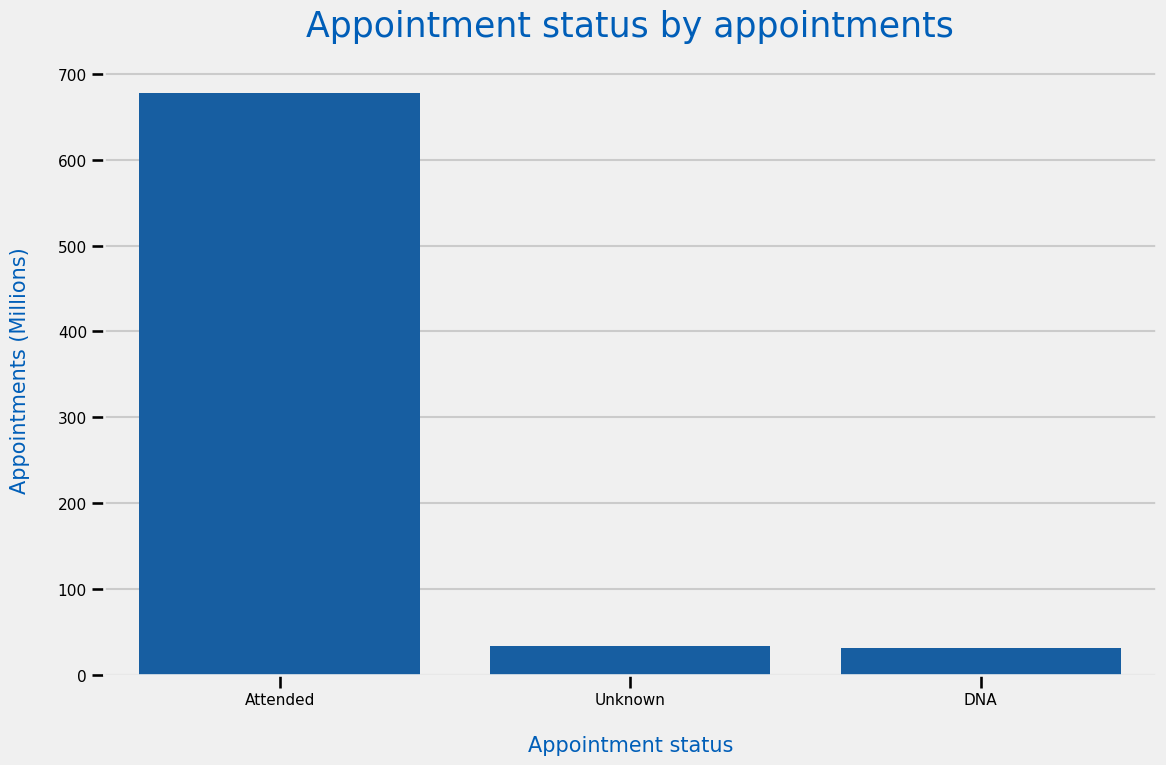

In [105]:
# Visualize in a graph.
barplot('appointment_status', 'count_of_appointments', as_sum, 
        title = 'Appointment status by appointments',
        xlabel = 'Appointment status', ylabel = 'Appointments (Millions)',
        yvalues = [0, 1e8, 2e8, 3e8, 4e8, 5e8, 6e8, 7e8],
        yticks = ['0', '100', '200', '300', '400', '500', '600', '700'])

**Healthcare professional types**

In [106]:
# Determine the unique values of the specific column.
hcp_unique = ar['hcp_type'].nunique()

# Visualize.
print('There are', hcp_unique, "healthcare professional types in the data set.")

There are 3 healthcare professional types in the data set.


In [107]:
# Determine the unique values of the 'hcp_type' column.
unique_hcp_type = ar['hcp_type'].unique()

# Visualize the unique context types.
print("Unique healthcare professional types:")
for healthcare_professional_types in unique_hcp_type:
    print(healthcare_professional_types)

Unique healthcare professional types:
GP
Other Practice staff
Unknown


<span style="color: #808080; font-style: italic;">Healthcare professional types by appointments</span>

In [108]:
# Group by hcp_type.
hcp_sum = ar.groupby('hcp_type')['count_of_appointments'].sum().sort_values(ascending = False).reset_index()

# Visualize.
hcp_sum

hcp_type  count_of_appointments
0                    GP              379650140
1  Other Practice staff              339650535
2               Unknown               23503850

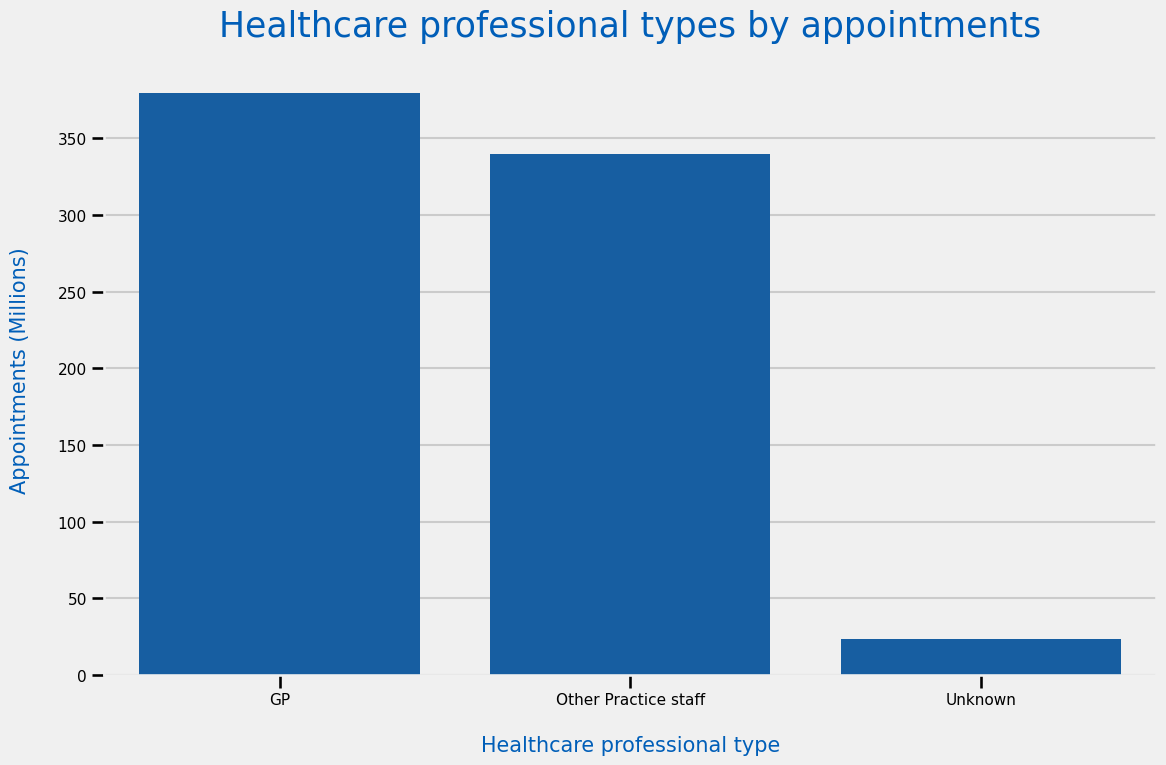

In [109]:
# Visualize in a graph.
barplot('hcp_type', 'count_of_appointments', hcp_sum, 
        title = 'Healthcare professional types by appointments',
        xlabel = 'Healthcare professional type', ylabel = 'Appointments (Millions)',
        yvalues = [0, 0.5e8, 1e8, 1.5e8, 2e8, 2.5e8, 3e8, 3.5e8],
        yticks = ['0', '50', '100', '150', '200', '250', '300', '350'])

**Appointment mode**

In [110]:
# Determine the unique values of the specific column.
mode_unique = ar['hcp_type'].nunique()

# Visualize.
print('There are', mode_unique, "appointment mode types in the data set.")

There are 3 appointment mode types in the data set.


In [111]:
# Determine the unique values of the 'appointment_mode' column.
appointment_mode_unique = ar['appointment_mode'].unique()

# Visualize the unique context types.
print("Appointment modes:")
for appointment_mode in appointment_mode_unique:
    print(appointment_mode)

Appointment modes:
Face-to-Face
Home Visit
Telephone
Unknown
Video/Online


<span style="color: #808080; font-style: italic;">Appointment mode by appointments</span>

In [112]:
# Group by appointment_mode.
am_sum = ar.groupby('appointment_mode')['count_of_appointments'].sum().sort_values(ascending = False).reset_index()

# Visualize.
am_sum

appointment_mode  count_of_appointments
0     Face-to-Face              439981729
1        Telephone              267862657
2          Unknown               26451305
3       Home Visit                4887876
4     Video/Online                3620958

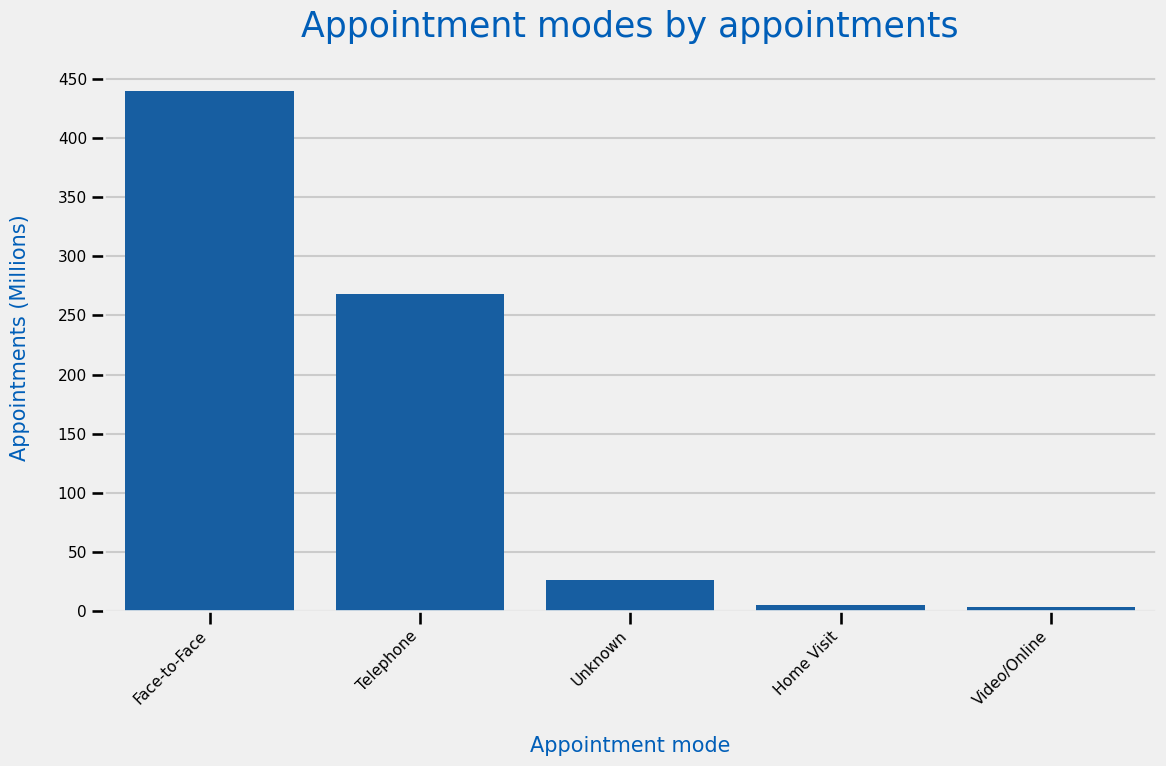

In [113]:
# Visualize in a graph.
barplot('appointment_mode', 'count_of_appointments', am_sum, 
        title = 'Appointment modes by appointments',
        xlabel = 'Appointment mode', ylabel = 'Appointments (Millions)',
        yvalues = [0, 0.5e8, 1e8, 1.5e8, 2e8, 2.5e8, 3e8, 3.5e8, 4e8, 4.5e8],
        yticks = ['0', '50', '100', '150', '200', '250', '300', '350', '400', '450'],
        rotation = 45, ha = 'right')

**Time between booking and appointment**

In [114]:
# Determine the unique values of the specific column.
time_unique = ar['time_between_book_and_appointment'].nunique()

# Visualize.
print('There are', time_unique, "options of time between booking and the appointment in the data set.")

There are 8 options of time between booking and the appointment in the data set.


In [115]:
# Determine the unique values of the 'appointment_mode' column.
time_between_unique = ar['time_between_book_and_appointment'].unique()

# Visualize the unique context types.
print("Times between booking and the appointment:")
for i in time_between_unique:
    print(i)

Times between booking and the appointment:
1 Day
15 to 21 Days
2 to 7 Days
22 to 28 Days
8 to 14 Days
More than 28 Days
Same Day
Unknown / Data Quality


<span style="color: #808080; font-style: italic;">Time between booking and the appointment by appointments</span>

In [116]:
# Group by time_between_book_and_appointment.
time_sum = ar.groupby('time_between_book_and_appointment')['count_of_appointments'].sum().sort_values(ascending = False).reset_index()

# Visualize.
time_sum

time_between_book_and_appointment  count_of_appointments
0                          Same Day              342747171
1                       2 to 7 Days              153794531
2                      8 to 14 Days               86846519
3                             1 Day               67716097
4                     15 to 21 Days               42710574
5                     22 to 28 Days               25536541
6                 More than 28 Days               23050987
7            Unknown / Data Quality                 402105

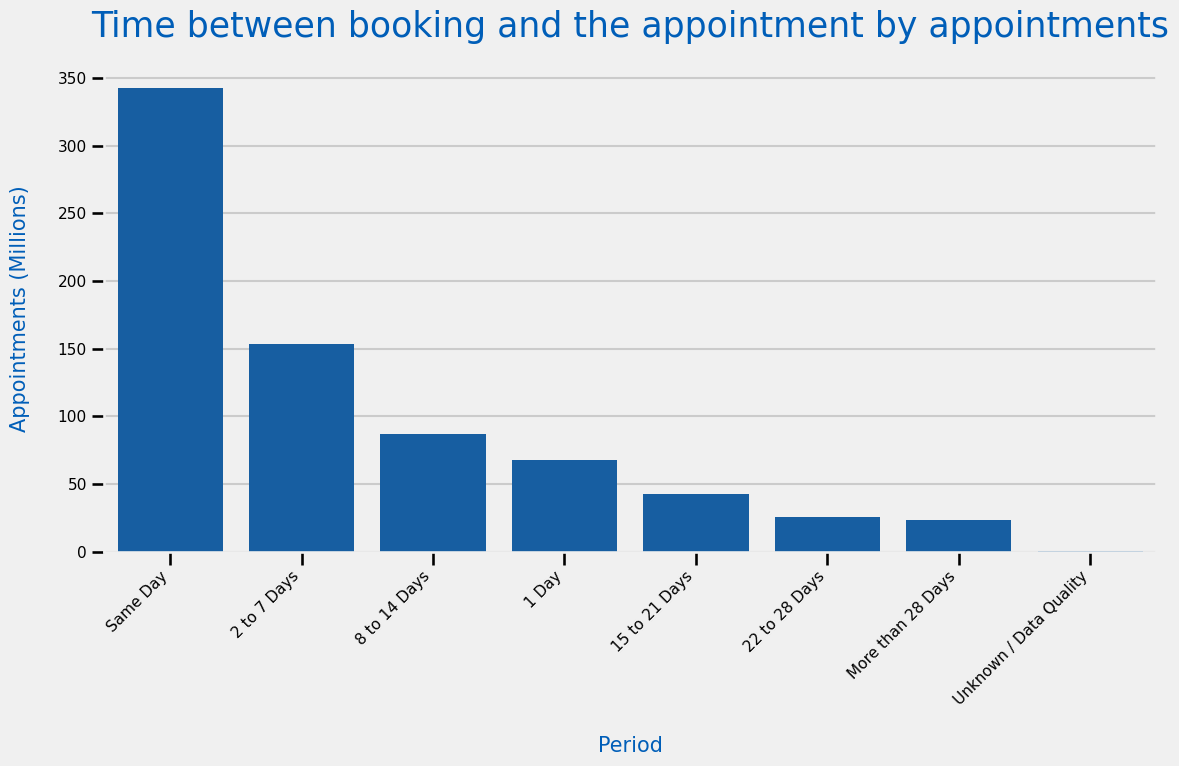

In [117]:
# Visualize in a graph.
barplot('time_between_book_and_appointment', 'count_of_appointments', time_sum, 
        title = 'Time between booking and the appointment by appointments',
        xlabel = 'Period', ylabel = 'Appointments (Millions)',
        yvalues = [0, 0.5e8, 1e8, 1.5e8, 2e8, 2.5e8, 3e8, 3.5e8],
        yticks = ['0', '50', '100', '150', '200', '250', '300', '350'],
        rotation = 45, ha = 'right')

**Actual duration of the appointments**

In [118]:
# Determine the unique values of the specific column.
ad_unique = ad['actual_duration'].nunique()

# Visualize.
print('There are', ad_unique, "time slots of duration of the appointments in the data set.")

There are 7 time slots of duration of the appointments in the data set.


In [119]:
# Determine the unique values of the 'appointment_mode' column.
actual_duration_unique = ad['actual_duration'].unique()

# Visualize the unique context types.
print("Times slots of duration of the appointments:")
for x in actual_duration_unique:
    print(x)

Times slots of duration of the appointments:
31-60 Minutes
21-30 Minutes
6-10 Minutes
Unknown / Data Quality
16-20 Minutes
11-15 Minutes
1-5 Minutes


<span style="color: #808080; font-style: italic;">Time slots of the duration of the appointments</span>

In [120]:
# Group by actual_duration.
ad_sum = ad.groupby('actual_duration')['count_of_appointments'].sum().sort_values(ascending = False).reset_index()

# Visualize.
ad_sum

actual_duration  count_of_appointments
0  Unknown / Data Quality               40284086
1            6-10 Minutes               33800815
2             1-5 Minutes               28600865
3           11-15 Minutes               25160882
4           16-20 Minutes               16004247
5           21-30 Minutes               15026365
6           31-60 Minutes                9103432

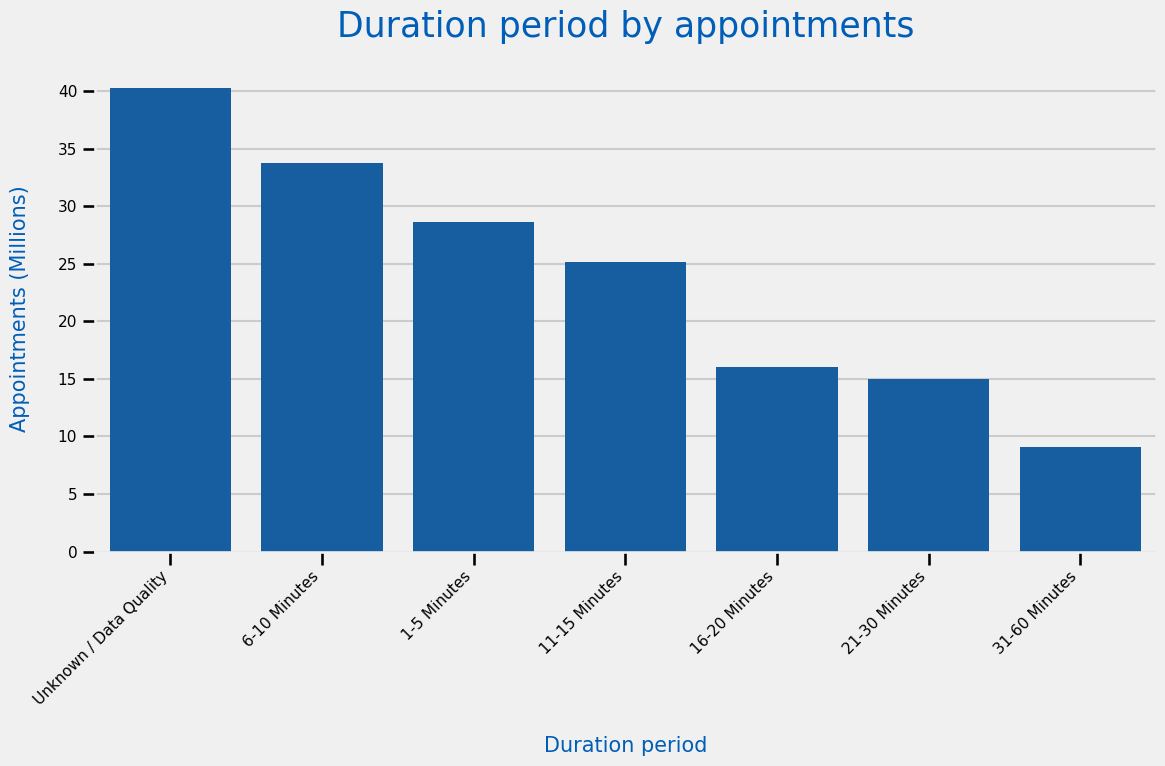

In [121]:
# Visualize in a graph.
barplot('actual_duration', 'count_of_appointments', ad_sum, 
        title = 'Duration period by appointments',
        xlabel = 'Duration period', ylabel = 'Appointments (Millions)',
        yvalues = [0, 0.5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7, 3.5e7, 4e7],
        yticks = ['0', '5', '10', '15', '20', '25', '30', '35', '40'],
        rotation = 45, ha = 'right')

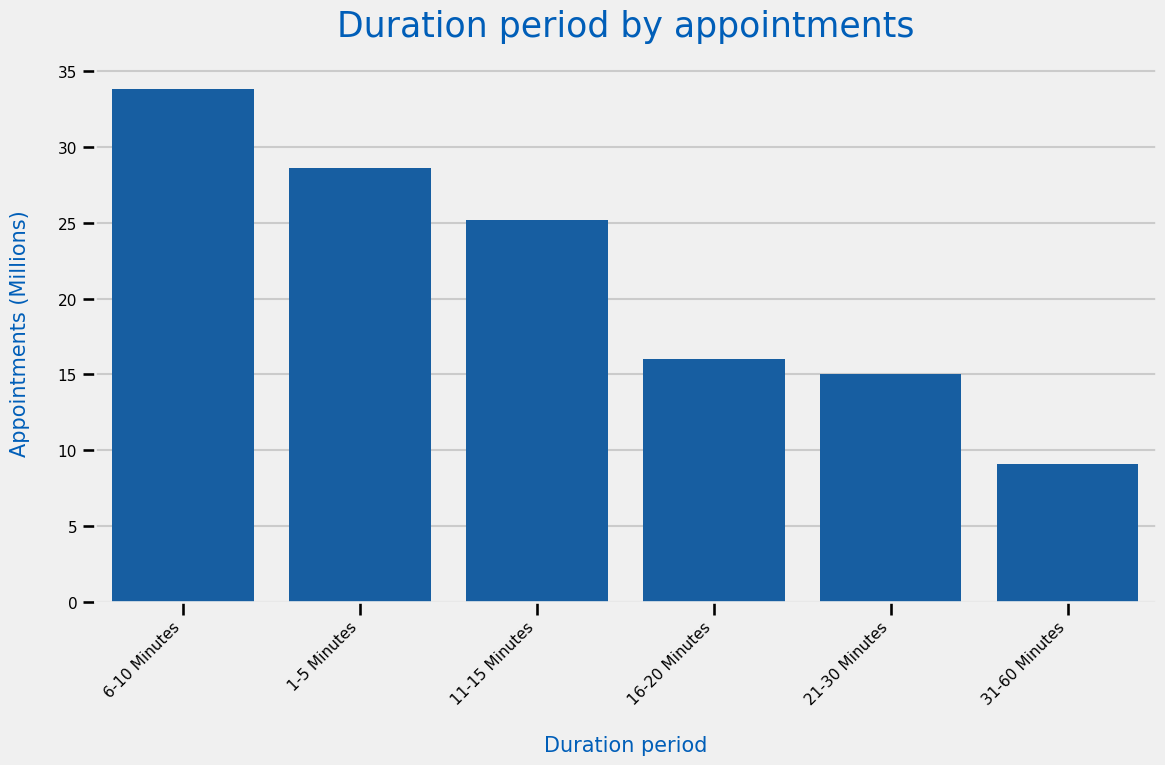

In [122]:
# Filter all without Unknown.
ad_no_unknown = ad_sum[ad_sum['actual_duration'] != 'Unknown / Data Quality']

# Visualize in a graph.
barplot('actual_duration', 'count_of_appointments', ad_no_unknown, 
        title = 'Duration period by appointments',
        xlabel = 'Duration period', ylabel = 'Appointments (Millions)',
        yvalues = [0, 0.5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7, 3.5e7],
        yticks = ['0', '5', '10', '15', '20', '25', '30', '35'],
        rotation = 45, ha = 'right')

<div style="color:#005EB8; font-weight:bold;">
    
## Time evolution exploration
    
</div>

**Date ranges of the DateFrames**

<span style="color: #808080; font-style: italic;">Actual Duration</span>

In [123]:
# Define the variables.
max_ad = ad['appointment_date'].max().strftime("%Y-%m-%d")
min_ad = ad['appointment_date'].min().strftime("%Y-%m-%d")
time_difference_ad = (ad['appointment_date'].max() - ad['appointment_date'].min()).days

print("Minimum date in Actual Duration -", min_ad)
print("Maximum date in Actual Duration -", max_ad)
print("Difference between the dates -", time_difference_ad, "days")

Minimum date in Actual Duration - 2021-12-01
Maximum date in Actual Duration - 2022-06-30
Difference between the dates - 211 days


<span style="color: #808080; font-style: italic;">National Categories</span>

In [124]:
# Define the variables.
max_nc = nc['appointment_date'].max().strftime("%Y-%m-%d")
min_nc = nc['appointment_date'].min().strftime("%Y-%m-%d")
time_difference_nc = (nc['appointment_date'].max() - nc['appointment_date'].min()).days

print("Minimum date in National Categories -", min_nc)
print("Maximum date in National Categories -", max_nc)
print("Difference between the dates -", time_difference_nc, "days")

Minimum date in National Categories - 2021-08-01
Maximum date in National Categories - 2022-06-30
Difference between the dates - 333 days


<span style="color: #808080; font-style: italic;">Appointments Regional</span>

In [125]:
# Define the variables.
max_ar = ar['appointment_month'].max().strftime("%Y-%m-%d")
min_ar = ar['appointment_month'].min().strftime("%Y-%m-%d")
time_difference_ar = (ar['appointment_month'].max() - ar['appointment_month'].min()).days

print("Minimum date in Appointments Regional -", min_ar)
print("Maximum date in Appointments Regional -", max_ar)
print("Difference between the dates -", time_difference_ar, "days")

Minimum date in Appointments Regional - 2020-01-01
Maximum date in Appointments Regional - 2022-06-01
Difference between the dates - 882 days


<span style="color: #808080; font-style: italic;">NHS Staff</span>

In [126]:
# Define the variables.
max_ns = ns['month'].max().strftime("%Y-%m-%d")
min_ns = ns['month'].min().strftime("%Y-%m-%d")
time_difference_ns = (ns['month'].max() - ns['month'].min()).days

print("Minimum date in NHS Staff -", min_ns)
print("Maximum date in NHS Staff -", max_ns)
print("Difference between the dates -", time_difference_ns, "days")

Minimum date in NHS Staff - 2021-12-01
Maximum date in NHS Staff - 2022-06-01
Difference between the dates - 182 days


**Example of checking the data using time - Service setting more popular for NHS North West London from 1 January to 1 June 2022**

In [127]:
# Filter the DataFrame with the dates.
nc_subset = nc[(nc['appointment_date'] >= '2022-01-01') & (nc['appointment_date'] <= '2022-06-01') &
                (nc['sub_icb_location_name'].str.contains('NHS North West London'))]

# Check the new DataFrame.
nc_subset

appointment_date icb_ons_code              sub_icb_location_name  \
800289       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
800290       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
800291       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
800292       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
800293       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
...                 ...          ...                                ...   
806220       2022-06-01    E54000027  NHS North West London ICB - W2U3Z   
806221       2022-06-01    E54000027  NHS North West London ICB - W2U3Z   
806222       2022-06-01    E54000027  NHS North West London ICB - W2U3Z   
806223       2022-06-01    E54000027  NHS North West London ICB - W2U3Z   
806224       2022-06-01    E54000027  NHS North West London ICB - W2U3Z   

                  service_setting            context_type  \
800289                   Unmapped                Unmapped   
800290       Primary Care Network  Care Related Encounter   
800291                      Other    Inconsistent Mapping   
800292           General Practice    Inconsistent Mapping   
800293       Primary Care Network  Care Related Encounter   
...                           ...                     ...   
806220  Extended Access Provision  Care Related Encounter   
806221  Extended Access Provision  Care Related Encounter   
806222           General Practice  Care Related Encounter   
806223  Extended Access Provision  Care Related Encounter   
806224  Extended Access Provision  Care Related Encounter   

                   national_category  count_of_appointments appointment_month  
800289                      Unmapped                    496           2022-01  
800290               Clinical Triage                     19           2022-01  
800291          Inconsistent Mapping                      1           2022-01  
800292          Inconsistent Mapping                     16           2022-01  
800293               Planned Clinics                     29           2022-01  
...                              ...                    ...               ...  
806220                    Home Visit                      4           2022-06  
806221  General Consultation Routine                     27           2022-06  
806222   Unplanned Clinical Activity                    626           2022-06  
806223    General Consultation Acute                    224           2022-06  
806224               Clinical Triage                     96           2022-06  

[5936 rows x 8 columns]

In [128]:
# Check the records for service_setting.
ss_count = nc_subset['service_setting'].value_counts()

# Select the top 1 result.
number_one_ss = ss_count.head(1)

# Calculate the percentage of number one.
percentage_number_one = (number_one_ss / ss_count.sum()) * 100

# Visualize the results.
print("Most popular service setting between 1 January and 1 June 2022 for NHS North West London:")
print(f"{number_one_ss.index[0]} - {percentage_number_one.values[0]:.2f}%", "of the results")

Most popular service setting between 1 January and 1 June 2022 for NHS North West London:
General Practice - 35.44% of the results


**Total records and appointments**

<span style="color: #808080; font-style: italic;">Month with more records</span>

In [129]:
# Group by the data.
group_count = nc.groupby(nc['appointment_month'])['count_of_appointments'].count().sort_values(ascending=False)

# Select top 1.
top_count = group_count.head(1)

# Visualize.
print("Month with highest number of records -", top_count.index[0])

Month with highest number of records - 2022-03


<span style="color: #808080; font-style: italic;">Month with more appointments</span>

In [130]:
# Group by the data.
group_month = nc.groupby(nc['appointment_month'])['count_of_appointments'].sum().sort_values(ascending=False)

# Select top 1.
top_month = group_month.head(1)

# Visualize.
print("Month with highest number of appointments -", top_month.index[0])

Month with highest number of appointments - 2021-11


<span style="color: #808080; font-style: italic;">Total records per month</span>

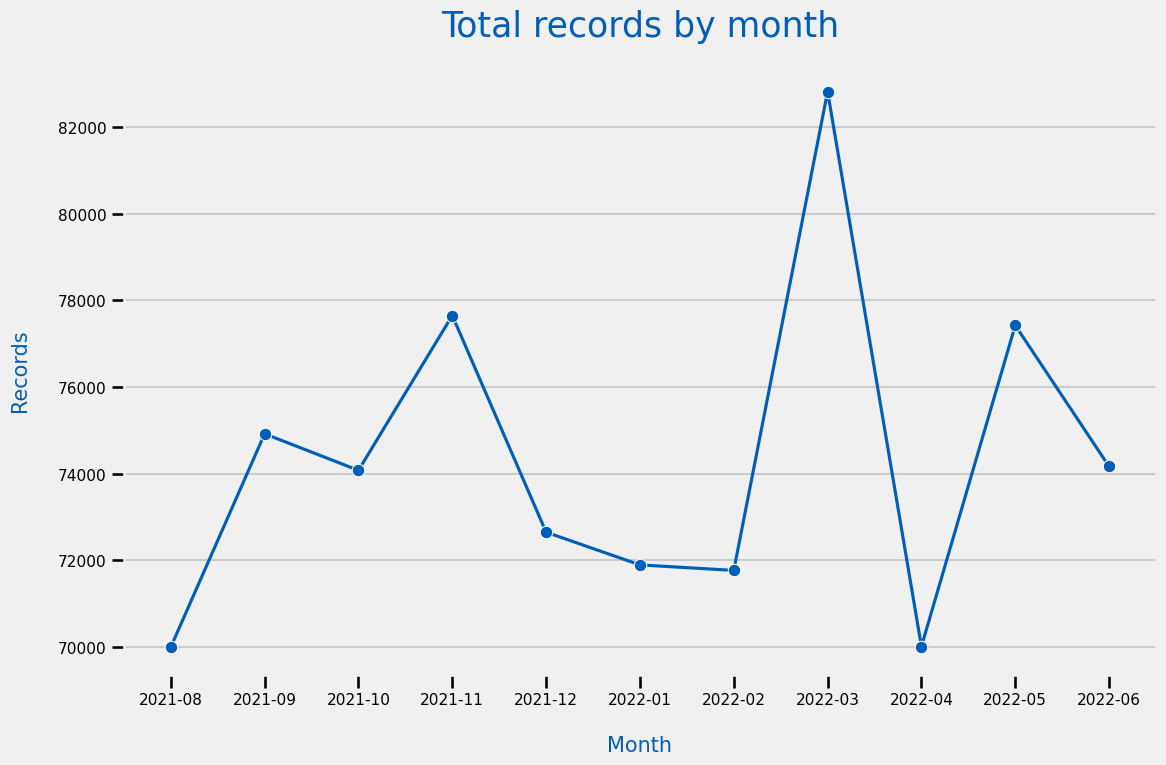

In [131]:
# Transform in a DataFrame.
group_count_df = pd.Series(group_count).reset_index().sort_values('appointment_month')

# Visualize in a graph.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = group_count_df, color = '#005EB8', marker='o')
plt.title('Total records by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Records', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

<span style="color: #808080; font-style: italic;">Total appointments per month</span>

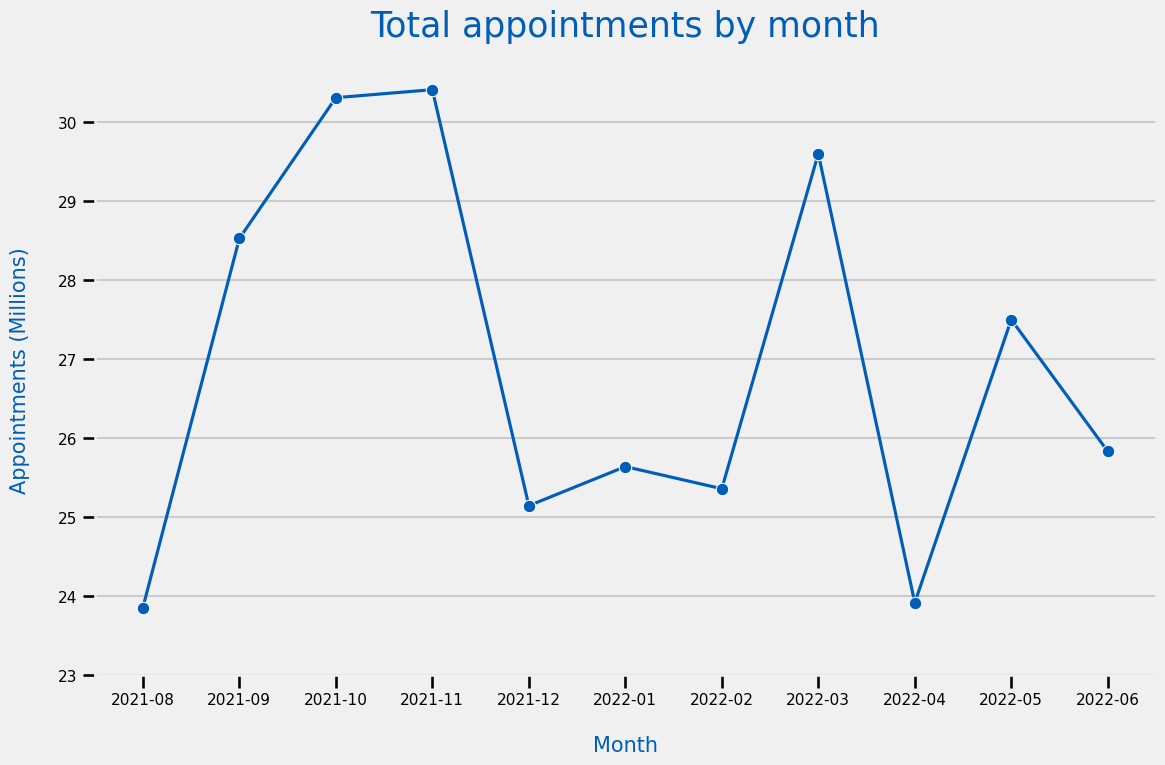

In [132]:
# Transform in a DataFrame.
group_month_df = pd.Series(group_month).reset_index().sort_values('appointment_month')

# Visualize in a graph.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = group_month_df, color = '#005EB8', marker = 'o')
plt.title('Total appointments by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([2.3e7, 2.4e7, 2.5e7, 2.6e7, 2.7e7, 2.8e7, 2.9e7, 3.0e7], ['23', '24', '25', '26', '27', '28', '29', '30'], size = 11)
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

<span style="color: #808080; font-style: italic;">Total appointments per day of week</span>

In [133]:
# Create the column with the day of the week.
nc['day_of_week'] = nc['appointment_date'].dt.day_name()

# Visualize.
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month day_of_week  
0           2021-08      Monday  
1           2021-08      Monday  
2           2021-08      Monday  
3           2021-08      Monday  
4           2021-08      Monday

In [134]:
# Define the order of days of the week.
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'day_of_week' column.
nc['day_of_week'] = pd.Categorical(nc['day_of_week'], categories=order, ordered=True)

# Group by the DataFrame.
nc_day_week = nc.groupby('day_of_week')['count_of_appointments'].sum().reset_index()

# Visualize.
nc_day_week

day_of_week  count_of_appointments
0      Monday               59695267
1     Tuesday               61806933
2   Wednesday               58984265
3    Thursday               56976354
4      Friday               52394868
5    Saturday                5574922
6      Sunday                 614161

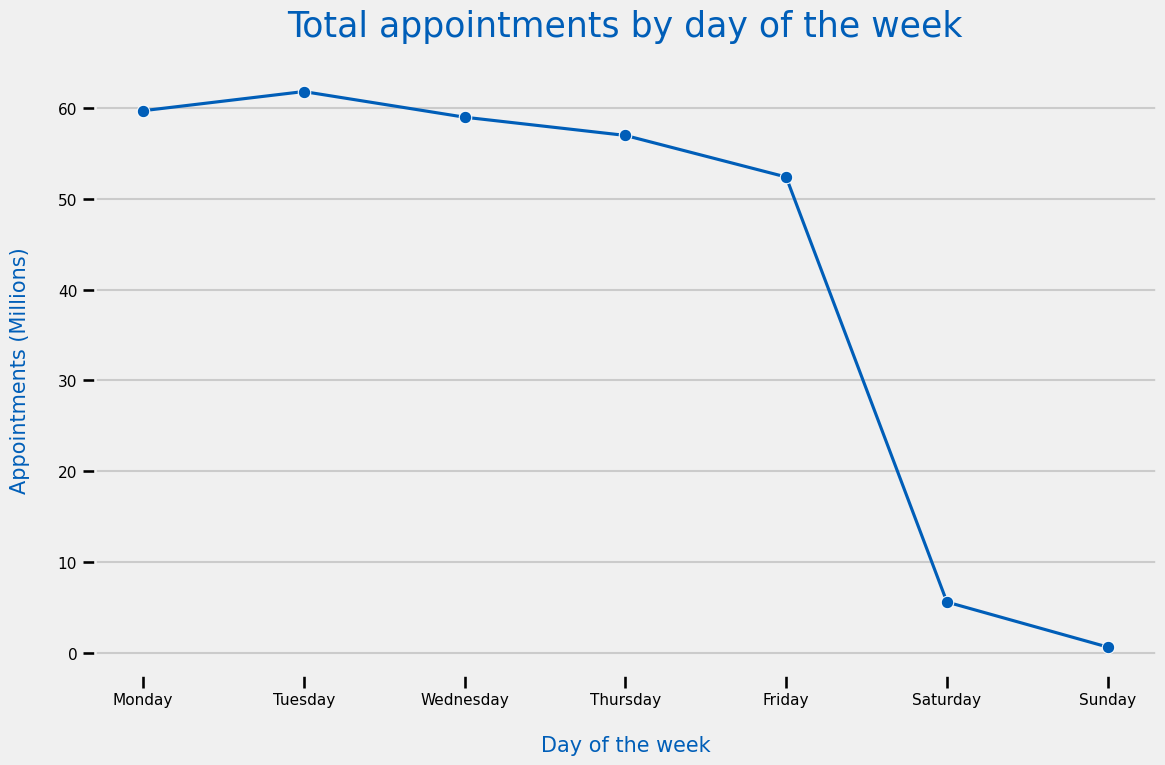

In [135]:
# Visualize in a graph.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'day_of_week', y = 'count_of_appointments', data = nc_day_week, color = '#005EB8', marker = 'o')
plt.title('Total appointments by day of the week', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Day of the week', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 1e7, 2e7, 3e7, 4e7, 5e7, 6e7], ['0', '10', '20', '30', '40', '50', '60'],size = 11)
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

<span style="color: #808080; font-style: italic;">Average appointments per day of week</span>

In [136]:
# Subset the DataFrame to have a unique row for each date.
nc_su = nc[['appointment_date', 'day_of_week']]

# Obtain unique records.
nc_su_unique = nc_su.drop_duplicates()

# Count the days of the week.
day_week_counts = nc_su_unique['day_of_week'].value_counts()

# Visualize.
day_week_counts

day_of_week
Monday       48
Tuesday      48
Wednesday    48
Thursday     48
Sunday       48
Friday       47
Saturday     47
Name: count, dtype: int64

In [137]:
# Create a DataFrame.
day_week_counts_df = pd.Series(day_week_counts).reset_index()

# Merge DataFrames.
days = pd.merge(nc_day_week, day_week_counts_df, on = 'day_of_week', how = 'inner')

# Visualize.
days

day_of_week  count_of_appointments  count
0      Monday               59695267     48
1     Tuesday               61806933     48
2   Wednesday               58984265     48
3    Thursday               56976354     48
4      Friday               52394868     47
5    Saturday                5574922     47
6      Sunday                 614161     48

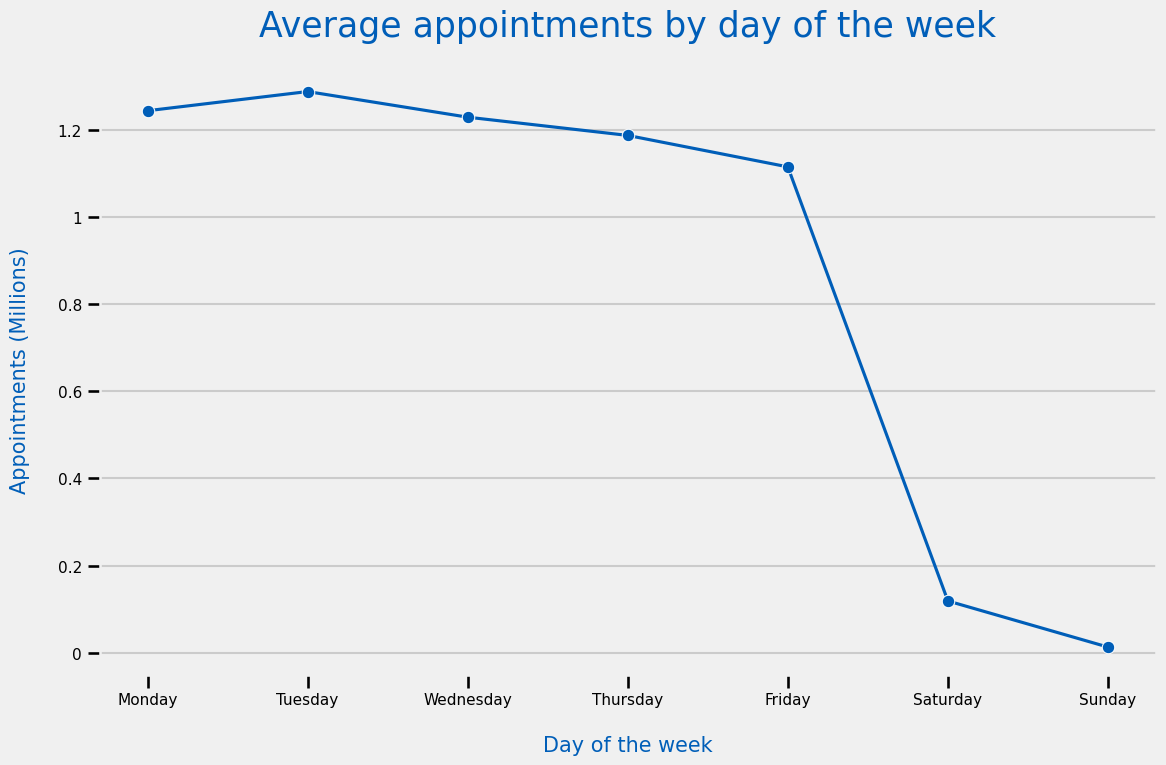

In [138]:
# Create average.
days['average_appointments'] = days['count_of_appointments'] / days['count']

# Visualize in a graph.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'day_of_week', y = 'average_appointments', data = days, color = '#005EB8', marker = 'o')
plt.title('Average appointments by day of the week', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Day of the week', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['0', '0.2', '0.4', '0.6', '0.8', '1', '1.2'], size = 11)
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

**Service setting by month**

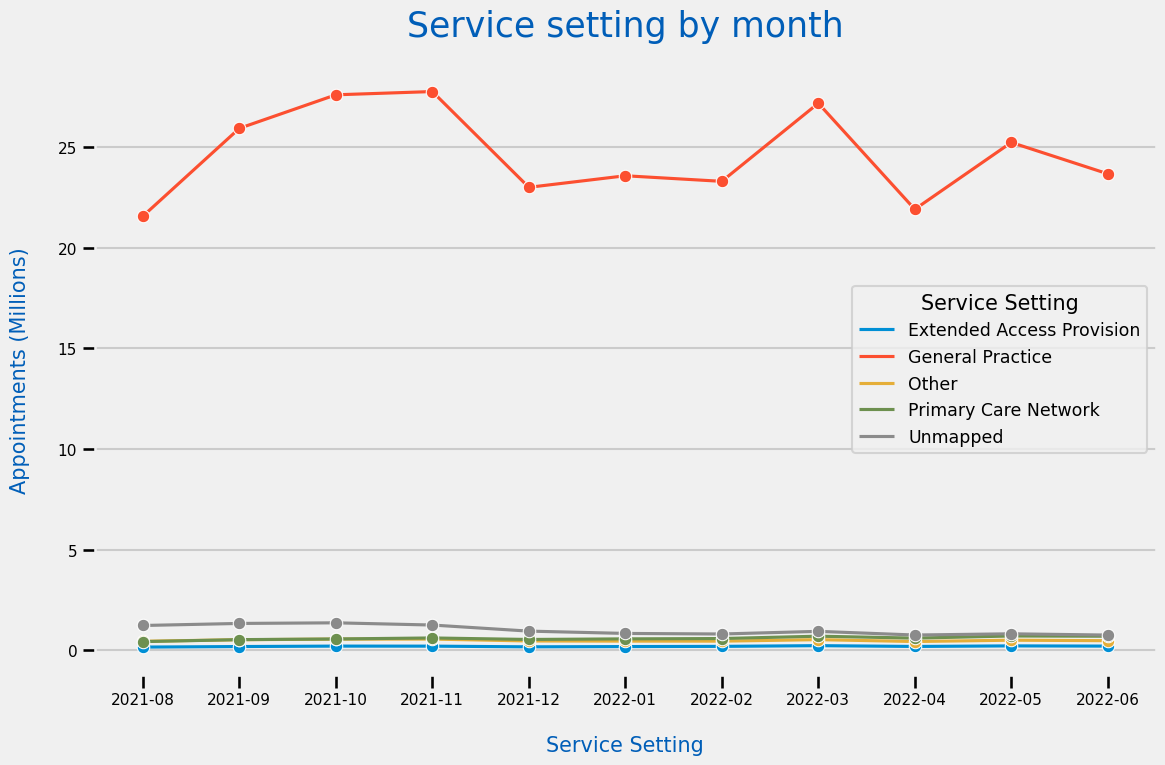

In [139]:
# Create a new DataFrame.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Visualize the graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'service_setting', data = nc_ss, errorbar = None, marker = 'o')
plt.title('Service setting by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Service Setting', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 0.5e7, 1e7, 1.5e7, 2e7, 2.5e7], ['0', '5', '10', '15', '20', '25'], size = 11)
plt.grid(axis = 'x')
plt.legend(title='Service Setting', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.tight_layout()
plt.show()

**Context type by month**

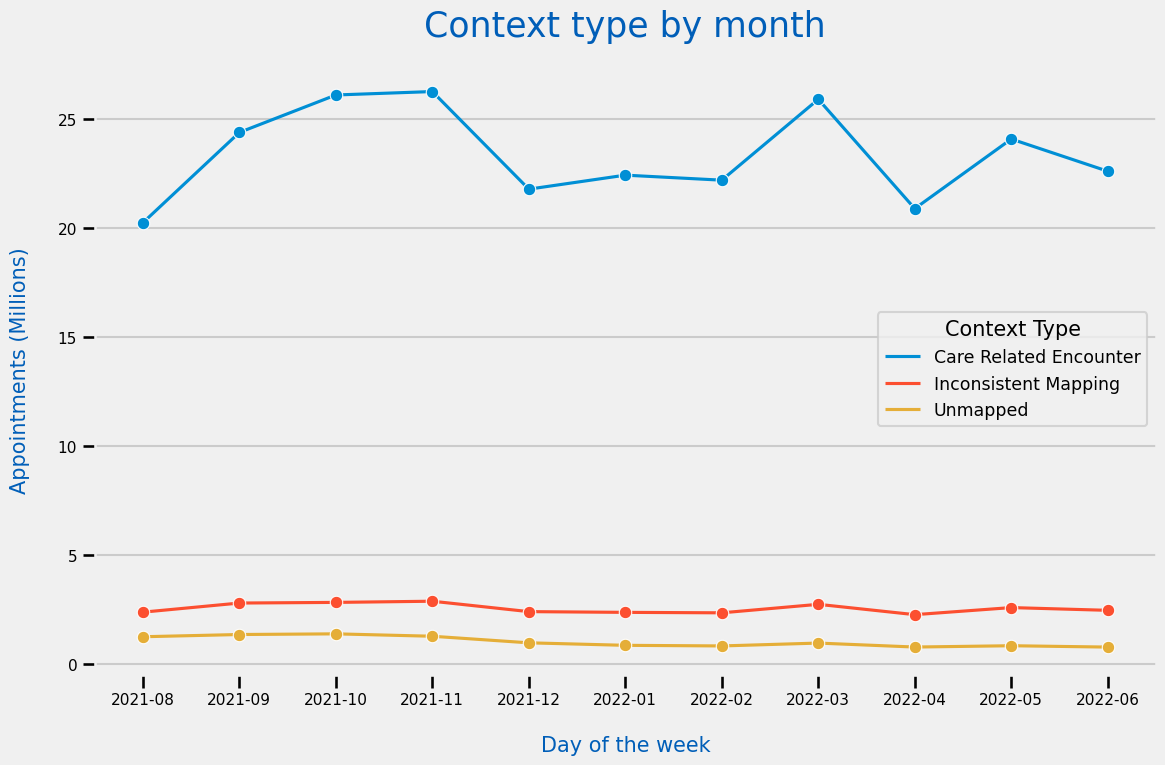

In [140]:
# Create a new DataFrame.
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# Visualize the graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'context_type', data = nc_ct, errorbar = None, marker = 'o')
plt.title('Context type by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Day of the week', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 0.5e7, 1e7, 1.5e7, 2e7, 2.5e7], ['0', '5', '10', '15', '20', '25'], size = 11)
plt.grid(axis = 'x')
plt.legend(title='Context Type', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.tight_layout()
plt.show()

**Top 5 national categories by month**

In [141]:
# Check the top 5 categories.
nc_top_5 = nc.groupby(['national_category'])['count_of_appointments'].sum().sort_values(ascending = False).reset_index()

# Filter top 5.
nc_top_5.head()

national_category  count_of_appointments
0  General Consultation Routine               97271522
1    General Consultation Acute               53691150
2               Clinical Triage               41546964
3               Planned Clinics               28019748
4          Inconsistent Mapping               27890802

In [142]:
# Number 4 is a category related with problems with the data, so let's look for more.
nc_top_5.head(6)

national_category  count_of_appointments
0  General Consultation Routine               97271522
1    General Consultation Acute               53691150
2               Clinical Triage               41546964
3               Planned Clinics               28019748
4          Inconsistent Mapping               27890802
5    Planned Clinical Procedure               25702694

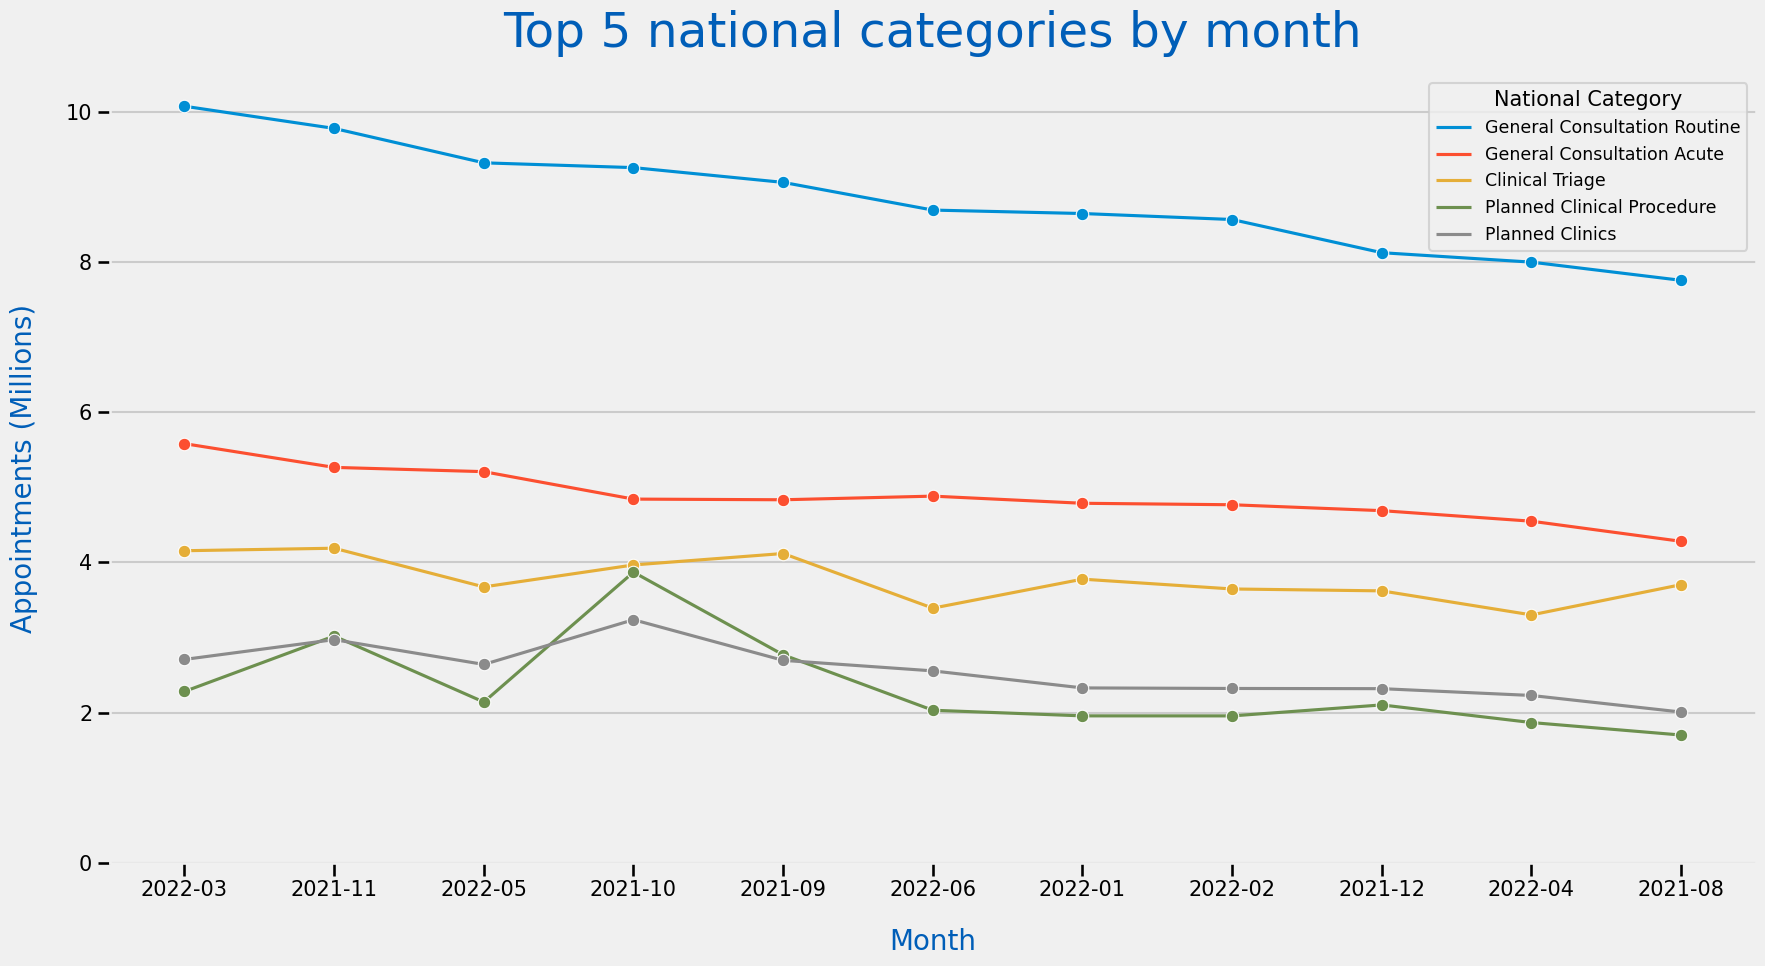

In [143]:
# Create a new DataFrame.
nc_nc = nc.groupby([ 'national_category', 'appointment_month'])['count_of_appointments'].sum().sort_values(ascending = False).reset_index()

# Filter for top 5.
nc_nc_5 = nc_nc[nc_nc['national_category'].isin(['General Consultation Routine', 'General Consultation Acute',
                                                'Clinical Triage', 'Planned Clinics', 'Planned Clinical Procedure'])]

# Visualize the graphic.
plt.figure(figsize = (18,10))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'national_category', data = nc_nc_5, errorbar = None, marker = 'o')
plt.title('Top 5 national categories by month', color = '#005EB8', size = 35, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.xticks(size = 15)
plt.yticks([0, 2e6, 4e6, 6e6, 8e6, 10e6], ['0', '2', '4', '6', '8', '10'], size = 15)
plt.grid(axis = 'x')
plt.legend(title = 'National Category', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.tight_layout()
plt.show()

**Healthcare professionals by month**

<span style="color: #808080; font-style: italic;">Filtering DataFrame AR</span>

Filtering AR by time allows to work with the same months of the other DataFrames.

In [144]:
# Filter by time.
ar_new = ar[ar['appointment_month'] >= '2021-08']

# Visualize.
ar_new

icb_ons_code appointment_month appointment_status hcp_type  \
5763      E54000008        2021-08-01           Attended       GP   
5764      E54000008        2021-08-01           Attended       GP   
5765      E54000008        2021-08-01           Attended       GP   
5766      E54000008        2021-08-01           Attended       GP   
5767      E54000008        2021-08-01           Attended       GP   
...             ...               ...                ...      ...   
295687    E54000062        2022-06-01            Unknown  Unknown   
295688    E54000062        2022-06-01            Unknown  Unknown   
295689    E54000062        2022-06-01            Unknown  Unknown   
295690    E54000062        2022-06-01            Unknown  Unknown   
295691    E54000062        2022-06-01            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
5763       Face-to-Face                             1 Day   
5764       Face-to-Face                     15 to 21 Days   
5765       Face-to-Face                       2 to 7 Days   
5766       Face-to-Face                     22 to 28 Days   
5767       Face-to-Face                      8 to 14 Days   
...                 ...                               ...   
295687          Unknown                       2 to 7 Days   
295688          Unknown                     22 to 28 Days   
295689          Unknown                      8 to 14 Days   
295690          Unknown                 More than 28 Days   
295691          Unknown                          Same Day   

        count_of_appointments  
5763                    28360  
5764                     6345  
5765                    45744  
5766                     3061  
5767                    14940  
...                       ...  
295687                     58  
295688                     20  
295689                     67  
295690                     13  
295691                      7  

[108978 rows x 7 columns]

In [145]:
# Check relevant columns.

# No need to groupby because it was previously done.
ar_agg = ar_new[['appointment_month', 'hcp_type', 'appointment_status',
                 'appointment_mode', 'time_between_book_and_appointment']]

# Visualize.
ar_agg

appointment_month hcp_type appointment_status appointment_mode  \
5763          2021-08-01       GP           Attended     Face-to-Face   
5764          2021-08-01       GP           Attended     Face-to-Face   
5765          2021-08-01       GP           Attended     Face-to-Face   
5766          2021-08-01       GP           Attended     Face-to-Face   
5767          2021-08-01       GP           Attended     Face-to-Face   
...                  ...      ...                ...              ...   
295687        2022-06-01  Unknown            Unknown          Unknown   
295688        2022-06-01  Unknown            Unknown          Unknown   
295689        2022-06-01  Unknown            Unknown          Unknown   
295690        2022-06-01  Unknown            Unknown          Unknown   
295691        2022-06-01  Unknown            Unknown          Unknown   

       time_between_book_and_appointment  
5763                               1 Day  
5764                       15 to 21 Days  
5765                         2 to 7 Days  
5766                       22 to 28 Days  
5767                        8 to 14 Days  
...                                  ...  
295687                       2 to 7 Days  
295688                     22 to 28 Days  
295689                      8 to 14 Days  
295690                 More than 28 Days  
295691                          Same Day  

[108978 rows x 5 columns]

In [146]:
ar_agg.describe(include='O')

hcp_type appointment_status appointment_mode  \
count                 108978             108978           108978   
unique                     3                  3                5   
top     Other Practice staff           Attended     Face-to-Face   
freq                   42209              40992            29593   

       time_between_book_and_appointment  
count                             108978  
unique                                 8  
top                             Same Day  
freq                               16166

<span style="color: #808080; font-style: italic;">Healthcare professionals</span>


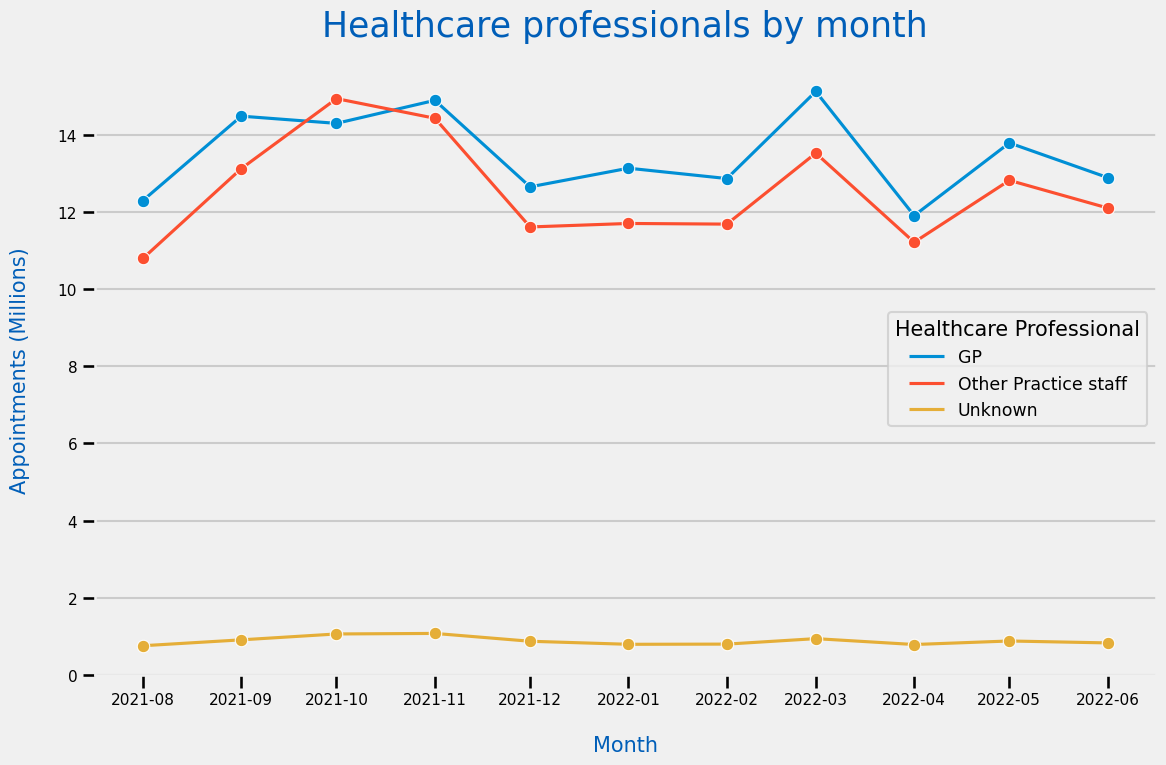

In [147]:
# Filter with relevant columns.
ar_hcp = ar_new.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

# Visualize the graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = ar_hcp, hue = 'hcp_type', errorbar = None, marker = 'o')
plt.title('Healthcare professionals by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 2e6, 4e6, 6e6, 8e6, 10e6, 12e6, 14e6], ['0', '2', '4', '6', '8', '10', '12', '14'],size = 11)
plt.grid(axis = 'x')
plt.legend(title='Healthcare Professional', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.tight_layout()
plt.show()

In [148]:
# let's exclude Unkonw and just check the two HCP types.
ar_type = ar_hcp[ar_hcp['hcp_type'].isin(['GP', 'Other Practice staff'])]

# Visualize.
ar_type.head()

appointment_month              hcp_type  count_of_appointments
0        2021-08-01                    GP               12299022
1        2021-08-01  Other Practice staff               10797821
3        2021-09-01                    GP               14487785
4        2021-09-01  Other Practice staff               13126731
6        2021-10-01                    GP               14300751

In [149]:
# Display the difference in share.

# Pivot DataFrame to have healthcare professionals type as separate columns.
hcp_pivot = ar_type.pivot(index = 'appointment_month', columns = 'hcp_type', values = 'count_of_appointments').reset_index()

# Visualize
hcp_pivot.head()

hcp_type appointment_month        GP  Other Practice staff
0               2021-08-01  12299022              10797821
1               2021-09-01  14487785              13126731
2               2021-10-01  14300751              14942504
3               2021-11-01  14897749              14432800
4               2021-12-01  12654767              11614470

In [150]:
# Calculate percentages.
hcp_pivot['gp_share'] = ((hcp_pivot['GP'] / (hcp_pivot['GP'] + hcp_pivot['Other Practice staff'])) * 100).round(2)
hcp_pivot['other_practice_staff_share'] = ((hcp_pivot['Other Practice staff'] / (hcp_pivot['GP'] + hcp_pivot['Other Practice staff'])) * 100).round(2)

# Visualize.
hcp_pivot.head()

hcp_type appointment_month        GP  Other Practice staff  gp_share  \
0               2021-08-01  12299022              10797821     53.25   
1               2021-09-01  14487785              13126731     52.46   
2               2021-10-01  14300751              14942504     48.90   
3               2021-11-01  14897749              14432800     50.79   
4               2021-12-01  12654767              11614470     52.14   

hcp_type  other_practice_staff_share  
0                              46.75  
1                              47.54  
2                              51.10  
3                              49.21  
4                              47.86

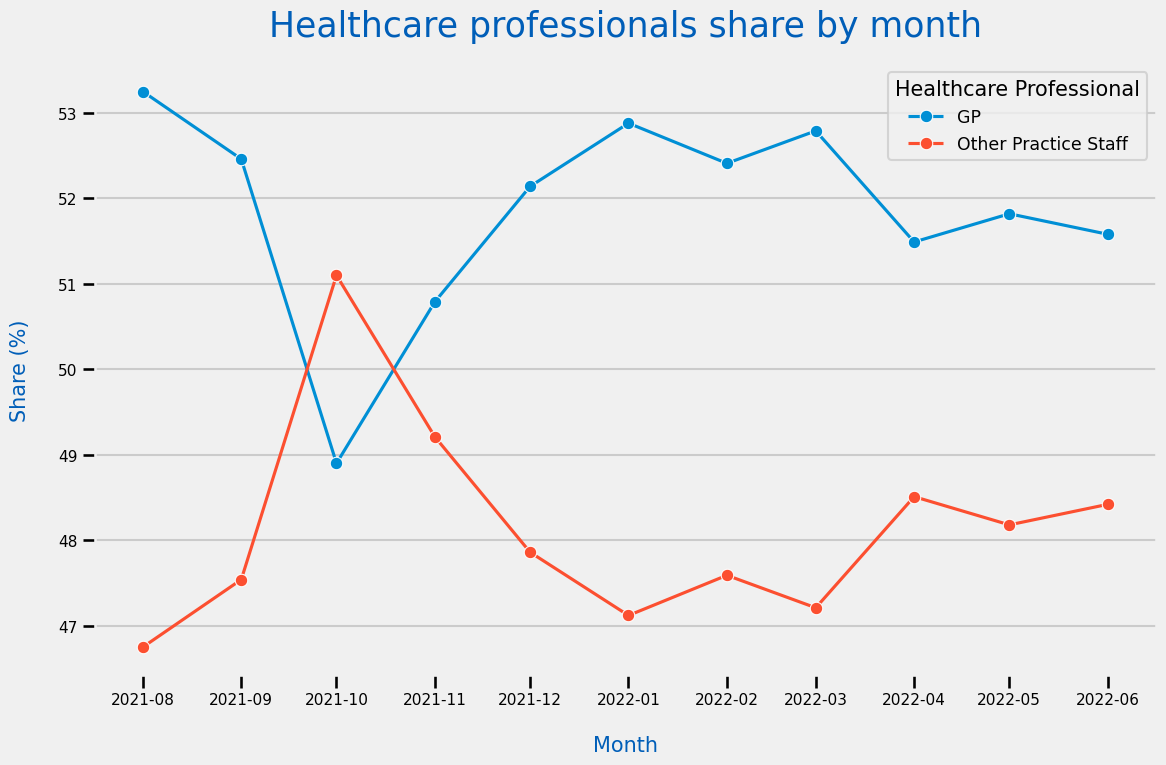

In [151]:
# Visualize the graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'gp_share', data = hcp_pivot, marker = 'o', label = 'GP')
sns.lineplot(x = 'appointment_month', y = 'other_practice_staff_share', data = hcp_pivot, marker = 'o', label = 'Other Practice Staff')
plt.title('Healthcare professionals share by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.grid(axis = 'x')
plt.legend(title = 'Healthcare Professional', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.tight_layout()
plt.show()

**Appointment status by month**

In [152]:
# Filter with relevant columns.
ar_as = ar_new.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

# Visualize.
ar_as.head()

appointment_month appointment_status  count_of_appointments
0        2021-08-01           Attended               22081765
1        2021-08-01                DNA                 949137
2        2021-08-01            Unknown                 821269
3        2021-09-01           Attended               25757066
4        2021-09-01                DNA                1321348

In [153]:
# let's exclude Unkonw and just check if appointments are attended or not.
ar_status = ar_as[ar_as['appointment_status'].isin(['Attended', 'DNA'])]

# Visualize.
ar_status.head()

appointment_month appointment_status  count_of_appointments
0        2021-08-01           Attended               22081765
1        2021-08-01                DNA                 949137
3        2021-09-01           Attended               25757066
4        2021-09-01                DNA                1321348
6        2021-10-01           Attended               27170506

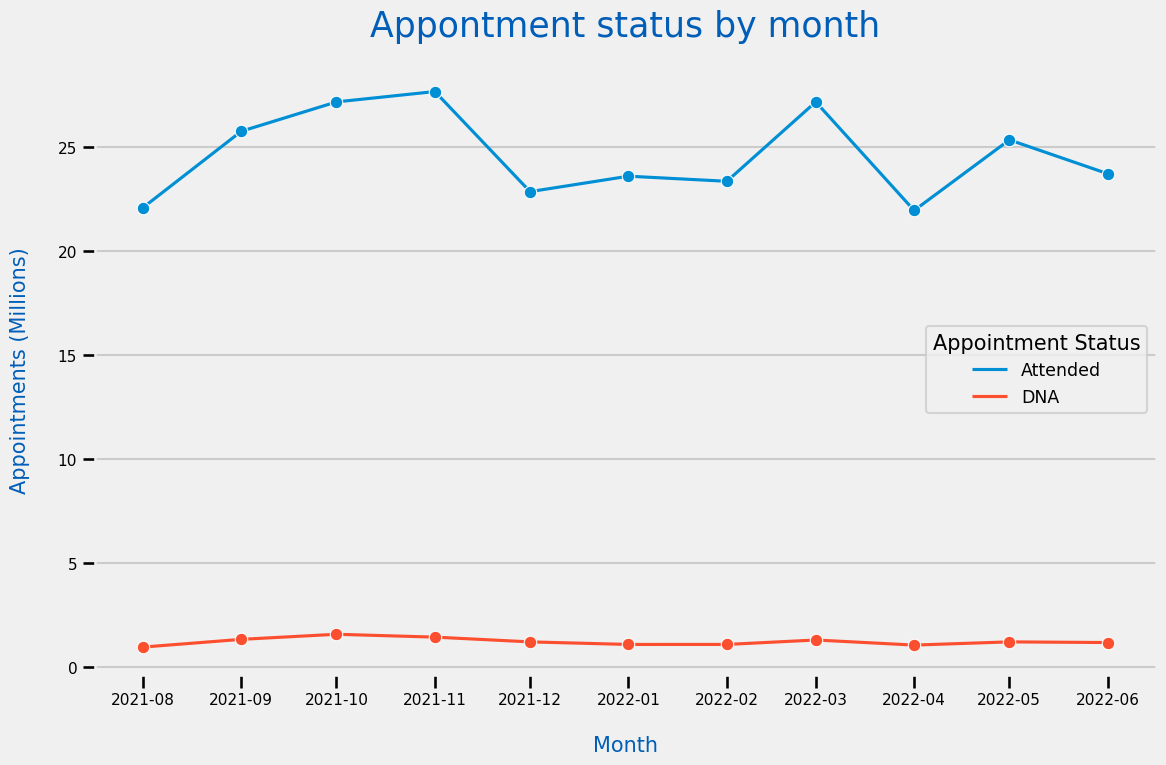

In [154]:
# Visualize the graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = ar_status, hue = 'appointment_status', errorbar = None, marker = 'o')
plt.title('Appontment status by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 0.5e7, 1e7, 1.5e7, 2e7, 2.5e7], ['0', '5', '10', '15', '20', '25'],size = 11)
plt.grid(axis = 'x')
plt.legend(title='Appointment Status', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.tight_layout()
plt.show()

In [155]:
# Display the difference in share.

# Pivot DataFrame to have appointment_status as separate columns.
as_pivot = ar_status.pivot(index = 'appointment_month', columns ='appointment_status', values = 'count_of_appointments').reset_index()

# Visualize.
as_pivot

appointment_status appointment_month  Attended      DNA
0                         2021-08-01  22081765   949137
1                         2021-09-01  25757066  1321348
2                         2021-10-01  27170506  1565624
3                         2021-11-01  27667665  1428087
4                         2021-12-01  22853483  1198866
5                         2022-01-01  23597196  1076013
6                         2022-02-01  23351939  1076658
7                         2022-03-01  27170002  1289888
8                         2022-04-01  21948814  1045455
9                         2022-05-01  25343941  1199518
10                        2022-06-01  23715317  1167790

In [156]:
# Calculate percentages
as_pivot['Attended_share'] = ((as_pivot['Attended'] / (as_pivot['Attended'] + as_pivot['DNA'])) * 100).round(2)
as_pivot['DNA_share'] = ((as_pivot['DNA'] / (as_pivot['Attended'] + as_pivot['DNA'])) * 100).round(2)

# Visualize.
as_pivot

appointment_status appointment_month  Attended      DNA  Attended_share  \
0                         2021-08-01  22081765   949137           95.88   
1                         2021-09-01  25757066  1321348           95.12   
2                         2021-10-01  27170506  1565624           94.55   
3                         2021-11-01  27667665  1428087           95.09   
4                         2021-12-01  22853483  1198866           95.02   
5                         2022-01-01  23597196  1076013           95.64   
6                         2022-02-01  23351939  1076658           95.59   
7                         2022-03-01  27170002  1289888           95.47   
8                         2022-04-01  21948814  1045455           95.45   
9                         2022-05-01  25343941  1199518           95.48   
10                        2022-06-01  23715317  1167790           95.31   

appointment_status  DNA_share  
0                        4.12  
1                        4.88  
2                        5.45  
3                        4.91  
4                        4.98  
5                        4.36  
6                        4.41  
7                        4.53  
8                        4.55  
9                        4.52  
10                       4.69

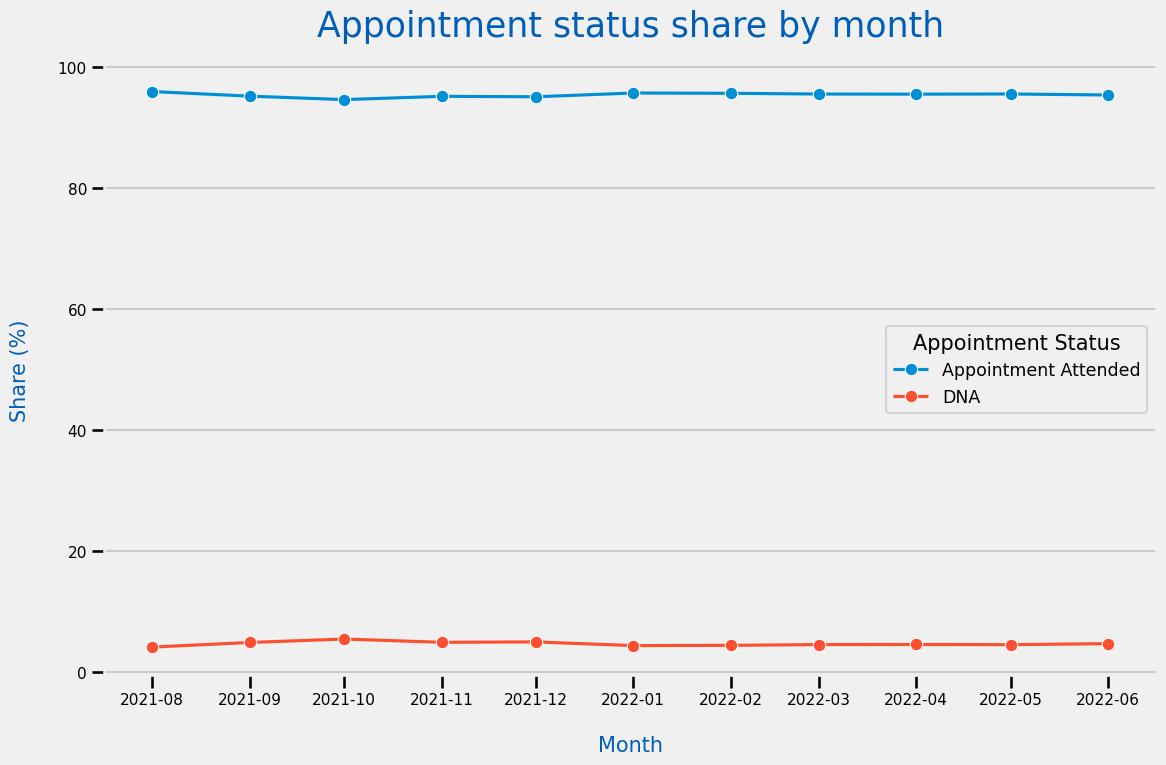

In [157]:
# Visualize the graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'Attended_share', data = as_pivot, marker = 'o', label = 'Appointment Attended')
sns.lineplot(x = 'appointment_month', y = 'DNA_share', data = as_pivot, marker = 'o', label = 'DNA')
plt.title('Appointment status share by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.grid(axis = 'x')
plt.legend(title = 'Appointment Status', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.tight_layout()
plt.show()

**Appointments modes by month**

In [158]:
# Filter with relevant columns.
ar_am = ar_new.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Visualize.
ar_am.head(7)

appointment_month appointment_mode  count_of_appointments
0        2021-08-01     Face-to-Face               13717325
1        2021-08-01       Home Visit                 151619
2        2021-08-01        Telephone                9149072
3        2021-08-01          Unknown                 724126
4        2021-08-01     Video/Online                 110029
5        2021-09-01     Face-to-Face               17266602
6        2021-09-01       Home Visit                 171829

In [159]:
# let's exclude Unkonw.
ar_mode = ar_am[ar_am['appointment_mode'] != 'Unknown']

# Visualize.
ar_mode.head()

appointment_month appointment_mode  count_of_appointments
0        2021-08-01     Face-to-Face               13717325
1        2021-08-01       Home Visit                 151619
2        2021-08-01        Telephone                9149072
4        2021-08-01     Video/Online                 110029
5        2021-09-01     Face-to-Face               17266602

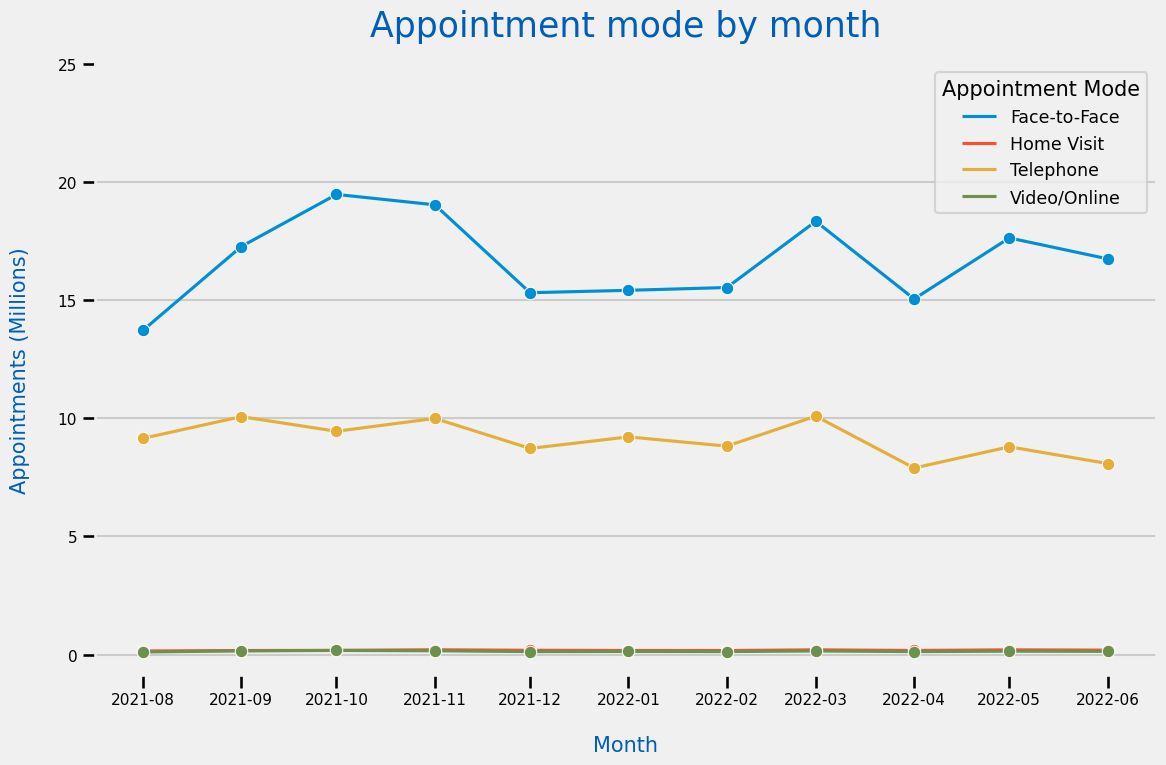

In [160]:
# Visualize the graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = ar_mode, hue = 'appointment_mode', errorbar = None, marker = 'o')
plt.title('Appointment mode by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 0.5e7, 1e7, 1.5e7, 2e7, 2.5e7], ['0', '5', '10', '15', '20', '25'],size = 11)
plt.grid(axis = 'x')
plt.legend(title = 'Appointment Mode', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.tight_layout()
plt.show()

In [161]:
# Display the difference in share.

# Pivot DataFrame to have appointment_status as separate columns.
mo_pivot = ar_mode.pivot(index = 'appointment_month', columns = 'appointment_mode', values = 'count_of_appointments').reset_index()

# Visualize.
mo_pivot.head()

appointment_mode appointment_month  Face-to-Face  Home Visit  Telephone  \
0                       2021-08-01      13717325      151619    9149072   
1                       2021-09-01      17266602      171829   10068770   
2                       2021-10-01      19471561      178593    9449544   
3                       2021-11-01      19031327      203352    9993842   
4                       2021-12-01      15312340      181264    8723325   

appointment_mode  Video/Online  
0                       110029  
1                       155354  
2                       174465  
3                       160580  
4                       125798

In [162]:
# Calculate percentages.
mo_pivot['face_to_face_share'] = ((mo_pivot['Face-to-Face'] / (mo_pivot['Face-to-Face'] + mo_pivot['Home Visit'] + 
                                                               mo_pivot['Telephone'] + mo_pivot['Video/Online'])) * 100).round(2)
mo_pivot['home_visit_share'] = ((mo_pivot['Home Visit'] / (mo_pivot['Face-to-Face'] + mo_pivot['Home Visit'] + 
                                                               mo_pivot['Telephone'] + mo_pivot['Video/Online'])) * 100).round(2)
mo_pivot['telephone_share'] = ((mo_pivot['Telephone'] / (mo_pivot['Face-to-Face'] + mo_pivot['Home Visit'] + 
                                                               mo_pivot['Telephone'] + mo_pivot['Video/Online'])) * 100).round(2)
mo_pivot['video_share'] = ((mo_pivot['Video/Online'] / (mo_pivot['Face-to-Face'] + mo_pivot['Home Visit'] + 
                                                               mo_pivot['Telephone'] + mo_pivot['Video/Online'])) * 100).round(2)

# Visualize.
mo_pivot.head()

appointment_mode appointment_month  Face-to-Face  Home Visit  Telephone  \
0                       2021-08-01      13717325      151619    9149072   
1                       2021-09-01      17266602      171829   10068770   
2                       2021-10-01      19471561      178593    9449544   
3                       2021-11-01      19031327      203352    9993842   
4                       2021-12-01      15312340      181264    8723325   

appointment_mode  Video/Online  face_to_face_share  home_visit_share  \
0                       110029               59.31              0.66   
1                       155354               62.42              0.62   
2                       174465               66.51              0.61   
3                       160580               64.76              0.69   
4                       125798               62.90              0.74   

appointment_mode  telephone_share  video_share  
0                           39.56         0.48  
1                           36.40         0.56  
2                           32.28         0.60  
3                           34.01         0.55  
4                           35.84         0.52

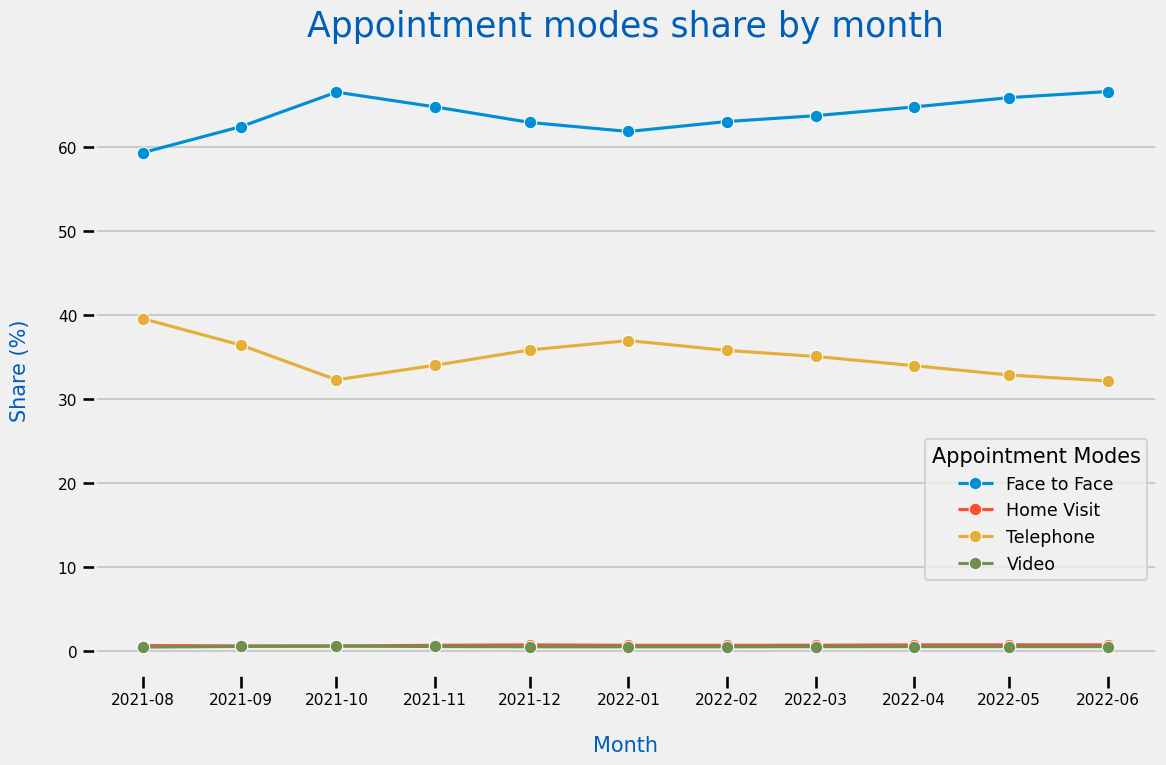

In [163]:
# Visualize the graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'face_to_face_share', data = mo_pivot, marker = 'o', label = 'Face to Face')
sns.lineplot(x = 'appointment_month', y = 'home_visit_share', data = mo_pivot, marker = 'o', label = 'Home Visit')
sns.lineplot(x = 'appointment_month', y = 'telephone_share', data = mo_pivot, marker = 'o', label = 'Telephone')
sns.lineplot(x = 'appointment_month', y = 'video_share', data = mo_pivot, marker = 'o', label = 'Video')
plt.title('Appointment modes share by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.grid(axis = 'x')
plt.legend(title = 'Appointment Modes', fontsize='x-small', title_fontsize = 'small', bbox_to_anchor=(1, 0.4))
plt.tight_layout()
plt.show()

**Time between booking and appointment by month**

In [164]:
# Filter with relevant columns.
ar_ti = ar_new.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# Visualize.
ar_ti.head(10)

appointment_month time_between_book_and_appointment  count_of_appointments
0        2021-08-01                             1 Day                2018319
1        2021-08-01                     15 to 21 Days                1453209
2        2021-08-01                       2 to 7 Days                4924960
3        2021-08-01                     22 to 28 Days                 828866
4        2021-08-01                      8 to 14 Days                2889150
5        2021-08-01                 More than 28 Days                 673225
6        2021-08-01                          Same Day               11051004
7        2021-08-01            Unknown / Data Quality                  13438
8        2021-09-01                             1 Day                2666072
9        2021-09-01                     15 to 21 Days                1869263

In [165]:
# let's exclude Unkonw / Data Quality
ar_time = ar_ti[ar_ti['time_between_book_and_appointment'] != 'Unknown / Data Quality']

# Visualize.
ar_time.head(10)

appointment_month time_between_book_and_appointment  count_of_appointments
0         2021-08-01                             1 Day                2018319
1         2021-08-01                     15 to 21 Days                1453209
2         2021-08-01                       2 to 7 Days                4924960
3         2021-08-01                     22 to 28 Days                 828866
4         2021-08-01                      8 to 14 Days                2889150
5         2021-08-01                 More than 28 Days                 673225
6         2021-08-01                          Same Day               11051004
8         2021-09-01                             1 Day                2666072
9         2021-09-01                     15 to 21 Days                1869263
10        2021-09-01                       2 to 7 Days                5955074

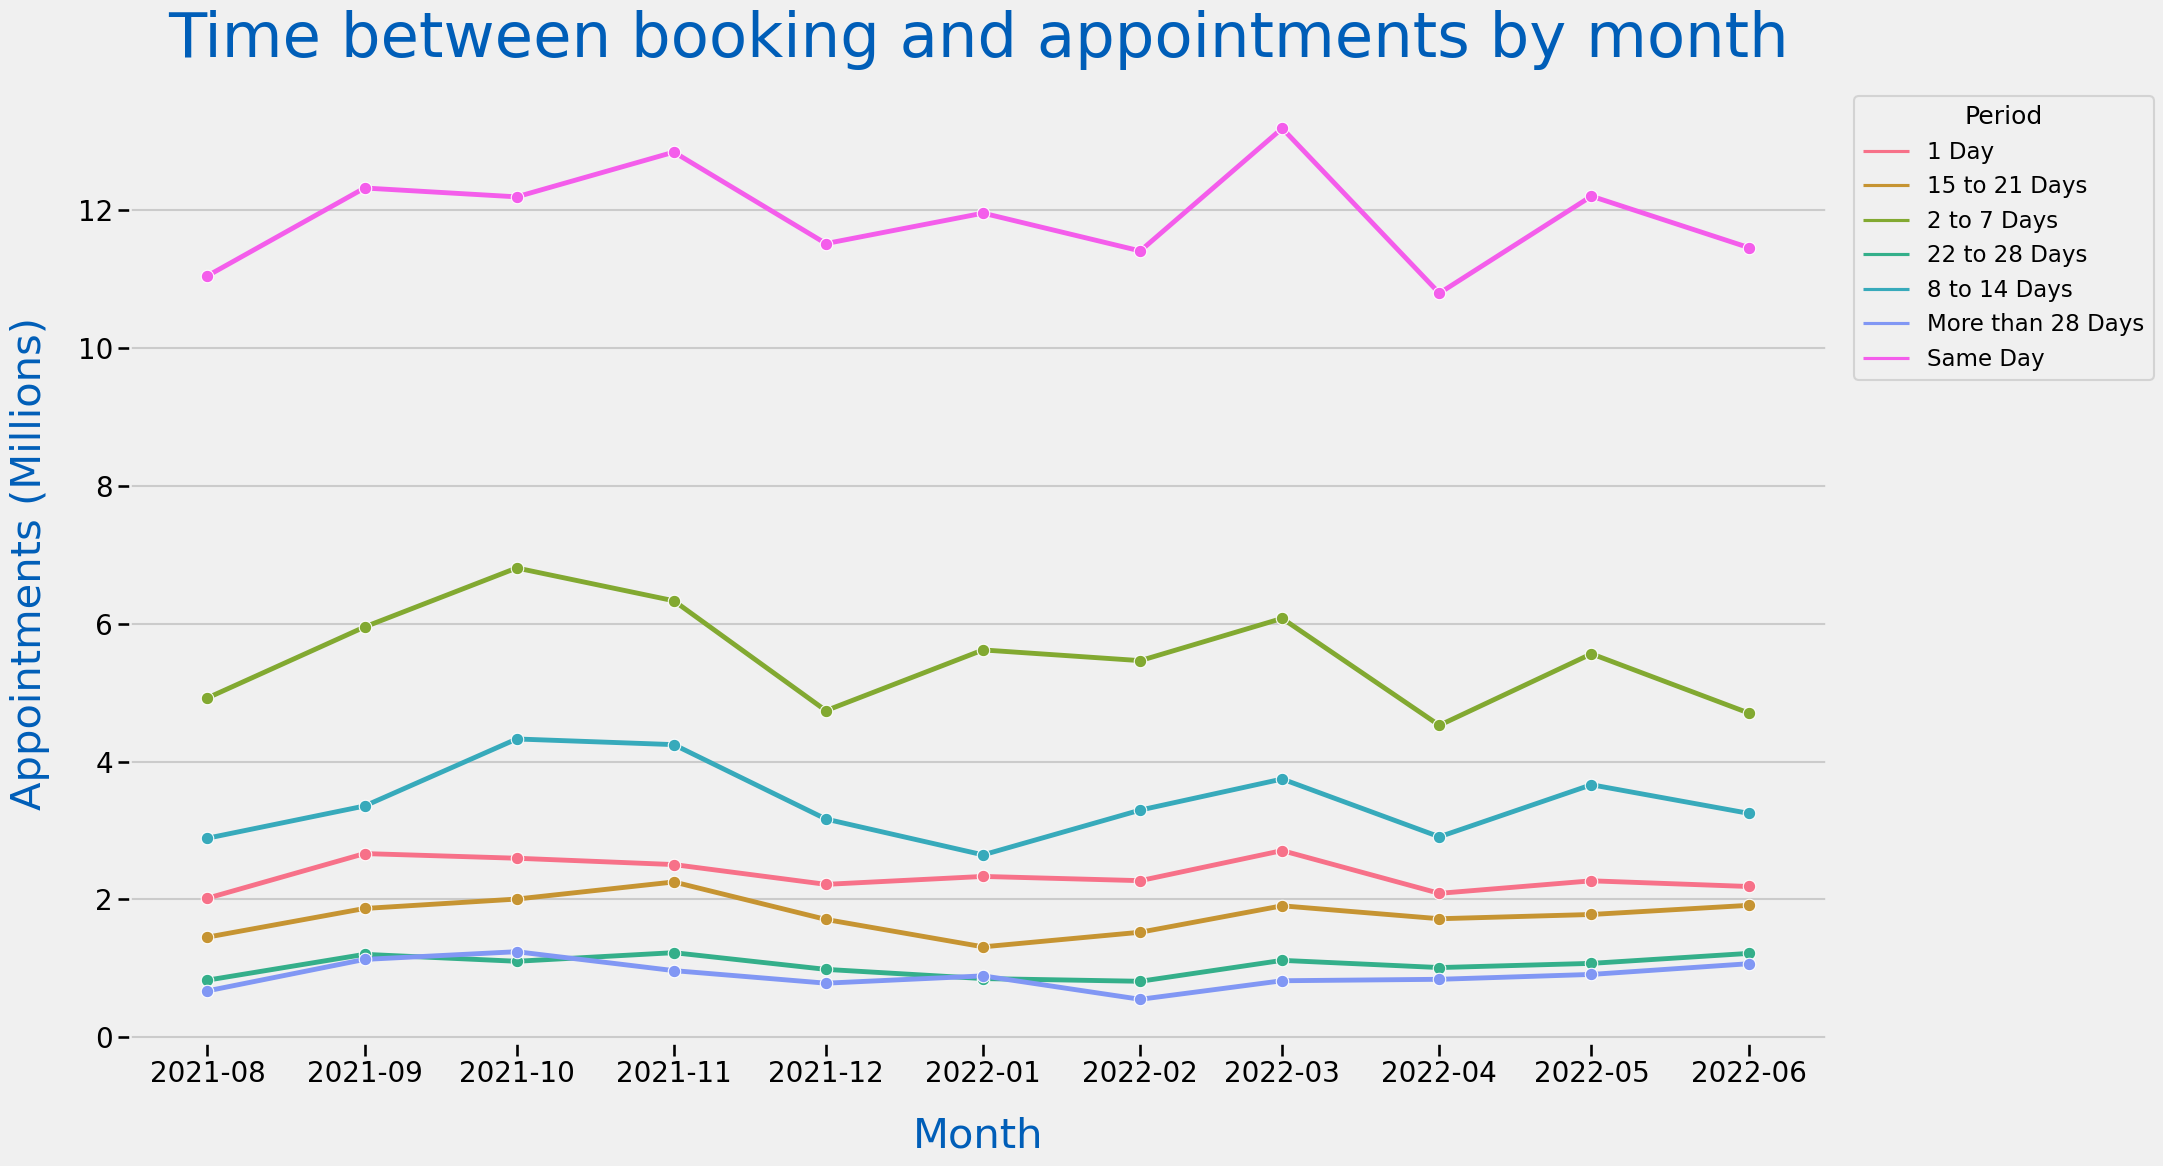

In [166]:
# Visualize the graphic.
plt.figure(figsize = (22,12))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = ar_time,
             hue = 'time_between_book_and_appointment', errorbar = None, marker = 'o', linewidth = 3.5)
plt.title('Time between booking and appointments by month', color = '#005EB8', size = 45, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 30, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 30, ha = 'center', labelpad = 20)
plt.xticks(size = 20)
plt.yticks([0, 2e6, 4e6, 6e6, 8e6, 10e6, 12e6], ['0', '2', '4', '6', '8', '10', '12'], size = 20)
plt.grid(axis = 'x')
plt.legend(title = 'Period', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [167]:
# Display the difference in share.

# Pivot DataFrame to have appointment_status as separate columns.
time_pivot = ar_time.pivot(index = 'appointment_month', columns ='time_between_book_and_appointment', values = 'count_of_appointments').reset_index()

# Visualize.
time_pivot

time_between_book_and_appointment appointment_month    1 Day  15 to 21 Days  \
0                                        2021-08-01  2018319        1453209   
1                                        2021-09-01  2666072        1869263   
2                                        2021-10-01  2598516        2005851   
3                                        2021-11-01  2506532        2254189   
4                                        2021-12-01  2219212        1709999   
5                                        2022-01-01  2334274        1312377   
6                                        2022-02-01  2272923        1524398   
7                                        2022-03-01  2709362        1908058   
8                                        2022-04-01  2088881        1720218   
9                                        2022-05-01  2270686        1782026   
10                                       2022-06-01  2188197        1914740   

time_between_book_and_appointment  2 to 7 Days  22 to 28 Days  8 to 14 Days  \
0                                      4924960         828866       2889150   
1                                      5955074        1203657       3356476   
2                                      6811322        1102915       4329393   
3                                      6335266        1227907       4247246   
4                                      4740529         985213       3167030   
5                                      5621812         851865       2647216   
6                                      5466290         812489       3297314   
7                                      6079566        1116304       3748272   
8                                      4527185        1011663       2909492   
9                                      5565378        1072508       3665115   
10                                     4706718        1217197       3250347   

time_between_book_and_appointment  More than 28 Days  Same Day  
0                                             673225  11051004  
1                                            1130118  12326333  
2                                            1241794  12197576  
3                                             967303  12847122  
4                                             785009  11519536  
5                                             890975  11961272  
6                                             550847  11412540  
7                                             820399  13192245  
8                                             841319  10799188  
9                                             912129  12207903  
10                                           1067420  11461923

In [168]:
# Calculate percentages.
time_pivot['1_day_share'] = ((time_pivot['1 Day'] / (time_pivot['1 Day'] + time_pivot['15 to 21 Days'] +
                                                     time_pivot['2 to 7 Days'] + time_pivot['22 to 28 Days'] +
                                                     time_pivot['8 to 14 Days'] + time_pivot['More than 28 Days'] +
                                                     time_pivot['Same Day'])) * 100).round(2)
time_pivot['15_to_21_days_share'] = ((time_pivot['15 to 21 Days'] / (time_pivot['1 Day'] + time_pivot['15 to 21 Days'] +
                                                     time_pivot['2 to 7 Days'] + time_pivot['22 to 28 Days'] +
                                                     time_pivot['8 to 14 Days'] + time_pivot['More than 28 Days'] +
                                                     time_pivot['Same Day'])) * 100).round(2)
time_pivot['2_to_7_days_share'] = ((time_pivot['2 to 7 Days'] / (time_pivot['1 Day'] + time_pivot['15 to 21 Days'] +
                                                     time_pivot['2 to 7 Days'] + time_pivot['22 to 28 Days'] +
                                                     time_pivot['8 to 14 Days'] + time_pivot['More than 28 Days'] +
                                                     time_pivot['Same Day'])) * 100).round(2)
time_pivot['22_to_28_days_share'] = ((time_pivot['22 to 28 Days'] / (time_pivot['1 Day'] + time_pivot['15 to 21 Days'] +
                                                     time_pivot['2 to 7 Days'] + time_pivot['22 to 28 Days'] +
                                                     time_pivot['8 to 14 Days'] + time_pivot['More than 28 Days'] +
                                                     time_pivot['Same Day'])) * 100).round(2)
time_pivot['8_to_14_days_share'] = ((time_pivot['8 to 14 Days'] / (time_pivot['1 Day'] + time_pivot['15 to 21 Days'] +
                                                     time_pivot['2 to 7 Days'] + time_pivot['22 to 28 Days'] +
                                                     time_pivot['8 to 14 Days'] + time_pivot['More than 28 Days'] +
                                                     time_pivot['Same Day'])) * 100).round(2)
time_pivot['more_than_28_days_share'] = ((time_pivot['More than 28 Days'] / (time_pivot['1 Day'] + time_pivot['15 to 21 Days'] +
                                                     time_pivot['2 to 7 Days'] + time_pivot['22 to 28 Days'] +
                                                     time_pivot['8 to 14 Days'] + time_pivot['More than 28 Days'] +
                                                     time_pivot['Same Day'])) * 100).round(2)
time_pivot['same_day_share'] = ((time_pivot['Same Day'] / (time_pivot['1 Day'] + time_pivot['15 to 21 Days'] +
                                                     time_pivot['2 to 7 Days'] + time_pivot['22 to 28 Days'] +
                                                     time_pivot['8 to 14 Days'] + time_pivot['More than 28 Days'] +
                                                     time_pivot['Same Day'])) * 100).round(2)

# Visualize.
time_pivot

time_between_book_and_appointment appointment_month    1 Day  15 to 21 Days  \
0                                        2021-08-01  2018319        1453209   
1                                        2021-09-01  2666072        1869263   
2                                        2021-10-01  2598516        2005851   
3                                        2021-11-01  2506532        2254189   
4                                        2021-12-01  2219212        1709999   
5                                        2022-01-01  2334274        1312377   
6                                        2022-02-01  2272923        1524398   
7                                        2022-03-01  2709362        1908058   
8                                        2022-04-01  2088881        1720218   
9                                        2022-05-01  2270686        1782026   
10                                       2022-06-01  2188197        1914740   

time_between_book_and_appointment  2 to 7 Days  22 to 28 Days  8 to 14 Days  \
0                                      4924960         828866       2889150   
1                                      5955074        1203657       3356476   
2                                      6811322        1102915       4329393   
3                                      6335266        1227907       4247246   
4                                      4740529         985213       3167030   
5                                      5621812         851865       2647216   
6                                      5466290         812489       3297314   
7                                      6079566        1116304       3748272   
8                                      4527185        1011663       2909492   
9                                      5565378        1072508       3665115   
10                                     4706718        1217197       3250347   

time_between_book_and_appointment  More than 28 Days  Same Day  1_day_share  \
0                                             673225  11051004         8.47   
1                                            1130118  12326333         9.35   
2                                            1241794  12197576         8.58   
3                                             967303  12847122         8.25   
4                                             785009  11519536         8.83   
5                                             890975  11961272         9.11   
6                                             550847  11412540         8.97   
7                                             820399  13192245         9.16   
8                                             841319  10799188         8.74   
9                                             912129  12207903         8.26   
10                                           1067420  11461923         8.48   

time_between_book_and_appointment  15_to_21_days_share  2_to_7_days_share  \
0                                                 6.10              20.66   
1                                                 6.56              20.89   
2                                                 6.62              22.49   
3                                                 7.42              20.85   
4                                                 6.81              18.87   
5                                                 5.12              21.94   
6                                                 6.02              21.57   
7                                                 6.45              20.56   
8                                                 7.20              18.94   
9                                                 6.49              20.26   
10                                                7.42              18.24   

time_between_book_and_appointment  22_to_28_days_share  8_to_14_days_share  \
0                                                 3.48               12.12   
1                                                 4.22               11.

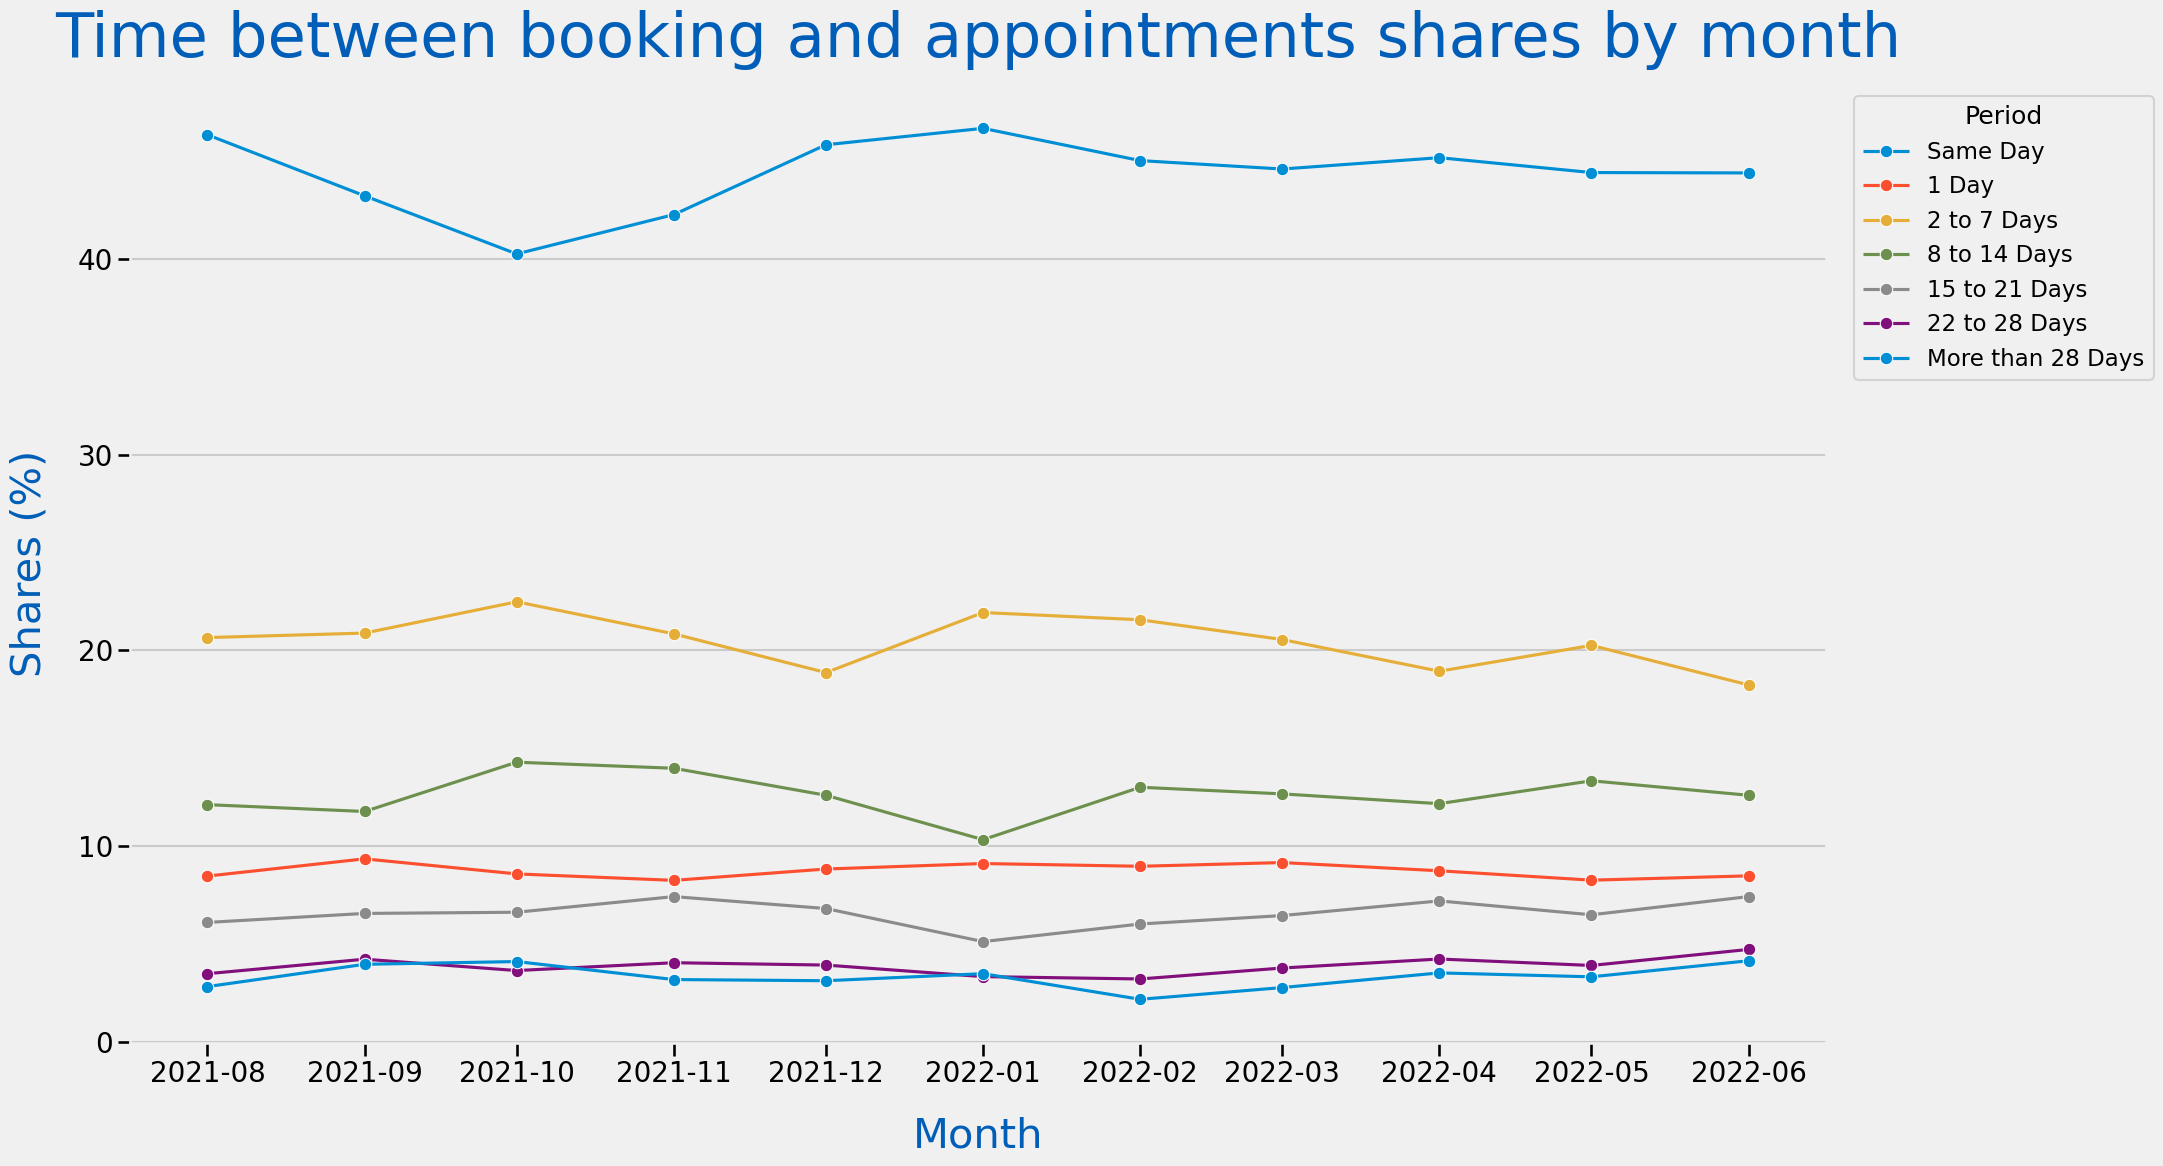

In [169]:
# Visualize the graphic.
plt.figure(figsize = (22,12))
sns.lineplot(x = 'appointment_month', y = 'same_day_share', data = time_pivot, marker = 'o', label = 'Same Day')
sns.lineplot(x = 'appointment_month', y = '1_day_share', data = time_pivot, marker = 'o', label = '1 Day')
sns.lineplot(x = 'appointment_month', y = '2_to_7_days_share', data = time_pivot, marker = 'o', label = '2 to 7 Days')
sns.lineplot(x = 'appointment_month', y = '8_to_14_days_share', data = time_pivot, marker = 'o', label = '8 to 14 Days')
sns.lineplot(x = 'appointment_month', y = '15_to_21_days_share', data = time_pivot, marker = 'o', label = '15 to 21 Days')
sns.lineplot(x = 'appointment_month', y = '22_to_28_days_share', data = time_pivot, marker = 'o', label = '22 to 28 Days')
sns.lineplot(x = 'appointment_month', y = 'more_than_28_days_share', data = time_pivot, marker = 'o', label = 'More than 28 Days')
plt.title('Time between booking and appointments shares by month', color = '#005EB8', size = 45, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 30, ha = 'center', labelpad = 20)
plt.ylabel('Shares (%)', color='#005EB8', size = 30, ha = 'center', labelpad = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(axis = 'x')
plt.legend(title = 'Period', bbox_to_anchor=(1.01, 1), loc = 'best')
plt.tight_layout()
plt.show()

**Service settings by season**

<span style="color: #808080; font-style: italic;">Filter the data</span>

In [170]:
# Create new DataFrame
nc_ss_day = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Visualize
nc_ss_day.head()

appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843

In [171]:
nc_ss_view = nc_ss_day.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

nc_ss_view

appointment_month  count_of_appointments
0            2021-08               23852171
1            2021-09               28522501
2            2021-10               30303834
3            2021-11               30405070
4            2021-12               25140776
5            2022-01               25635474
6            2022-02               25355260
7            2022-03               29595038
8            2022-04               23913060
9            2022-05               27495508
10           2022-06               25828078

<span style="color: #808080; font-style: italic;">Summer</span>

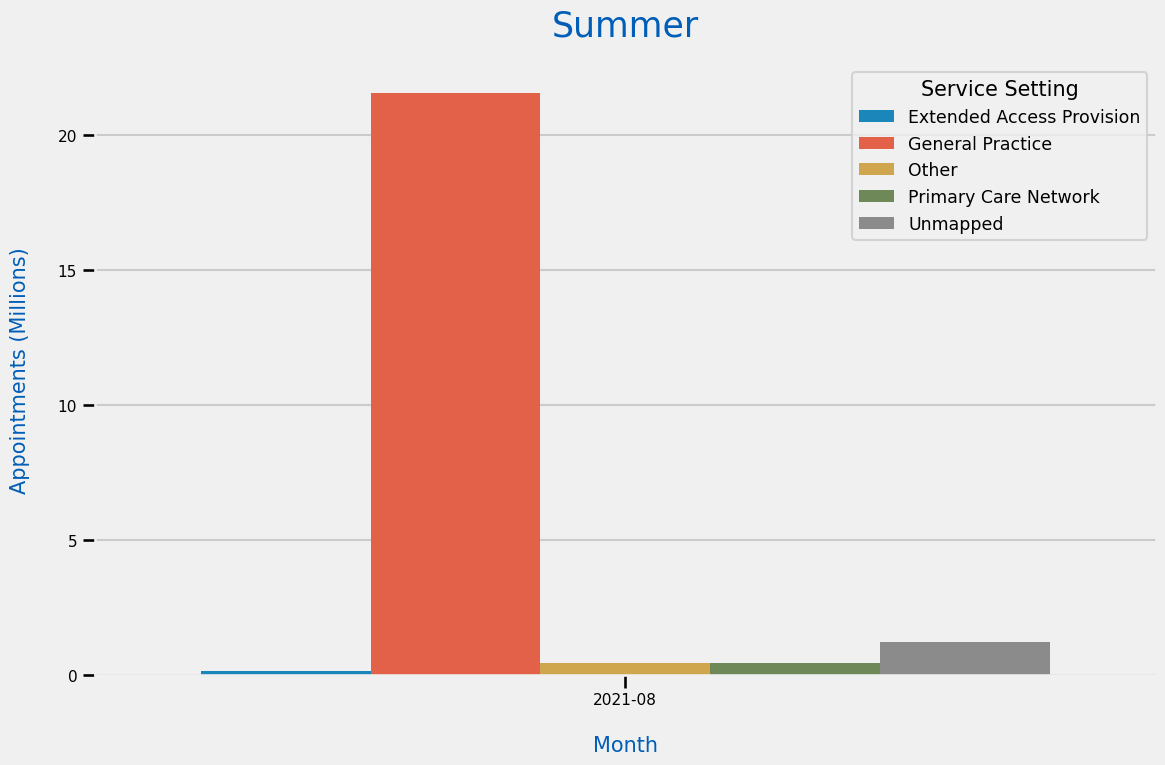

In [172]:
# Filter the season.
nc_summer = nc_ss_day[nc_ss_day['appointment_month'].isin(['2021-06', '2021-07', '2021-08'])]

# Plot the graph.
plt.figure(figsize = (12,8))
sns.barplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'service_setting', data = nc_summer)
plt.title('Summer', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 0.5e7, 1e7, 1.5e7, 2e7], ['0', '5', '10', '15', '20'], size = 11)
plt.legend(title = 'Service Setting', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.tight_layout()
plt.show()

<span style="color: #808080; font-style: italic;">Autumn</span>

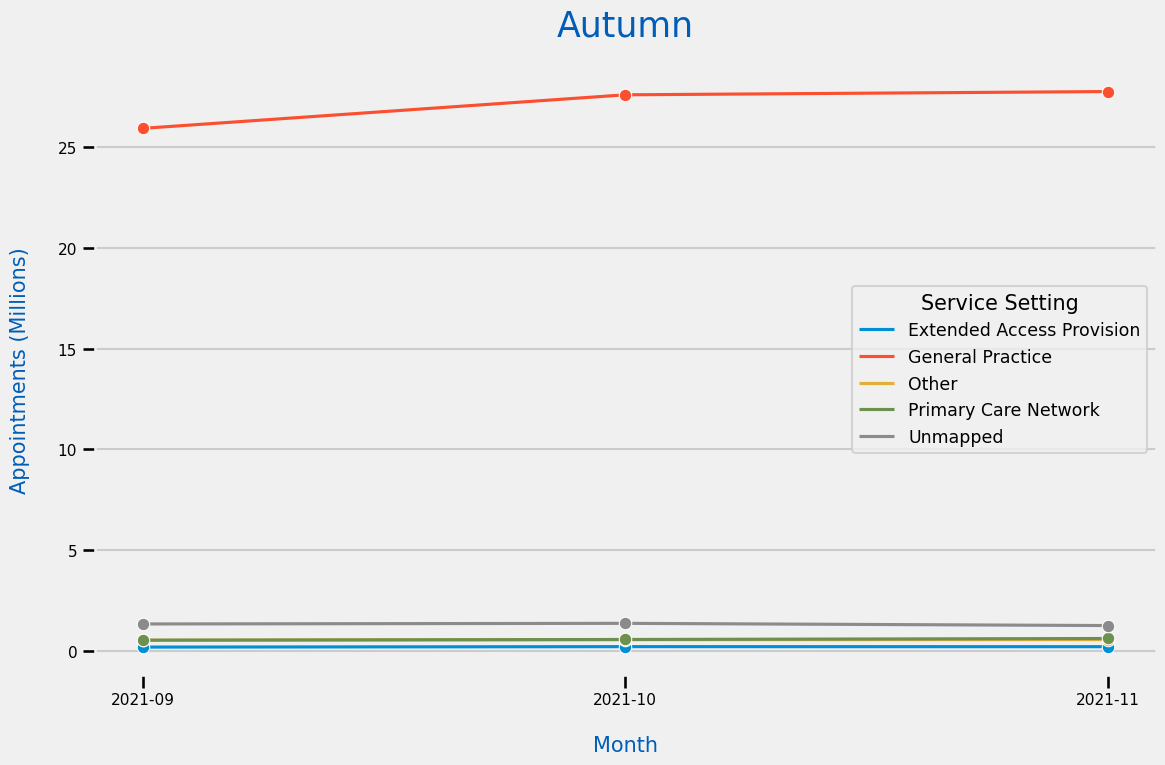

In [173]:
# Filter the season.
nc_autumn = nc_ss_day[nc_ss_day['appointment_month'].isin(['2021-09', '2021-10', '2021-11'])]

# Plot the graph.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'service_setting',
             data = nc_autumn, errorbar = None, marker = 'o')
plt.title('Autumn', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 0.5e7, 1e7, 1.5e7, 2e7, 2.5e7], ['0', '5', '10', '15', '20', '25'], size = 11)
plt.legend(title = 'Service Setting', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

<span style="color: #808080; font-style: italic;">Winter</span>

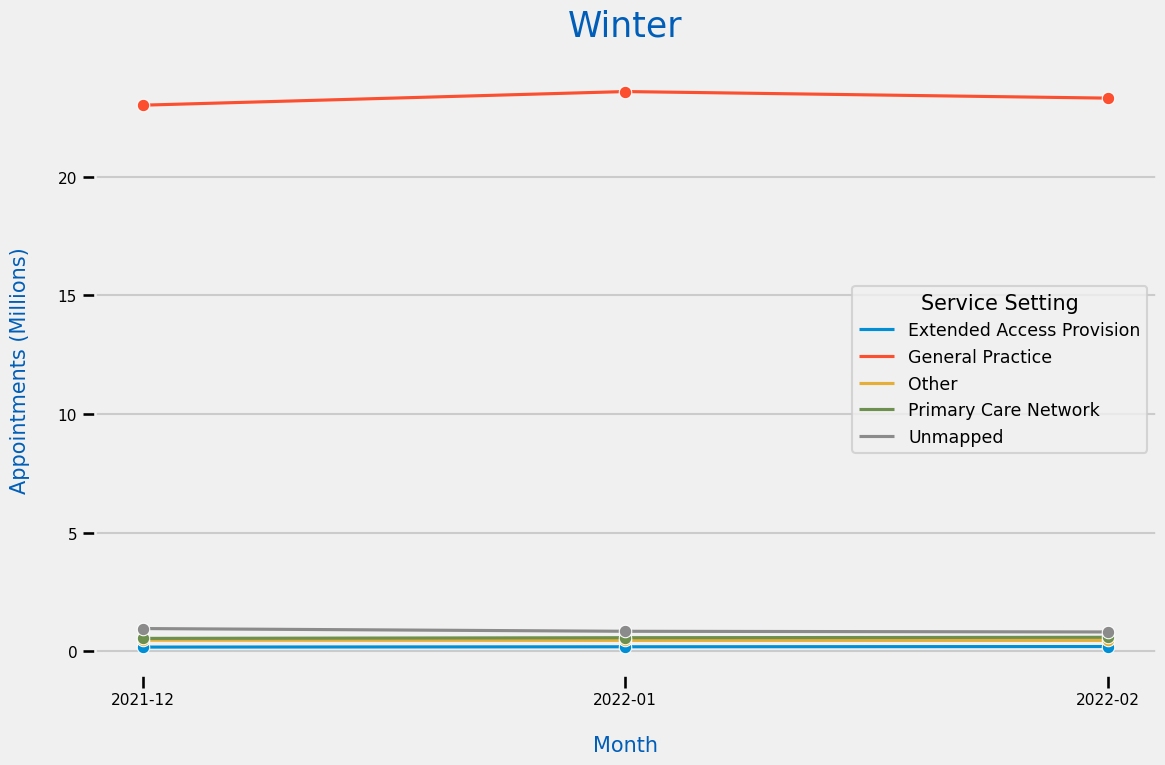

In [174]:
# Filter the season.
nc_winter = nc_ss_day[nc_ss_day['appointment_month'].isin(['2021-12', '2022-01', '2022-02'])]

# Plot the graph.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'service_setting',
             data = nc_winter, errorbar = None, marker = 'o')
plt.title('Winter', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 0.5e7, 1e7, 1.5e7, 2e7], ['0', '5', '10', '15', '20'], size = 11)
plt.legend(title = 'Service Setting', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

<span style="color: #808080; font-style: italic;">Spring</span>

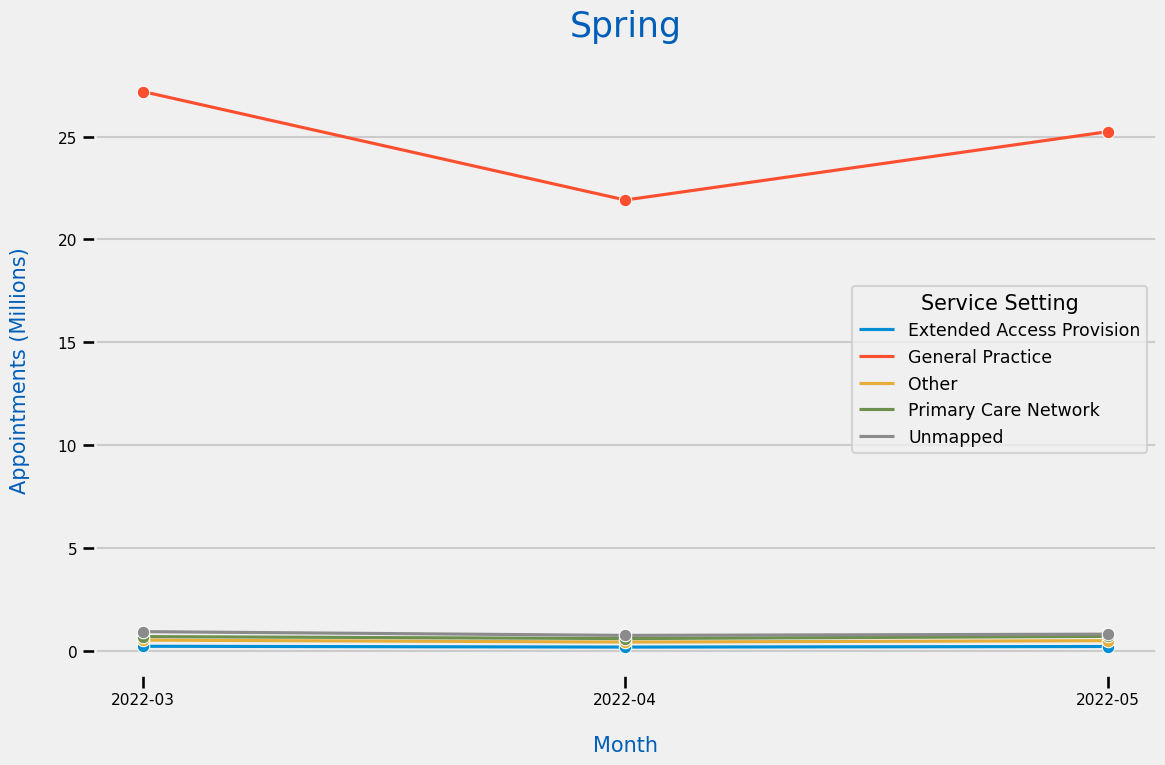

In [175]:
# Filter the season.
nc_spring = nc_ss_day[nc_ss_day['appointment_month'].isin(['2022-03', '2022-04', '2022-05'])]

# Plot the graph.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'service_setting',
             data = nc_spring, errorbar = None, marker = 'o')
plt.title('Spring', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([0, 0.5e7, 1e7, 1.5e7, 2e7, 2.5e7], ['0', '5', '10', '15', '20', '25'], size = 11)
plt.legend(title = 'Service Setting', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

<div style="color:#005EB8; font-weight:bold;">
    
## Twitter data exploration
    
</div>

In [176]:
# Set a max for column.
pd.options.display.max_colwidth = 200

In [177]:
# Prepare the workstation.
tweets = pd.read_csv('tweets.csv')

# Visualize first five rows.
tweets.head()

tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

In [178]:
# Explore dataset.
tweets.describe()

tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000

In [179]:
# More exploration.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [180]:
# Check tweet_rt.
tweets['tweet_retweet_count'].value_counts()

tweet_retweet_count
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: count, dtype: int64

In [181]:
# Max retweets.
tweets['tweet_retweet_count'].max()

303

In [182]:
# Check which tweet is that one.
max_retweet = tweets[tweets['tweet_retweet_count'] == 303]

# Visualize.
max_retweet

tweet_id  \
263  1567649792897032192   

                                                                                                                                     tweet_full_text  \
263  RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…   

                                                                                                                                                                                              tweet_entities  \
263  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'UltimaLionsDen', 'name': "Ultima Lions' Den", 'id': 973581329119039488, 'id_str': '973581329119039488', 'indices': [3, 18]}], 'ur...   

    tweet_entities_hashtags  \
263                     NaN   

                                           tweet_metadata  \
263  {'iso_language_code': 'en', 'result_type': 'recent'}   

     tweet_retweet_count  tweet_favorite_count  tweet_favorited  \
263                  303                     0            False   

     tweet_retweeted tweet_lang  
263            False         en

In [183]:
# Check tweet_favorite.
tweets['tweet_favorite_count'].value_counts()

tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: count, dtype: int64

In [184]:
# Max favorites.
tweets['tweet_favorite_count'].max()

42

In [185]:
# Check which tweet is that one.
max_favorite = tweets[tweets['tweet_favorite_count'] == 42]

# Visualize.
max_favorite

tweet_id  \
1156  1567583855422611461   

                                                                                                                                                                                              tweet_full_text  \
1156  Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...   

                                                                                                                                                                                               tweet_entities  \
1156  {'hashtags': [{'text': 'TipsForNewDocs', 'indices': [22, 37]}, {'text': 'MedEd', 'indices': [38, 44]}, {'text': 'MedTwitter', 'indices': [45, 56]}, {'text': 'medicine', 'indices': [57, 66]}, {'tex...   

                                                                                                                                                           tweet_entities_hashtags  \
1156  #TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid   

                                            tweet_metadata  \
1156  {'iso_language_code': 'en', 'result_type': 'recent'}   

      tweet_retweet_count  tweet_favorite_count  tweet_favorited  \
1156                   12                    42            False   

      tweet_retweeted tweet_lang  
1156            False         en

In [186]:
# Subset the data with just text columns.
# Let's subset the columns whose type is "object".
tweets_text = tweets.select_dtypes(include='object').copy()

# Visualize.
tweets_text.head()

tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata tweet_lang  
0  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
1  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
2  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
3  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
4  {'iso_language_code': 'en', 'result_type': 'recent'}         en

**Hashtags exploration**

In [187]:
# Create an empty list to store data.
tags = []

# Creating a loop.
for y in [x.split(' ') for x in tweets_text['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase
            tags.append(z.lower())

# Create the Pandas Series to count the values in the list.
tags_series = pd.Series(tags)

# Display the first 30 records.
tags_series.head(30)

0                                    #healthcare
1                                 #premisehealth
2                                        #hiring
3                                    #healthcare
4                                        🚨#new:🚨
5                                look!\n\n#blogs
6                         #digitaltransformation
7                                 #cybersecurity
8                                    #accounting
9                                       #finance
10                                   #healthcare
11    https://t.co/jrgqeqdme4\n.\n#firstcoastcna
12                                      #cnaexam
13                           #cnaexampreparation
14                                 #jacksonville
15                                  #cnatraining
16                                        #nurse
17                                      #nursing
18                                    #nurselife
19                            #nursepractitioner
20                  

In [188]:
# Create the DataFrame.
hashtags = tags_series.value_counts().reset_index()

# Rename the columns.
hashtags.columns = ['word', 'count']

# Ensure the data type of 'count' is an integer.
hashtags['count'] = hashtags['count'].astype(int)

# Visualize.
hashtags.head()

word  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38

In [189]:
# Sense-check the data.
hashtags.shape

(1754, 2)

In [190]:
# Check unique values.
hashtags.nunique()

word     1754
count      29
dtype: int64

In [191]:
# Check columns and data types.
hashtags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 20.7+ KB


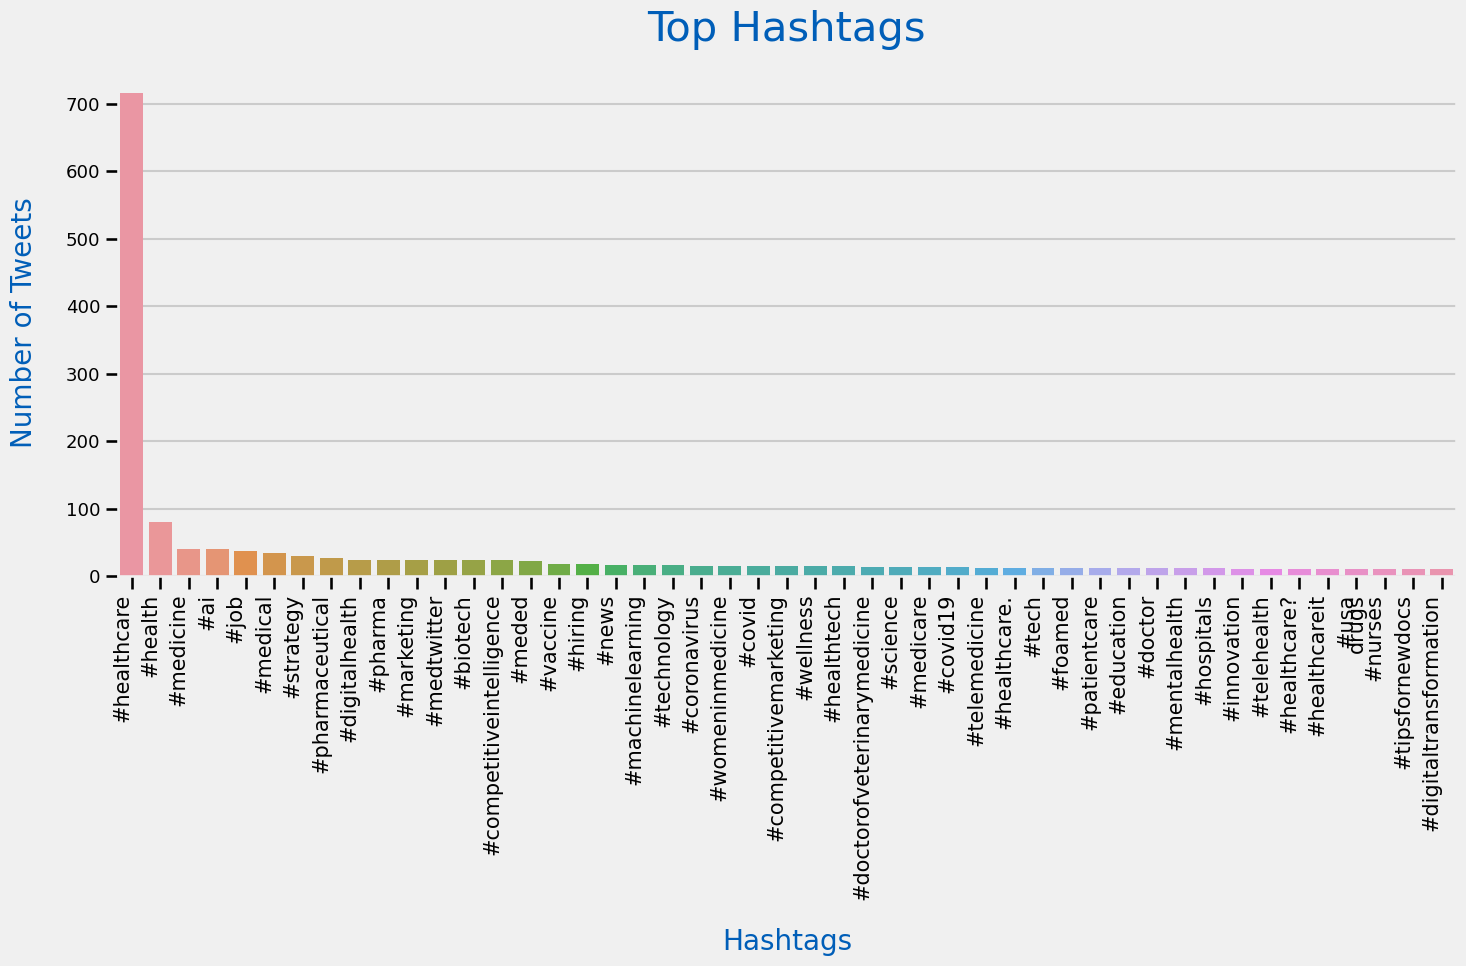

In [192]:
#Subset the data.
hashtags_over_ten = hashtags[hashtags['count'] > 10]

# Visualize the graphic.
plt.figure(figsize = (15,10))
sns.barplot(x = 'word', y = 'count', data = hashtags_over_ten)
plt.title('Top Hashtags', color = '#005EB8', size = 30, pad = 20)
plt.xlabel('Hashtags', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.ylabel('Number of Tweets', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.xticks(rotation = 90, ha='right', size = 15)
plt.yticks(size = 13)
plt.tight_layout()
plt.show()

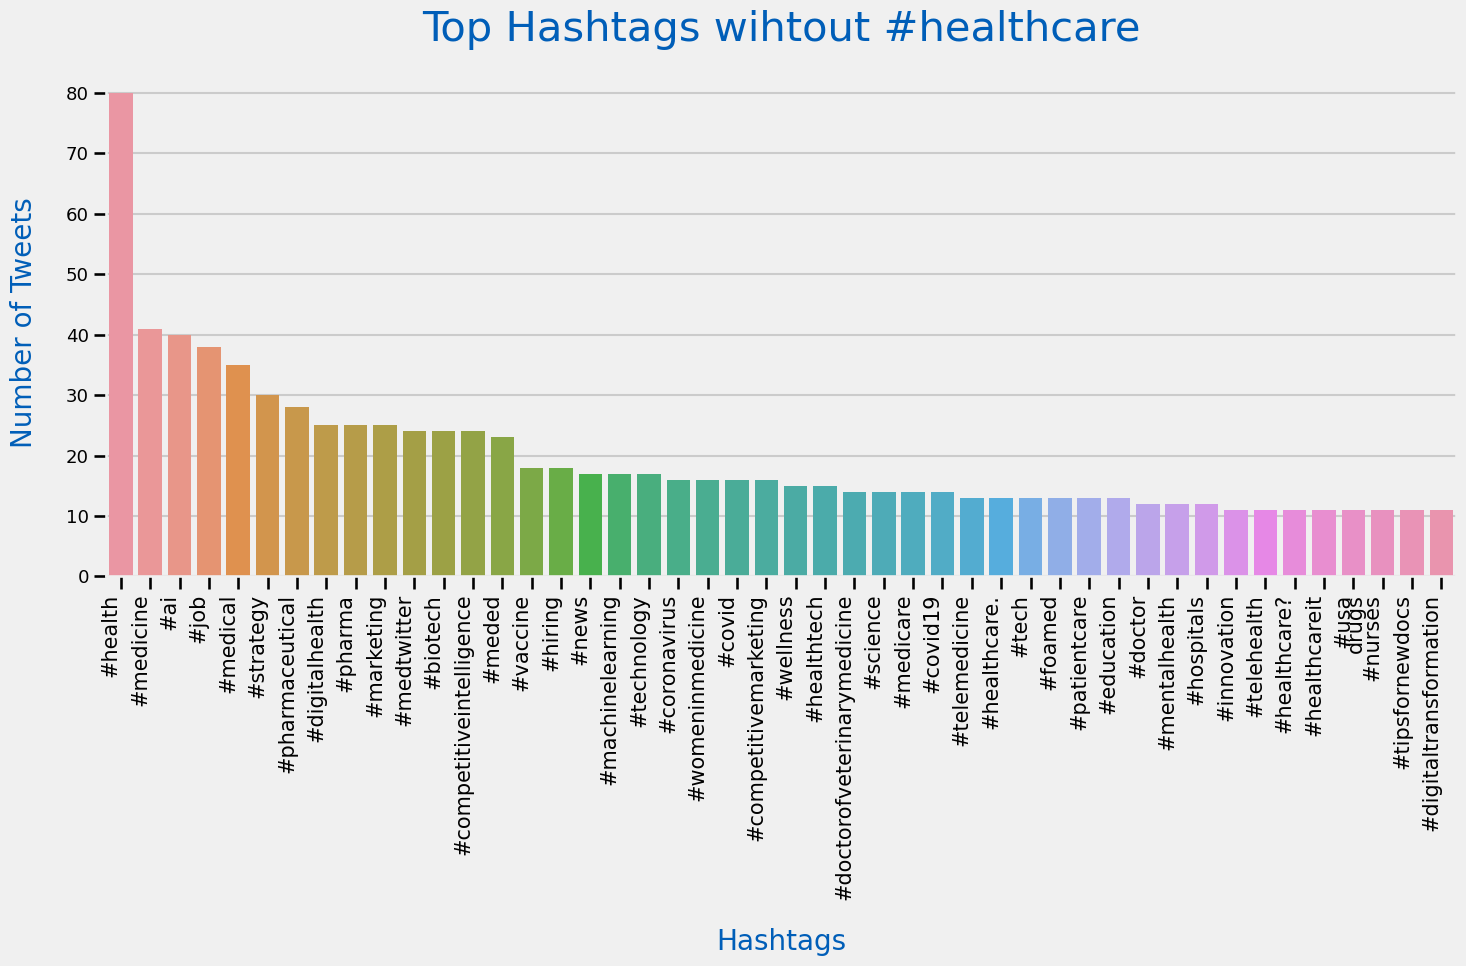

In [193]:
# I want to remove the first hashtag which is clearly above the others.
hashtags_filtered = hashtags_over_ten.drop(0)

# Visualize the graphic.
plt.figure(figsize = (15,10))
sns.barplot(x = 'word', y = 'count', data = hashtags_filtered)
plt.title('Top Hashtags wihtout #healthcare', color = '#005EB8', size = 30, pad = 20)
plt.xlabel('Hashtags', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.ylabel('Number of Tweets', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.xticks(rotation = 90, ha='right', size = 15)
plt.yticks(size = 13)
plt.tight_layout()
plt.show()

In [194]:
# Filter the top 5 hashtags without location.
hashtags_top_5 = hashtags_filtered.head(5)

# Visualize.
hashtags_top_5 

word  count
1    #health     80
2  #medicine     41
3        #ai     40
4       #job     38
5   #medical     35

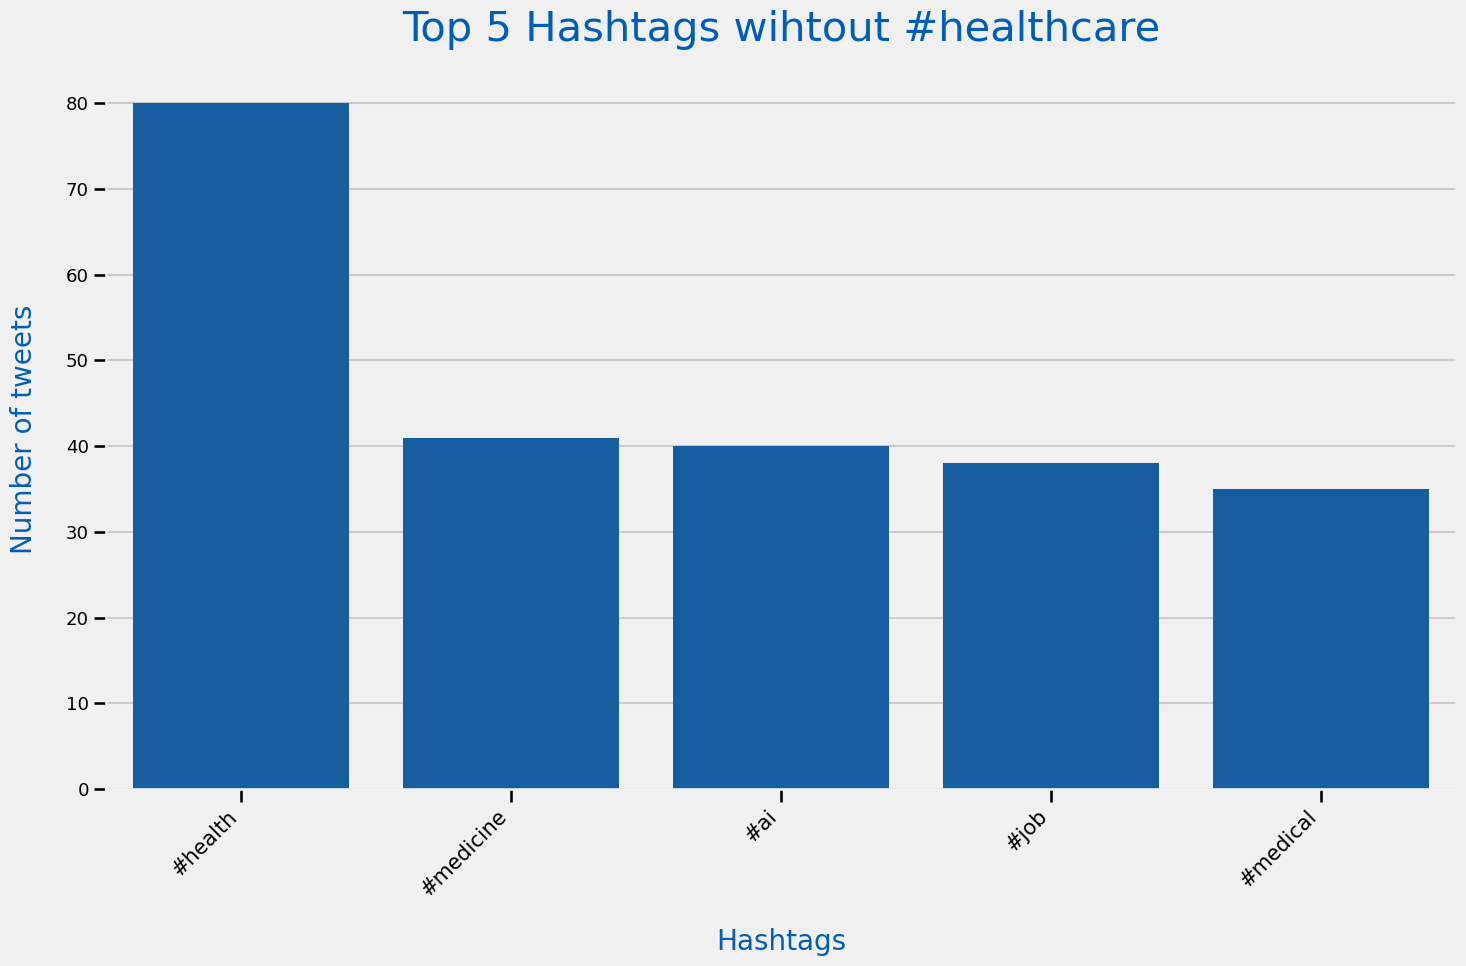

In [195]:
# Visualize the graphic.
plt.figure(figsize = (15,10))
sns.barplot(x = 'word', y = 'count', data = hashtags_top_5, color = '#005EB8')
plt.title('Top 5 Hashtags wihtout #healthcare', color = '#005EB8', size = 30, pad = 20)
plt.xlabel('Hashtags', color = '#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.ylabel('Number of tweets', color = '#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.xticks(rotation = 45, ha='right', size = 15)
plt.yticks(size = 13)
plt.tight_layout()
plt.show()

<div style="color:#005EB8; font-weight:bold;">
    
## Regional analysis
    
</div>

**Regional DataFrame to be used as a reference**

I am going to create a table with region_ons_code, region_code, region_name, and icb_ons_code to use as a future reference to merge DataFrames.

In [196]:
# Visualize NHS regions again.
nr

region_ons_code region_code               region_name
0       E40000003         Y56                    London
1       E40000005         Y59                South East
2       E40000006         Y58                South West
3       E40000007         Y61           East of England
4       E40000010         Y62                North West
5       E40000011         Y60                  Midlands
6       E40000012         Y63  North East and Yorkshire

In [197]:
# Subset ad with the columns desired.
ad_subset = ad[['icb_ons_code', 'region_ons_code']]

# Visualize.
print(ad_subset.head())
print(ad_subset.shape)

  icb_ons_code region_ons_code
0    E54000050       E40000012
1    E54000050       E40000012
2    E54000050       E40000012
3    E54000050       E40000012
4    E54000050       E40000012
(137793, 2)


In [198]:
# Removing duplicates will turn icb_ons_code unique.
ad_icb_unique = ad_subset.drop_duplicates()

# Visualize.
print(ad_icb_unique.head())
print(ad_icb_unique.shape)

      icb_ons_code region_ons_code
0        E54000050       E40000012
3383     E54000048       E40000010
5729     E54000057       E40000010
14595    E54000008       E40000010
32345    E54000061       E40000012
(42, 2)


In [199]:
ad_icb_unique.nunique()

icb_ons_code       42
region_ons_code     7
dtype: int64

We saw previously that there were 7 regions and 42 icb ons codes so it looks correct.

<span style="color: #808080; font-style: italic;">Creating the reference DataFrame</span>

In [200]:
# Merge datasets.
regions = pd.merge(ad_icb_unique, nr, on = 'region_ons_code', how = 'left')

# Visualize.
regions

icb_ons_code region_ons_code region_code               region_name
0     E54000050       E40000012         Y63  North East and Yorkshire
1     E54000048       E40000010         Y62                North West
2     E54000057       E40000010         Y62                North West
3     E54000008       E40000010         Y62                North West
4     E54000061       E40000012         Y63  North East and Yorkshire
5     E54000060       E40000011         Y60                  Midlands
6     E54000054       E40000012         Y63  North East and Yorkshire
7     E54000051       E40000012         Y63  North East and Yorkshire
8     E54000015       E40000011         Y60                  Midlands
9     E54000010       E40000011         Y60                  Midlands
10    E54000056       E40000007         Y61           East of England
11    E54000025       E40000007         Y61           East of England
12    E54000023       E40000007         Y61           East of England
13    E54000026       E40000007         Y61           East of England
14    E54000053       E40000005         Y59                South East
15    E54000044       E40000005         Y59                South East
16    E54000042       E40000005         Y59                South East
17    E54000041       E40000006         Y58                South West
18    E54000043       E40000006         Y58                South West
19    E54000036       E40000006         Y58                South West
20    E54000038       E40000006         Y58                South West
21    E54000039       E40000006         Y58                South West
22    E54000055       E40000011         Y60                  Midlands
23    E54000058       E40000011         Y60                  Midlands
24    E54000037       E40000006         Y58                South West
25    E54000019       E40000011         Y60                  Midlands
26    E54000022       E40000007         Y61           East of England
27    E54000031       E40000003         Y56                    London
28    E54000013       E40000011         Y60                  Midlands
29    E54000030       E40000003         Y56                    London
30    E54000059       E40000011         Y60                  Midlands
31    E54000032       E40000005         Y59                South East
32    E54000052       E40000005         Y59                South East
33    E54000040       E40000006         Y58                South West
34    E54000028       E40000003         Y56                    London
35    E54000029       E40000003         Y56                    London
36    E54000018       E40000011         Y60                  Midlands
37    E54000062       E40000011         Y60                  Midlands
38    E54000034       E40000005         Y59                South East
39    E54000024       E40000007         Y61           East of England
40    E54000011       E40000011         Y60                  Midlands
41    E54000027       E40000003         Y56                    London

In [201]:
# Check the size of the DataFrame.
regions.shape

(42, 4)

**Appointments by region and month**

In [202]:
# Subset nc data.
nc_regions_month = nc.groupby(['appointment_month', 'icb_ons_code'])\
                              ['count_of_appointments'].sum().reset_index()

# Merge the data.
nc_total_regions = pd.merge(nc_regions_month, regions, on = 'icb_ons_code', how = 'left')

# Visualize.
nc_total_regions.head()

appointment_month icb_ons_code  count_of_appointments region_ons_code  \
0           2021-08    E54000008                1064804       E40000010   
1           2021-08    E54000010                 429720       E40000011   
2           2021-08    E54000011                 209824       E40000011   
3           2021-08    E54000013                 332627       E40000011   
4           2021-08    E54000015                 507015       E40000011   

  region_code region_name  
0         Y62  North West  
1         Y60    Midlands  
2         Y60    Midlands  
3         Y60    Midlands  
4         Y60    Midlands

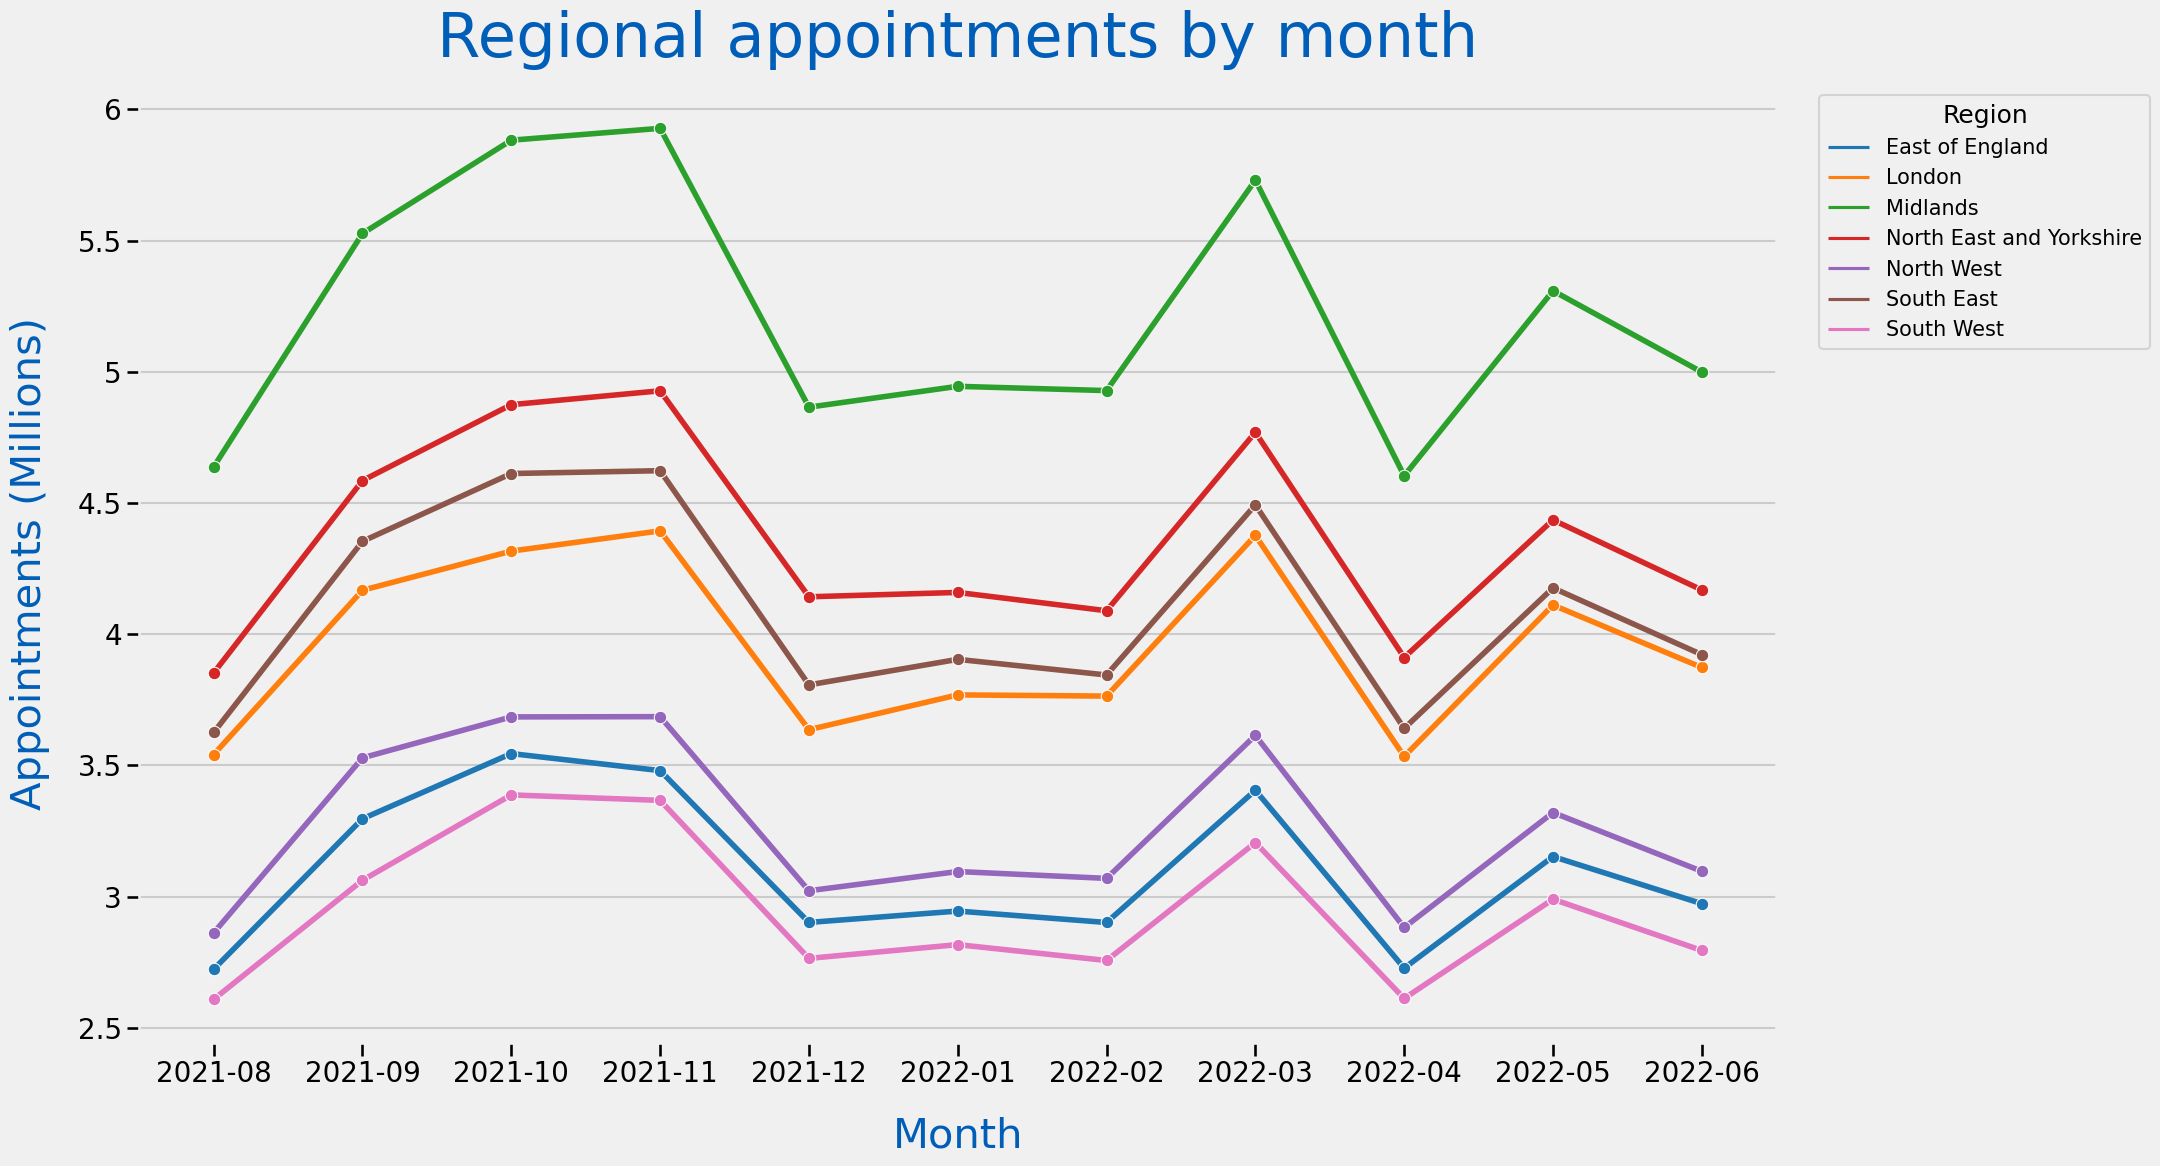

In [203]:
# Select the Data.
nc_regions_month_total = nc_total_regions.groupby(['appointment_month', 'region_name'])\
                         ['count_of_appointments'].sum().reset_index()

# Visualize in a graphic.
plt.figure(figsize = (22,12))
sns.set_palette('tab10')
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = nc_regions_month_total,
             hue = 'region_name', errorbar=None, marker = 'o', linewidth = 4)
plt.title('Regional appointments by month', color = '#005EB8', size = 45, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 30, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 30, ha = 'center', labelpad = 20)
plt.xticks(size = 20)
plt.yticks([2.5e6, 3e6, 3.5e6, 4e6, 4.5e6, 5e6, 5.5e6, 6e6], ['2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6'], size = 20)
plt.grid(axis = 'x')
plt.legend(title = 'Region', fontsize='small', title_fontsize = 'medium', loc = 'best', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

**Appointments by region and day of the week**

In [204]:
# Subset nc data.
nc_regions_day = nc.groupby(['day_of_week', 'icb_ons_code'])\
                            ['count_of_appointments'].sum().reset_index()

# Merge the data.
nc_total_day = pd.merge(nc_regions_day, regions, on = 'icb_ons_code', how = 'left')

# Visualize.
nc_total_day.head()

day_of_week icb_ons_code  count_of_appointments region_ons_code region_code  \
0      Monday    E54000008                2642751       E40000010         Y62   
1      Monday    E54000010                1093044       E40000011         Y60   
2      Monday    E54000011                 524684       E40000011         Y60   
3      Monday    E54000013                 864834       E40000011         Y60   
4      Monday    E54000015                1264814       E40000011         Y60   

  region_name  
0  North West  
1    Midlands  
2    Midlands  
3    Midlands  
4    Midlands

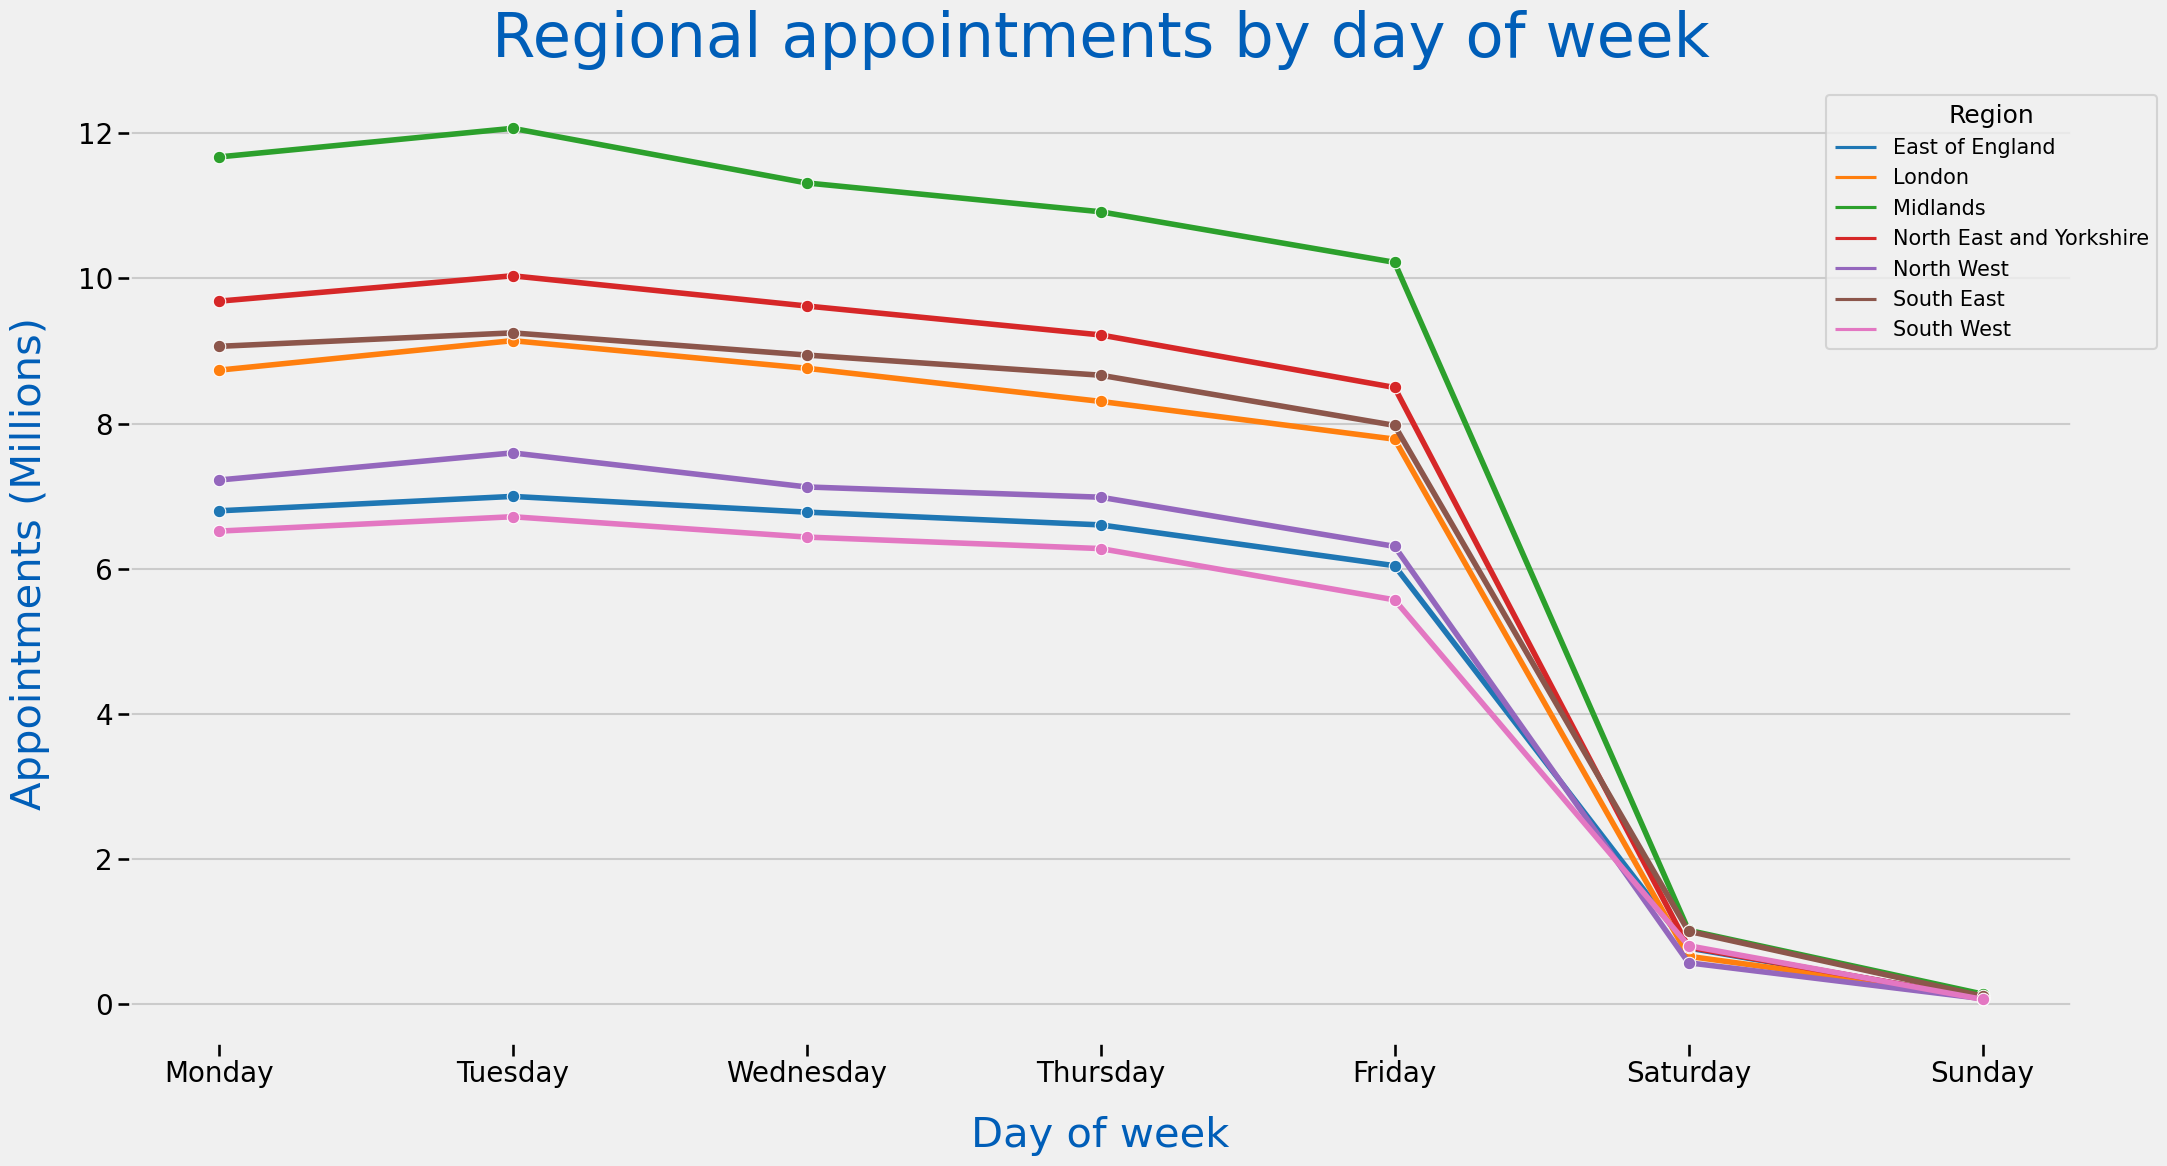

In [205]:
# Select the Data.
nc_regions_day_week = nc_total_day.groupby(['day_of_week', 'region_name'])\
                         ['count_of_appointments'].sum().reset_index()

# Visualize in a graphic.
plt.figure(figsize = (22,12))
sns.set_palette('tab10')
sns.lineplot(x = 'day_of_week', y = 'count_of_appointments', data = nc_regions_day_week,
             hue = 'region_name', errorbar=None, marker = 'o', linewidth = 4)
plt.title('Regional appointments by day of week', color = '#005EB8', size = 45, pad = 20)
plt.xlabel('Day of week', color='#005EB8', size = 30, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 30, ha = 'center', labelpad = 20)
plt.xticks(size = 20)
plt.yticks([0, 0.2e7, 0.4e7, 0.6e7, 0.8e7, 1e7, 1.2e7], ['0', '2', '4', '6', '8', '10', '12'], size = 20)
plt.grid(axis = 'x')
plt.legend(title = 'Region', fontsize = 'small', title_fontsize = 'medium', loc = 'best', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

**Region and service settings**

In [206]:
# Subset nc data.
nc_regions_ss = nc.groupby(['service_setting', 'icb_ons_code'])\
                           ['count_of_appointments'].sum().reset_index()

# Merge the data.
nc_ss_regional = pd.merge(nc_regions_ss, regions, on = 'icb_ons_code', how = 'left')

# Visualize.
nc_ss_regional.head()

service_setting icb_ons_code  count_of_appointments  \
0  Extended Access Provision    E54000008                  77697   
1  Extended Access Provision    E54000010                  40370   
2  Extended Access Provision    E54000011                  17848   
3  Extended Access Provision    E54000013                  40185   
4  Extended Access Provision    E54000015                  45987   

  region_ons_code region_code region_name  
0       E40000010         Y62  North West  
1       E40000011         Y60    Midlands  
2       E40000011         Y60    Midlands  
3       E40000011         Y60    Midlands  
4       E40000011         Y60    Midlands

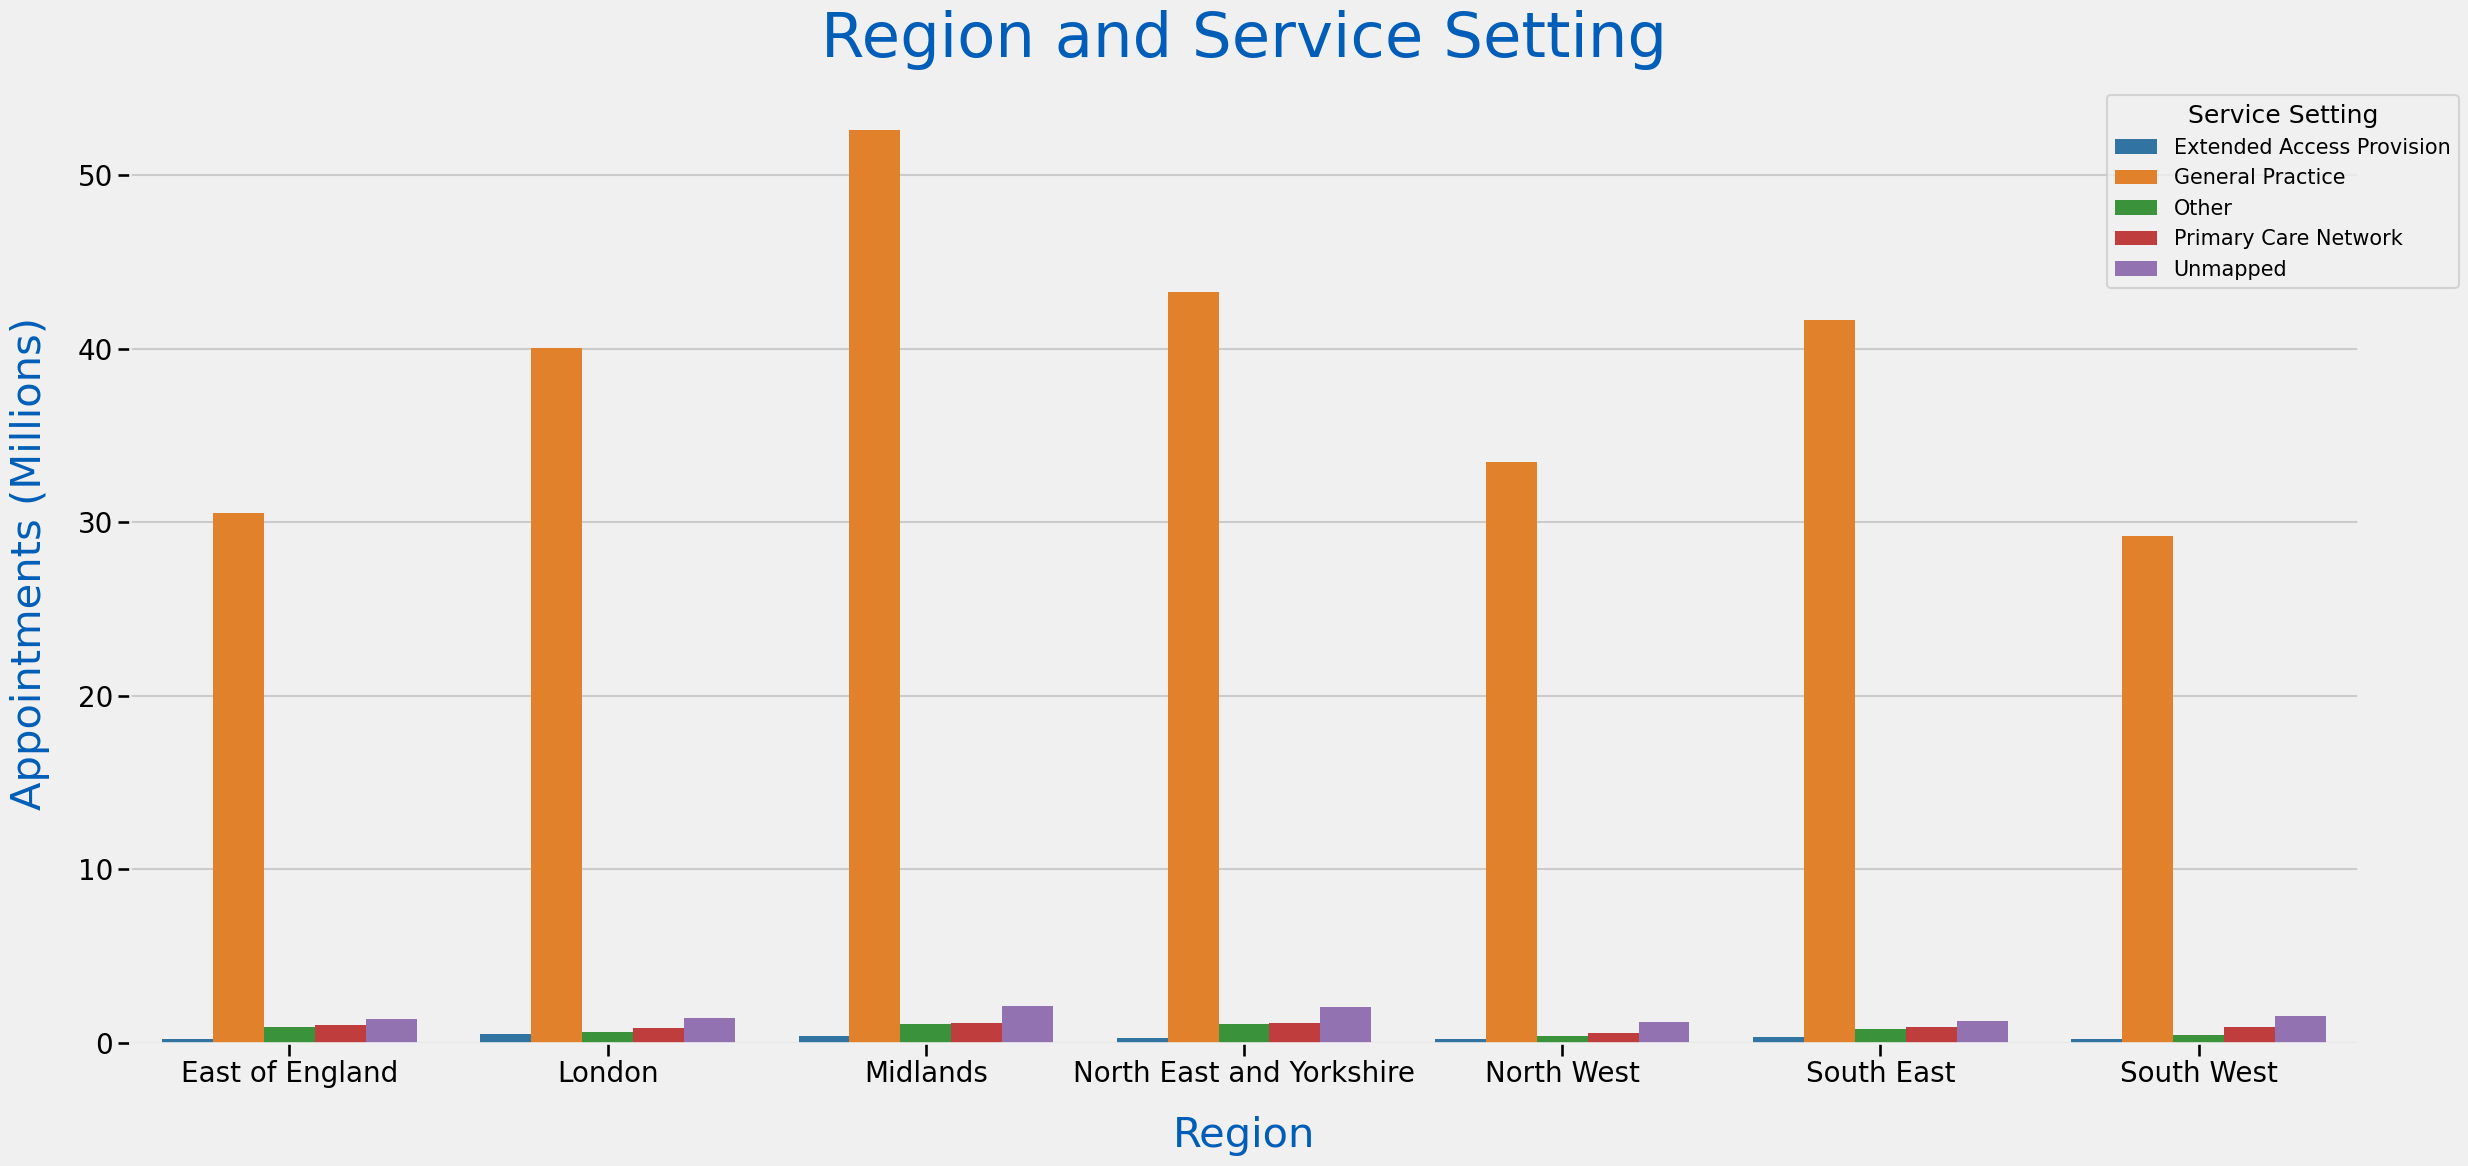

In [207]:
# Select the data.
nc_regions_service = nc_ss_regional.groupby(['service_setting', 'region_name'])\
                         ['count_of_appointments'].sum().reset_index()

# Visualize in a graphic.
plt.figure(figsize = (25,12))
sns.barplot(x = 'region_name', y = 'count_of_appointments', data = nc_regions_service, hue = 'service_setting')
plt.title('Region and Service Setting', color = '#005EB8', size = 45, pad = 20)
plt.xlabel('Region', color='#005EB8', size = 30, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 30, ha = 'center', labelpad = 20)
plt.xticks(size = 20)
plt.yticks([0, 1e7, 2e7, 3e7, 4e7, 5e7], ['0', '10', '20', '30', '40', '50'], size = 20)
plt.legend(title = 'Service Setting', fontsize='small', title_fontsize = 'medium', loc = 'best', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

<div style="color:#005EB8; font-weight:bold;">
    
## Staff Analysis
    
</div>

In [208]:
ns.head(10)

region_ons_code      month  doctors
0             Y56 2021-12-01     5384
1             Y58 2021-12-01     3731
2             Y59 2021-12-01     4984
3             Y60 2021-12-01     7055
4             Y61 2021-12-01     3794
5             Y62 2021-12-01     4823
6             Y63 2021-12-01     5487
7             Y56 2022-01-01     5334
8             Y58 2022-01-01     3704
9             Y59 2022-01-01     4956

**Total doctors by month**

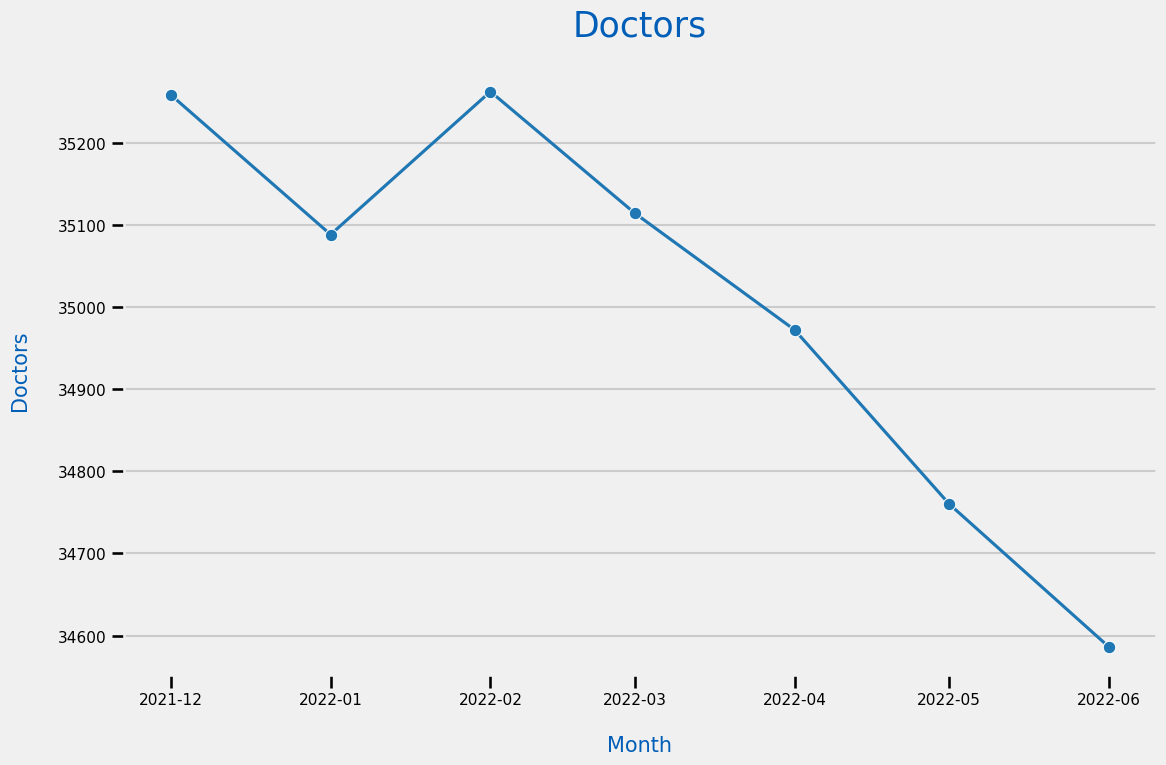

In [209]:
# Subset the data.
ns_doctors = ns.groupby('month')['doctors'].sum().reset_index()

# Visualize in a graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'month', y = 'doctors', data = ns_doctors, errorbar = None, marker = 'o')
plt.title('Doctors', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Doctors', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(ticks = ns_doctors['month'], labels = ns_doctors['month'].dt.strftime('%Y-%m'), size = 11)
plt.yticks(size = 11)
plt.grid(axis = 'x')
plt.tight_layout()
plt.savefig('slide9.jpeg')
plt.show()

**Monthly growth**

In [210]:
# Group the data.
ns_grouped = ns.groupby('month')['doctors'].sum().reset_index()

# Pass month to string.
ns_grouped['month'] = ns_grouped['month'].dt.strftime('%Y-%m')

# Visualize.
ns_grouped

month  doctors
0  2021-12    35258
1  2022-01    35088
2  2022-02    35262
3  2022-03    35114
4  2022-04    34972
5  2022-05    34760
6  2022-06    34586

In [211]:
# Calculate the growth for several periods.
growth_january = calculate_growth_monthly(current_period = '2022-01', previous_period = '2021-12', df2 = ns_grouped, 
                                           time_column = 'month', value_column = 'doctors')
growth_february = calculate_growth_monthly(current_period = '2022-02', previous_period = '2022-01', df2 = ns_grouped, 
                                           time_column = 'month', value_column = 'doctors')
growth_march = calculate_growth_monthly(current_period = '2022-03', previous_period = '2022-02', df2 = ns_grouped, 
                                           time_column = 'month', value_column = 'doctors')
growth_april = calculate_growth_monthly(current_period = '2022-04', previous_period = '2022-03', df2 = ns_grouped, 
                                           time_column = 'month', value_column = 'doctors')
growth_may = calculate_growth_monthly(current_period = '2022-05', previous_period = '2022-04', df2 = ns_grouped, 
                                           time_column = 'month', value_column = 'doctors')
growth_june = calculate_growth_monthly(current_period = '2022-06', previous_period = '2022-05', df2 = ns_grouped, 
                                           time_column = 'month', value_column = 'doctors')
growth_period = calculate_growth_monthly(current_period = '2022-06', previous_period = '2021-12', df2 = ns_grouped, 
                                           time_column = 'month', value_column = 'doctors')

In [212]:
# Display results.
print("Monthly growth of doctors in January 2022 -", growth_january, "%")
print("Monthly growth of doctors in February 2022 -", growth_february, "%")
print("Monthly growth of doctors in March 2022 -", growth_march, "%")
print("Monthly growth of doctors in April 2022 -", growth_april, "%")
print("Monthly growth of doctors in May 2022 -", growth_may, "%")
print("Monthly growth of doctors in June 2022 -", growth_june, "%")
print("Growth of doctors from December 2021 till June 2022  -", growth_period, "%")

Monthly growth of doctors in January 2022 - -0.48 %
Monthly growth of doctors in February 2022 - 0.5 %
Monthly growth of doctors in March 2022 - -0.42 %
Monthly growth of doctors in April 2022 - -0.4 %
Monthly growth of doctors in May 2022 - -0.61 %
Monthly growth of doctors in June 2022 - -0.5 %
Growth of doctors from December 2021 till June 2022  - -1.91 %


**Total doctors by region**

In [213]:
# Rename the column in ns to match.
ns.rename(columns = {'region_ons_code': 'region_code'}, inplace = True)

# Create a new merged DataFrame.
doctors_region = pd.merge(ns, nr, on = 'region_code', how = 'left')

# Visualize.
doctors_region.head()

region_code      month  doctors region_ons_code      region_name
0         Y56 2021-12-01     5384       E40000003           London
1         Y58 2021-12-01     3731       E40000006       South West
2         Y59 2021-12-01     4984       E40000005       South East
3         Y60 2021-12-01     7055       E40000011         Midlands
4         Y61 2021-12-01     3794       E40000007  East of England

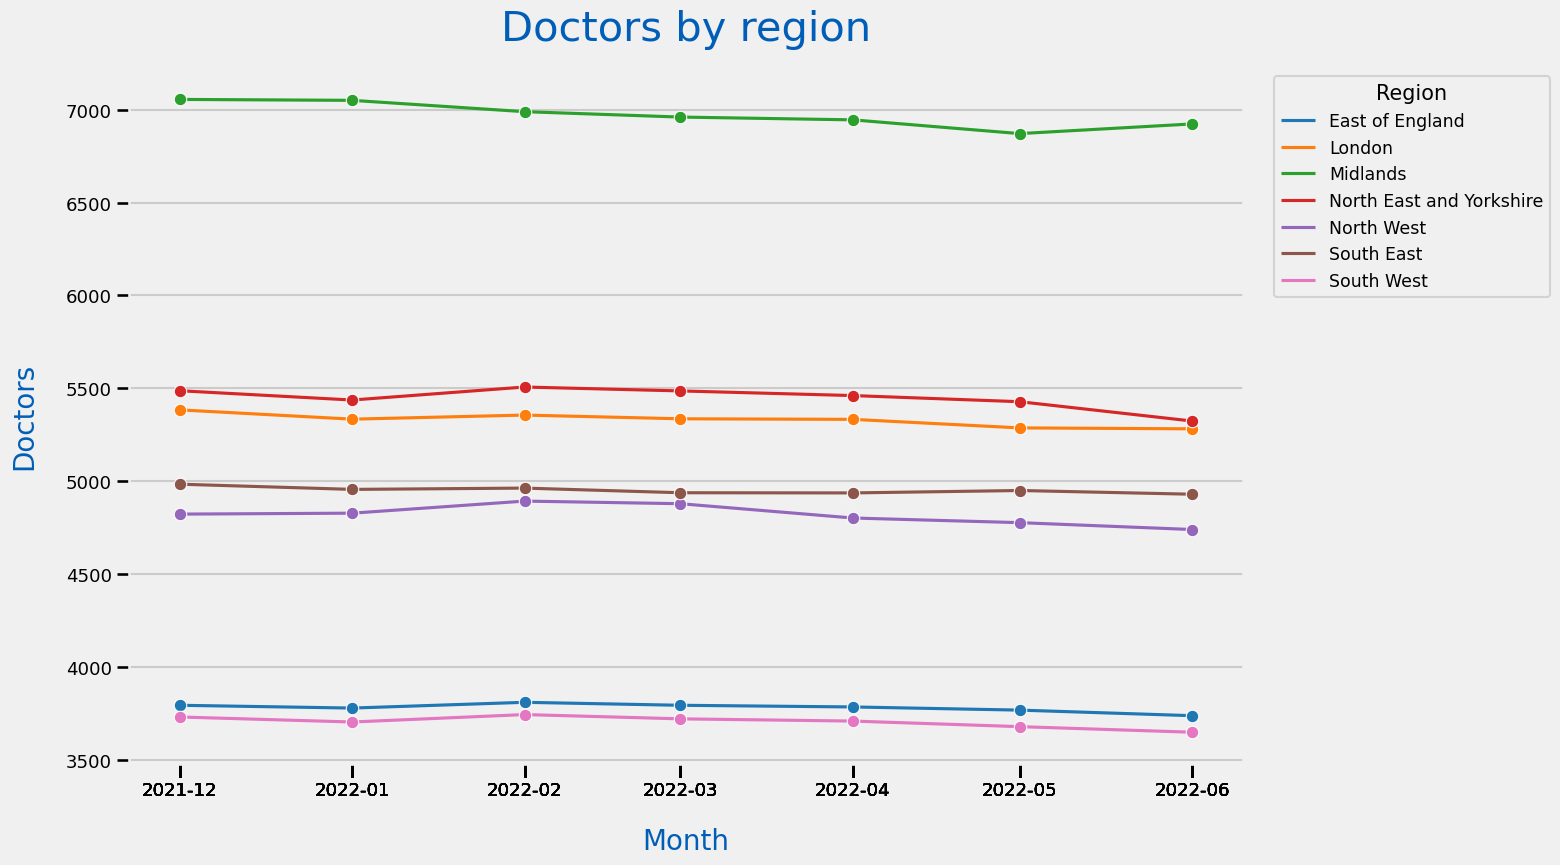

In [214]:
# Subset the Data.
doctors_region_subset = doctors_region.groupby(['month', 'region_name'])['doctors'].sum().reset_index()

#Visualize in a graphic.
plt.figure(figsize = (16,9))
sns.set_palette('tab10')
sns.lineplot(x = 'month', y = 'doctors', data = doctors_region_subset, hue = 'region_name', errorbar = None, marker = 'o')
plt.title('Doctors by region', color = '#005EB8', size = 30, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.ylabel('Doctors', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.xticks(ticks = doctors_region_subset['month'], labels = doctors_region_subset['month'].dt.strftime('%Y-%m'), size = 13)
plt.yticks(size = 13)
plt.grid(axis='x')
plt.legend(title = 'Region', fontsize = 'x-small', title_fontsize = 'small', loc = 'best', bbox_to_anchor = (1.02, 1))
plt.tight_layout()
plt.show()

**Appointments by doctor metric**

I will create a metric of the number of appointments by doctor just to understand how that is evolving and how to compare by region.

In [215]:
# Subset nc with relevant columns.
nc_subset2 = nc.groupby(['appointment_month', 'icb_ons_code'])['count_of_appointments'].sum().reset_index()

# Visualize.
nc_subset2.head()

appointment_month icb_ons_code  count_of_appointments
0           2021-08    E54000008                1064804
1           2021-08    E54000010                 429720
2           2021-08    E54000011                 209824
3           2021-08    E54000013                 332627
4           2021-08    E54000015                 507015

In [216]:
# Merge DataFrames.
ns_df = pd.merge(ns, regions, on = 'region_code', how = 'left')

# Rename the column in dr_subset to match.
ns_df.rename(columns = {'month': 'appointment_month'}, inplace = True)

# Chane datatype of appointment_month.
ns_df['appointment_month'] = ns_df['appointment_month'].dt.strftime('%Y-%m')

# Visualize.
ns_df.head()

region_code appointment_month  doctors icb_ons_code region_ons_code  \
0         Y56           2021-12     5384    E54000031       E40000003   
1         Y56           2021-12     5384    E54000030       E40000003   
2         Y56           2021-12     5384    E54000028       E40000003   
3         Y56           2021-12     5384    E54000029       E40000003   
4         Y56           2021-12     5384    E54000027       E40000003   

  region_name  
0      London  
1      London  
2      London  
3      London  
4      London

In [217]:
# Merge the data.
merge_nc_dr = pd.merge(nc_subset2, ns_df, on = ['icb_ons_code', 'appointment_month'], how = 'inner')

# Visualize.
merge_nc_dr.head()

appointment_month icb_ons_code  count_of_appointments region_code  doctors  \
0           2021-12    E54000008                1112173         Y62     4823   
1           2021-12    E54000010                 451060         Y60     7055   
2           2021-12    E54000011                 217784         Y60     7055   
3           2021-12    E54000013                 370170         Y60     7055   
4           2021-12    E54000015                 532587         Y60     7055   

  region_ons_code region_name  
0       E40000010  North West  
1       E40000011    Midlands  
2       E40000011    Midlands  
3       E40000011    Midlands  
4       E40000011    Midlands

In [218]:
# Subset the data with the required columns (no need to do any calculation in the number of doctors).
df_app_dr = merge_nc_dr.groupby(['appointment_month', 'region_name', 'doctors'])['count_of_appointments'].sum().reset_index()

# Visualize.
df_app_dr.head()

appointment_month               region_name  doctors  count_of_appointments
0           2021-12           East of England     3794                2901948
1           2021-12                    London     5384                3636396
2           2021-12                  Midlands     7055                4865026
3           2021-12  North East and Yorkshire     5487                4142649
4           2021-12                North West     4823                3022765

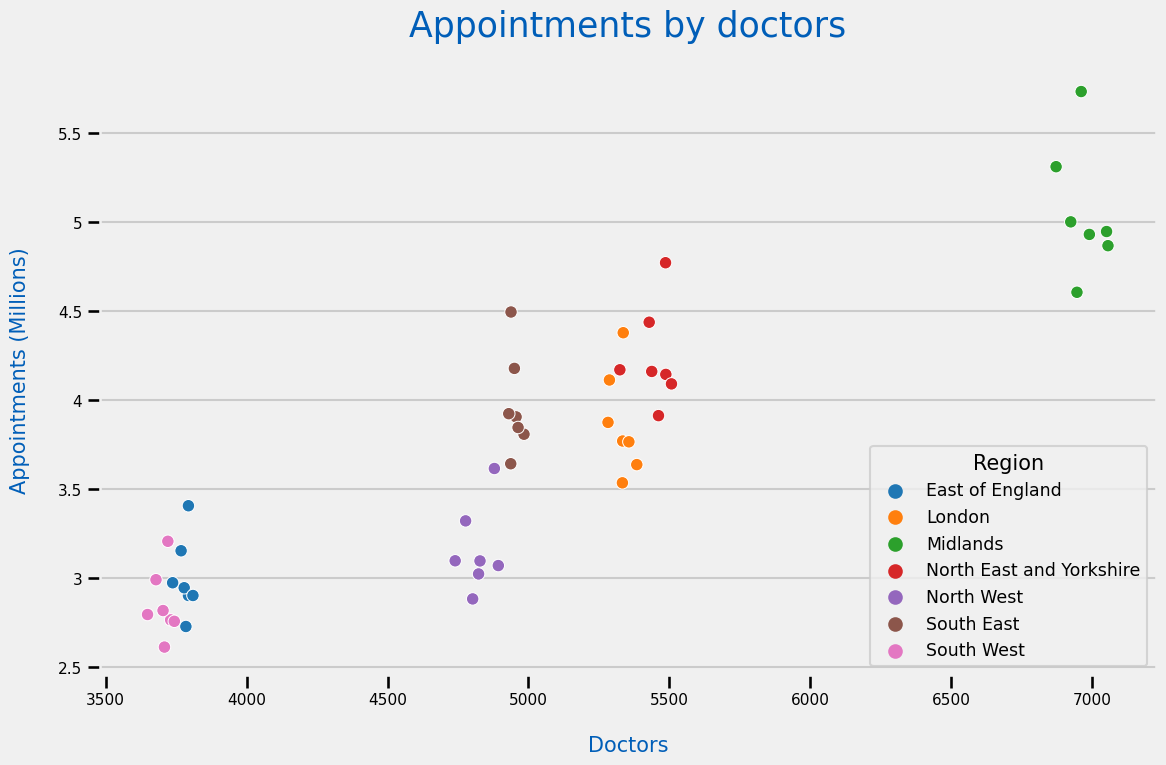

In [219]:
# Visualize in a graph.
plt.figure(figsize = (12,8))
sns.set_palette('tab10')
sns.scatterplot(x = 'doctors', y = 'count_of_appointments', data = df_app_dr, hue = 'region_name')
plt.title('Appointments by doctors', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Doctors', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks([2.5e6, 3e6, 3.5e6, 4e6, 4.5e6, 5e6, 5.5e6], ['2.5', '3', '3.5', '4', '4.5', '5', '5.5'], size = 11)
plt.grid(axis = 'x')
plt.legend(title = 'Region', fontsize = 'x-small', title_fontsize = 'small', loc = 'lower right')
plt.tight_layout()
plt.show()

<span style="color: #808080; font-style: italic;">Appointments by doctor per month</span>


In [220]:
# Subset the data.
app_dr_month = df_app_dr.groupby('appointment_month')[['count_of_appointments', 'doctors']].sum().reset_index()

# Create the metric.
app_dr_month['app_doctors'] = metric(app_dr_month['count_of_appointments'], app_dr_month['doctors'])

# Visualize.
app_dr_month.head()

appointment_month  count_of_appointments  doctors  app_doctors
0           2021-12               25140776    35258        713.1
1           2022-01               25635474    35088        730.6
2           2022-02               25355260    35262        719.1
3           2022-03               29595038    35114        842.8
4           2022-04               23913060    34972        683.8

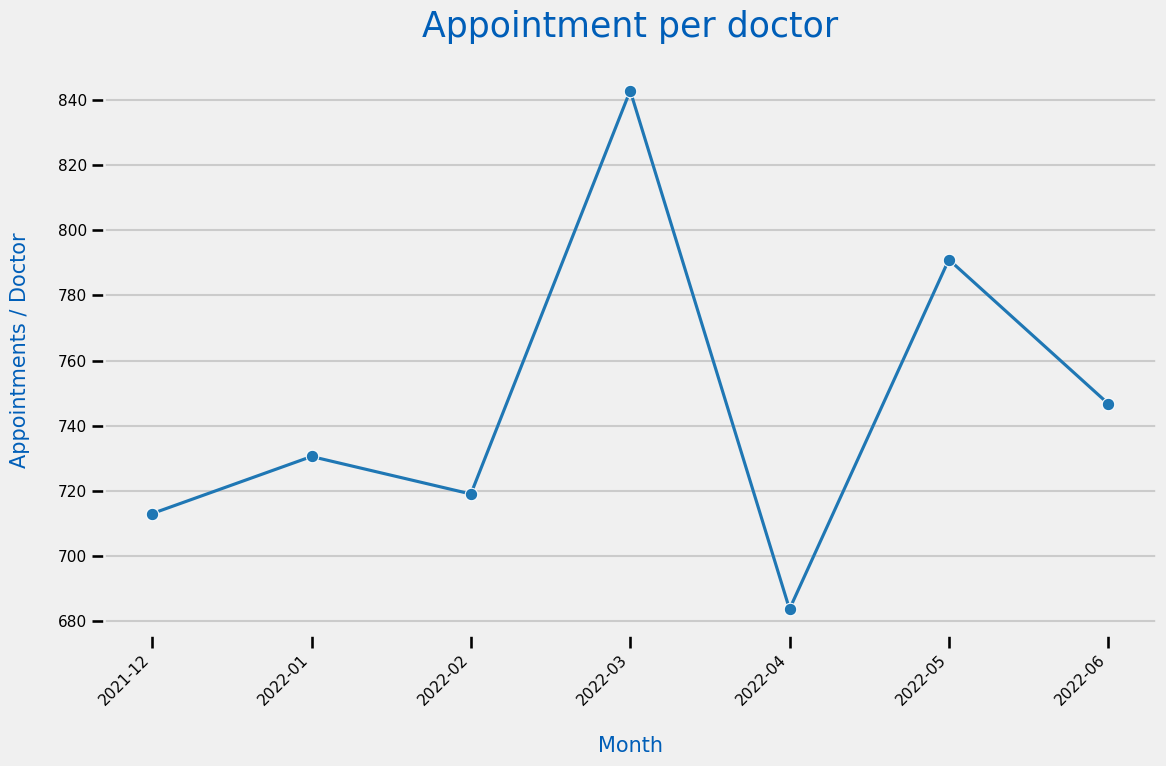

In [221]:
#Visualize in a graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'app_doctors', data = app_dr_month, errorbar = None, marker = 'o')
plt.title('Appointment per doctor', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments / Doctor', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(rotation = 45, ha = 'right', size = 11)
plt.yticks(size = 11)
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

<span style="color: #808080; font-style: italic;">Appointments by doctor by region per month</span>


In [222]:
# Create the metric.
df_app_dr['app_doctors'] = metric(df_app_dr['count_of_appointments'], df_app_dr['doctors'])

# Visualize.
df_app_dr.head()

appointment_month               region_name  doctors  count_of_appointments  \
0           2021-12           East of England     3794                2901948   
1           2021-12                    London     5384                3636396   
2           2021-12                  Midlands     7055                4865026   
3           2021-12  North East and Yorkshire     5487                4142649   
4           2021-12                North West     4823                3022765   

   app_doctors  
0        764.9  
1        675.4  
2        689.6  
3        755.0  
4        626.7

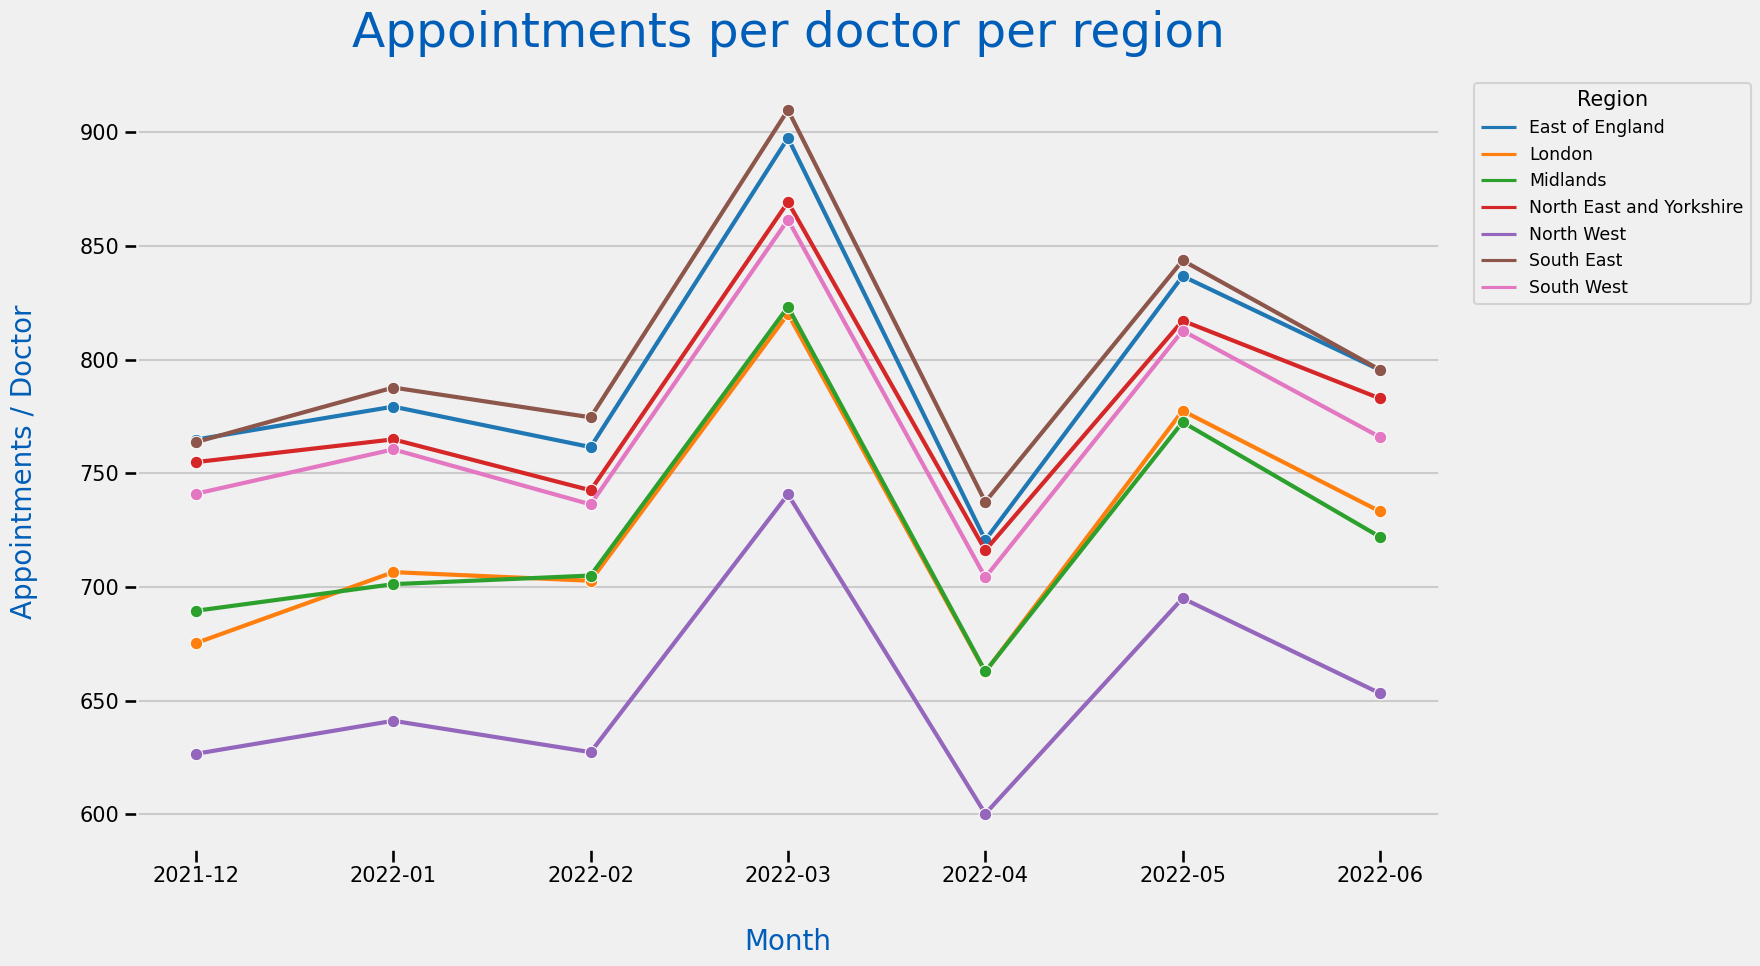

In [223]:
#Visualize in a graphic.
plt.figure(figsize = (18,10))
sns.set_palette('tab10')
sns.lineplot(x = 'appointment_month', y = 'app_doctors', data = df_app_dr, hue = 'region_name',
             errorbar = None, marker = 'o', linewidth = 3)
plt.title('Appointments per doctor per region', color = '#005EB8', size = 35, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 20, ha = 'center', labelpad = 30)
plt.ylabel('Appointments / Doctor', color='#005EB8', size = 20, ha = 'center', labelpad = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid(axis = 'x')
plt.legend(title = 'Region', fontsize = 'x-small', title_fontsize = 'small', loc = 'best', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig('slide10.jpeg')
plt.show()

<div style="color:#005EB8; font-weight:bold;">
    
## Missed appointments
    
</div>

**Total missed appointments**

Check with the full DataFrame of Appointments Regional.

In [224]:
# let's exclude Unkonw and just check if appointments are attended or not.
ar_check = ar[ar['appointment_status'].isin(['Attended', 'DNA'])]

In [225]:
# Filter with relevant columns.
ar_missed = ar_check.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

# Visualize.
ar_missed.head()

appointment_month appointment_status  count_of_appointments
0        2020-01-01           Attended               24538291
1        2020-01-01                DNA                1298269
2        2020-02-01           Attended               21640067
3        2020-02-01                DNA                1215154
4        2020-03-01           Attended               20718865

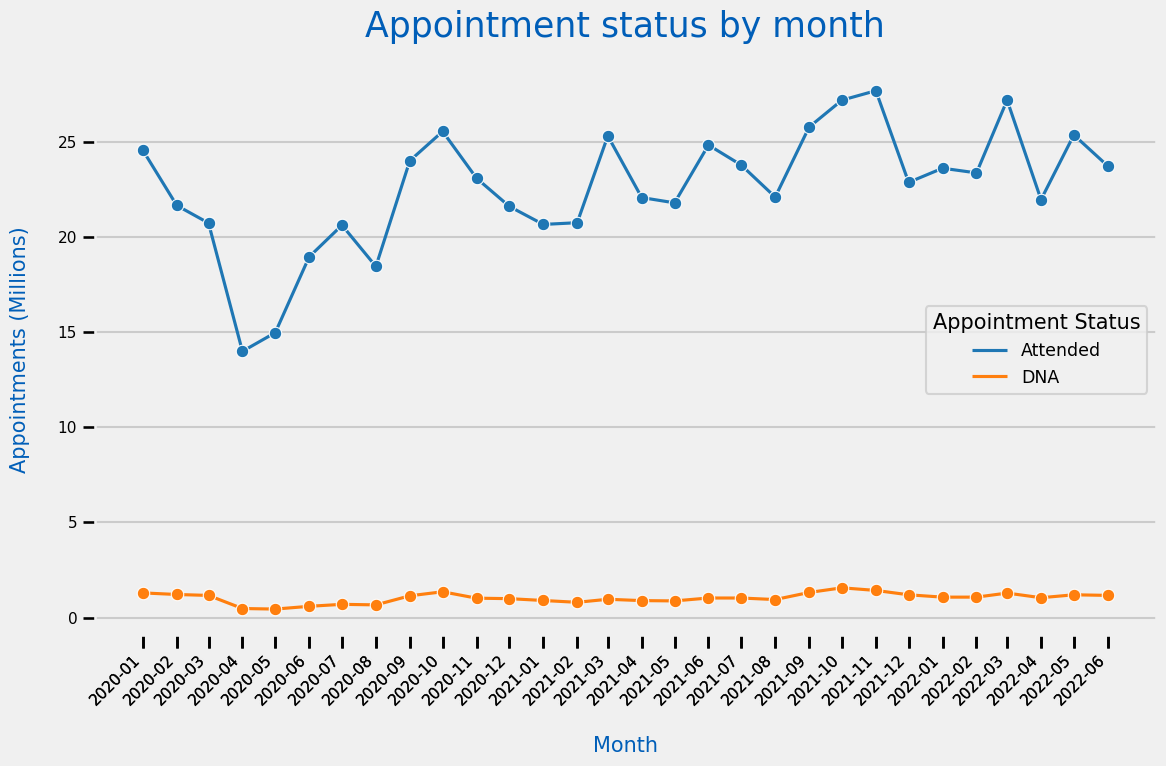

In [226]:
# Visualize the graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = ar_missed, hue = 'appointment_status', errorbar = None, marker = 'o')
plt.title('Appointment status by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(ticks = ar_missed['appointment_month'], labels = ar_missed['appointment_month'].dt.strftime('%Y-%m'),
           rotation = 45, ha = 'right', size = 11)
plt.yticks([0, 0.5e7, 1e7, 1.5e7, 2e7, 2.5e7], ['0', '5', '10', '15', '20', '25'],size = 11)
plt.grid(axis='x')
plt.legend(title='Appointment Status', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.tight_layout()
plt.show()

**Share of missed appointments**

In [227]:
# Pivot DataFrame to have appointment_status as separate columns.
status_missed_pivot = ar_missed.pivot(index = 'appointment_month', columns ='appointment_status', values = 'count_of_appointments').reset_index()

# Visualize.
status_missed_pivot.head()

appointment_status appointment_month  Attended      DNA
0                         2020-01-01  24538291  1298269
1                         2020-02-01  21640067  1215154
2                         2020-03-01  20718865  1166314
3                         2020-04-01  13982824   478766
4                         2020-05-01  14962850   449057

In [228]:
# Calculate percentages
status_missed_pivot['Attended_share'] = ((status_missed_pivot['Attended'] /\
                                          (status_missed_pivot['Attended'] + status_missed_pivot['DNA'])) * 100).round(2)
status_missed_pivot['DNA_share'] = ((status_missed_pivot['DNA'] /\
                                          (status_missed_pivot['Attended'] + status_missed_pivot['DNA'])) * 100).round(2)

# Visualize.
status_missed_pivot.head()

appointment_status appointment_month  Attended      DNA  Attended_share  \
0                         2020-01-01  24538291  1298269           94.98   
1                         2020-02-01  21640067  1215154           94.68   
2                         2020-03-01  20718865  1166314           94.67   
3                         2020-04-01  13982824   478766           96.69   
4                         2020-05-01  14962850   449057           97.09   

appointment_status  DNA_share  
0                        5.02  
1                        5.32  
2                        5.33  
3                        3.31  
4                        2.91

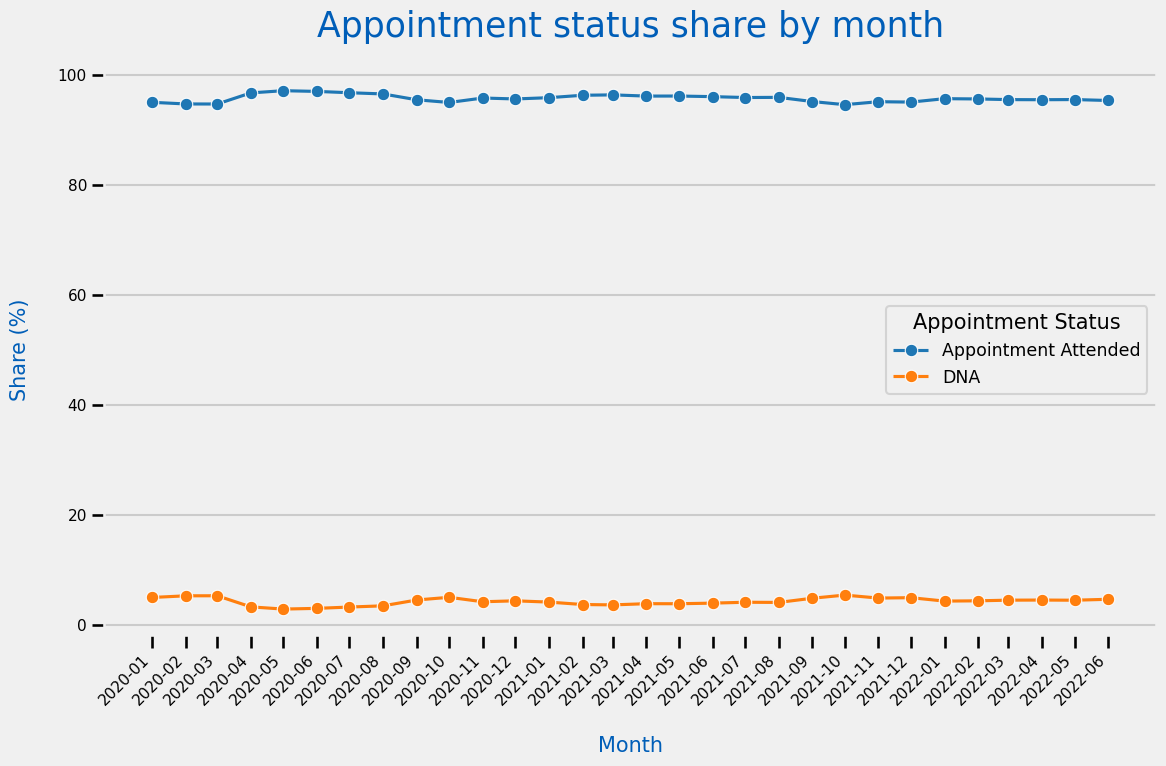

In [229]:
# Visualize the graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'Attended_share', data = status_missed_pivot, marker = 'o', label = 'Appointment Attended')
sns.lineplot(x = 'appointment_month', y = 'DNA_share', data = status_missed_pivot, marker = 'o', label = 'DNA')
plt.title('Appointment status share by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(ticks = status_missed_pivot['appointment_month'], labels = status_missed_pivot['appointment_month'].dt.strftime('%Y-%m'),
           rotation = 45, ha = 'right', size = 11)
plt.yticks(size = 11)
plt.grid(axis='x')
plt.legend(title = 'Appointment Status', fontsize='x-small', title_fontsize = 'small', loc='best')
plt.tight_layout()
plt.show()

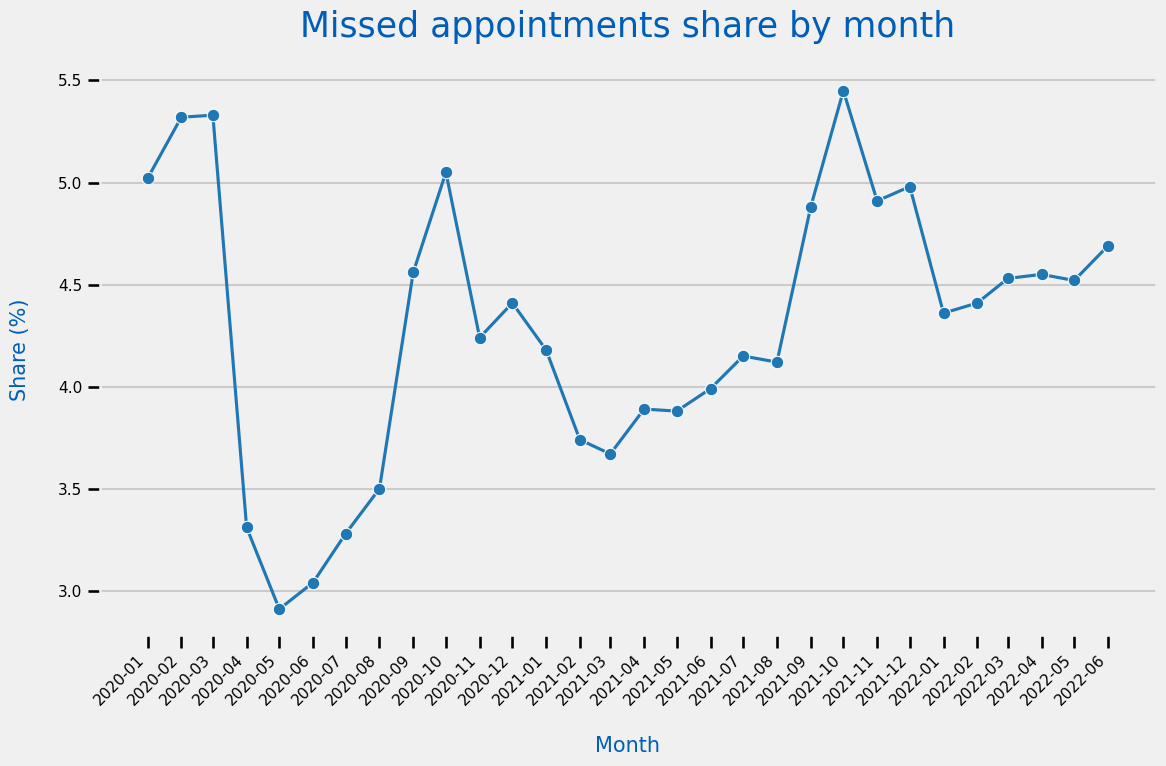

In [230]:
# Visualize the graphic.
plt.figure(figsize = (12,8))
sns.lineplot(x = 'appointment_month', y = 'DNA_share', data = status_missed_pivot, marker = 'o')
plt.title('Missed appointments share by month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(ticks = status_missed_pivot['appointment_month'], labels = status_missed_pivot['appointment_month'].dt.strftime('%Y-%m'),
           rotation = 45, ha = 'right', size = 11)
plt.yticks(size = 11)
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

**Missed appointments by appointment mode**

In [231]:
# Filter with relevant columns.
missed_mode = ar_check.groupby(['appointment_month', 'appointment_status', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Exclude Unknown.
missed_mode = missed_mode[missed_mode['appointment_mode'] != 'Unknown']

# Visualize.
missed_mode.head()

appointment_month appointment_status appointment_mode  count_of_appointments
0        2020-01-01           Attended     Face-to-Face               19571375
1        2020-01-01           Attended       Home Visit                 184531
2        2020-01-01           Attended        Telephone                3459659
4        2020-01-01           Attended     Video/Online                 176501
5        2020-01-01                DNA     Face-to-Face                1145073

In [232]:
# Pivot DataFrame.
missed_mode_pivot = missed_mode.pivot(index = ['appointment_month', 'appointment_mode'], columns = 'appointment_status',
                                        values = 'count_of_appointments').reset_index()

# Visualize.
missed_mode_pivot.head()

appointment_status appointment_month appointment_mode  Attended      DNA
0                         2020-01-01     Face-to-Face  19571375  1145073
1                         2020-01-01       Home Visit    184531     8400
2                         2020-01-01        Telephone   3459659    76872
3                         2020-01-01     Video/Online    176501     8674
4                         2020-02-01     Face-to-Face  17220340  1073765

<span style="color: #808080; font-style: italic;">Appointment mode analysis</span>

In [233]:
# Group by appointment_mode.
mode_grouped = missed_mode_pivot.groupby('appointment_mode')[['Attended', 'DNA']].sum().reset_index()

# Visualize.
mode_grouped

appointment_status appointment_mode   Attended       DNA
0                      Face-to-Face  392705999  24253038
1                        Home Visit    3612068    187571
2                         Telephone  254799226   5262251
3                      Video/Online    3303233    158946

In [234]:
# Calculate shares.
mode_grouped[['Attended', 'DNA']] = mode_grouped[['Attended', 'DNA']].apply(lambda x: x/x.sum(), axis=1)

# Transform shares.
mode_grouped['Attended'] = share(mode_grouped['Attended'])
mode_grouped['DNA'] = share(mode_grouped['DNA'])

# Visualize.
mode_grouped.head()

appointment_status appointment_mode  Attended  DNA
0                      Face-to-Face      94.2  5.8
1                        Home Visit      95.1  4.9
2                         Telephone      98.0  2.0
3                      Video/Online      95.4  4.6

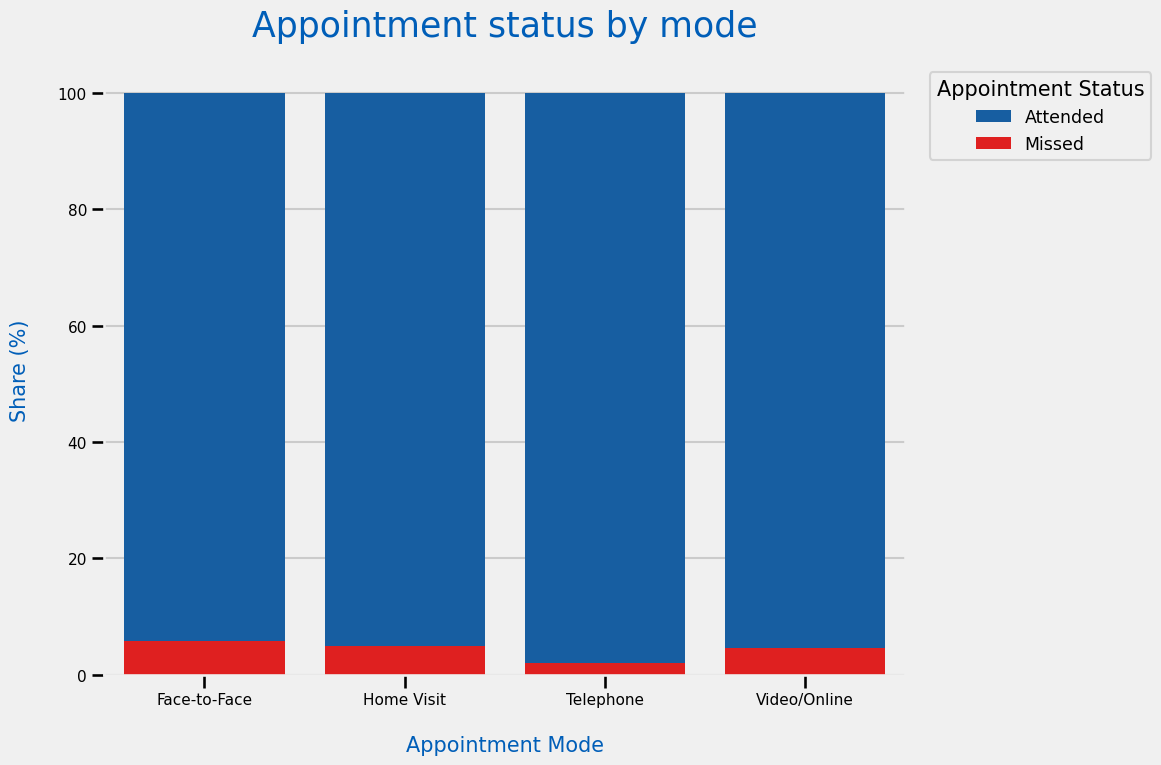

In [235]:
# Visualize in a graphic.
plt.figure(figsize = (12,8))
sns.barplot(x = 'appointment_mode', y = 'Attended', data = mode_grouped, color = '#005EB8', label = 'Attended', bottom=mode_grouped['DNA'])
sns.barplot(x = 'appointment_mode', y = 'DNA', data = mode_grouped, color = 'red', label = 'Missed')
plt.title('Appointment status by mode', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Appointment Mode', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.legend(title = 'Appointment Status', fontsize = 'x-small', title_fontsize = 'small', loc='best', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

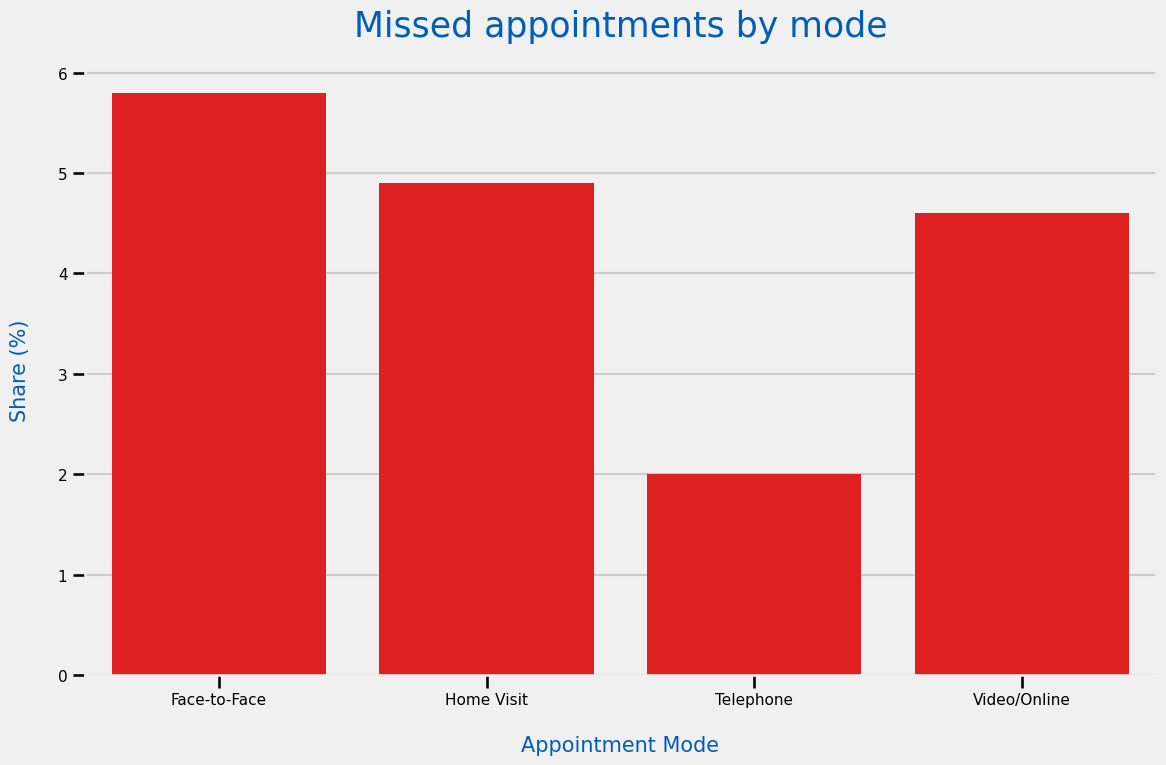

In [236]:
# Visualize in a graphic.
plt.figure(figsize = (12,8))
sns.barplot(x = 'appointment_mode', y = 'DNA', data = mode_grouped, color = 'red')
plt.title('Missed appointments by mode', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Appointment Mode', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.tight_layout()
plt.show()

<span style="color: #808080; font-style: italic;">Missed share by mode and month</span>

In [237]:
# Calculate shares.
missed_mode_pivot[['Attended', 'DNA']] = missed_mode_pivot[['Attended', 'DNA']].apply(lambda x: x/x.sum(), axis=1)

# Transform shares.
missed_mode_pivot['Attended'] = share(missed_mode_pivot['Attended'])
missed_mode_pivot['DNA'] = share(missed_mode_pivot['DNA'])

# Visualize.
missed_mode_pivot.head()

appointment_status appointment_month appointment_mode  Attended  DNA
0                         2020-01-01     Face-to-Face      94.5  5.5
1                         2020-01-01       Home Visit      95.6  4.4
2                         2020-01-01        Telephone      97.8  2.2
3                         2020-01-01     Video/Online      95.3  4.7
4                         2020-02-01     Face-to-Face      94.1  5.9

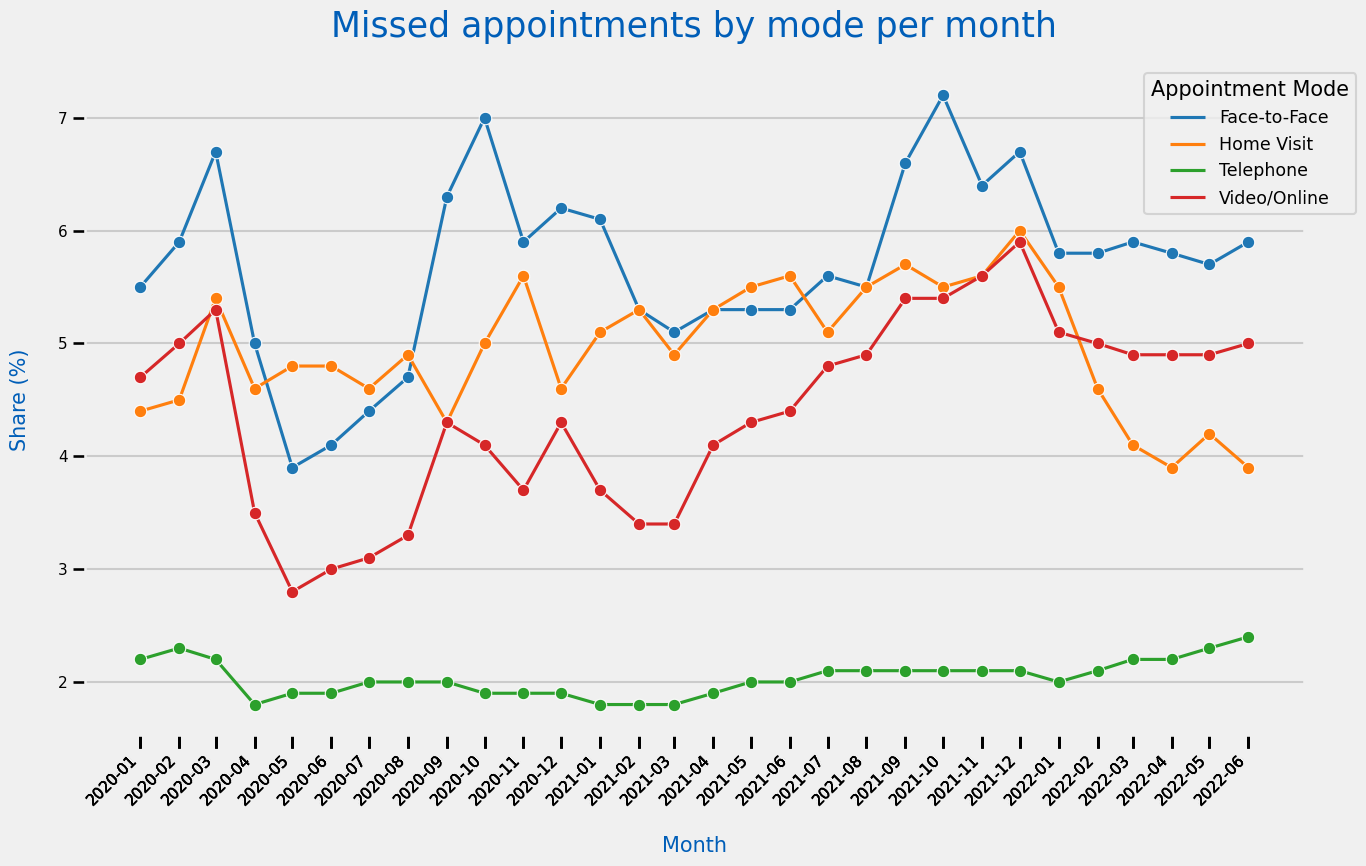

In [238]:
# Visualize the graphic.
plt.figure(figsize = (14,9))
sns.lineplot(x = 'appointment_month', y = 'DNA', data = missed_mode_pivot, hue = 'appointment_mode', marker = 'o')
plt.title('Missed appointments by mode per month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color ='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(ticks = missed_mode_pivot['appointment_month'], labels = missed_mode_pivot['appointment_month'].dt.strftime('%Y-%m'),
           rotation = 45, ha = 'right', size = 11)
plt.yticks(size = 11)
plt.grid(axis = 'x')
plt.legend(title = 'Appointment Mode', fontsize = 'x-small', title_fontsize = 'small', loc='best', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

**Missed appointments by time between the booking and the appointment**

In [239]:
ar_check.columns

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')

In [240]:
# Filter with relevant columns.
missed_time = ar_check.groupby(['appointment_month', 'appointment_status', 'time_between_book_and_appointment'])\
                                ['count_of_appointments'].sum().reset_index()

# Exclude Unknown / Data Quality.
missed_time = missed_time[missed_time['time_between_book_and_appointment'] != 'Unknown / Data Quality']

# Visualize.
missed_time.head(9)

appointment_month appointment_status time_between_book_and_appointment  \
0        2020-01-01           Attended                             1 Day   
1        2020-01-01           Attended                     15 to 21 Days   
2        2020-01-01           Attended                       2 to 7 Days   
3        2020-01-01           Attended                     22 to 28 Days   
4        2020-01-01           Attended                      8 to 14 Days   
5        2020-01-01           Attended                 More than 28 Days   
6        2020-01-01           Attended                          Same Day   
8        2020-01-01                DNA                             1 Day   
9        2020-01-01                DNA                     15 to 21 Days   

   count_of_appointments  
0                1742803  
1                1615655  
2                5007039  
3                1109532  
4                3017116  
5                1120115  
6               10920623  
8                  99345  
9                 141593

In [241]:
# Pivot DataFrame.
missed_time_pivot = missed_time.pivot(index = ['appointment_month', 'time_between_book_and_appointment'], columns = 'appointment_status',
                                  values = 'count_of_appointments').reset_index()

# Visualize.
missed_time_pivot.head()

appointment_status appointment_month time_between_book_and_appointment  \
0                         2020-01-01                             1 Day   
1                         2020-01-01                     15 to 21 Days   
2                         2020-01-01                       2 to 7 Days   
3                         2020-01-01                     22 to 28 Days   
4                         2020-01-01                      8 to 14 Days   

appointment_status  Attended     DNA  
0                    1742803   99345  
1                    1615655  141593  
2                    5007039  345082  
3                    1109532  100536  
4                    3017116  243839

<span style="color: #808080; font-style: italic;">Time between booking and appointment</span>

In [242]:
# Group by Appointment Mode.
time_grouped = missed_time_pivot.groupby('time_between_book_and_appointment')[['Attended', 'DNA']].sum().reset_index()

# Visualize
time_grouped

appointment_status time_between_book_and_appointment   Attended      DNA
0                                              1 Day   62556833  2634536
1                                      15 to 21 Days   35842753  3282752
2                                        2 to 7 Days  138103022  8697476
3                                      22 to 28 Days   20798309  1999990
4                                       8 to 14 Days   75092108  6193368
5                                  More than 28 Days   16699531  2036154
6                                           Same Day  328380317  6052604

In [243]:
# Calculate shares.
time_grouped[['Attended', 'DNA']] = time_grouped[['Attended', 'DNA']].apply(lambda x: x/x.sum(), axis=1)

# Transform shares.
time_grouped['Attended'] = share(time_grouped['Attended'])
time_grouped['DNA'] = share(time_grouped['DNA'])

# Visualize.
time_grouped

appointment_status time_between_book_and_appointment  Attended   DNA
0                                              1 Day      96.0   4.0
1                                      15 to 21 Days      91.6   8.4
2                                        2 to 7 Days      94.1   5.9
3                                      22 to 28 Days      91.2   8.8
4                                       8 to 14 Days      92.4   7.6
5                                  More than 28 Days      89.1  10.9
6                                           Same Day      98.2   1.8

In [244]:
time_grouped['time_between_book_and_appointment'].unique()

array(['1 Day', '15 to 21 Days', '2 to 7 Days', '22 to 28 Days',
       '8 to 14 Days', 'More than 28 Days', 'Same Day'], dtype=object)

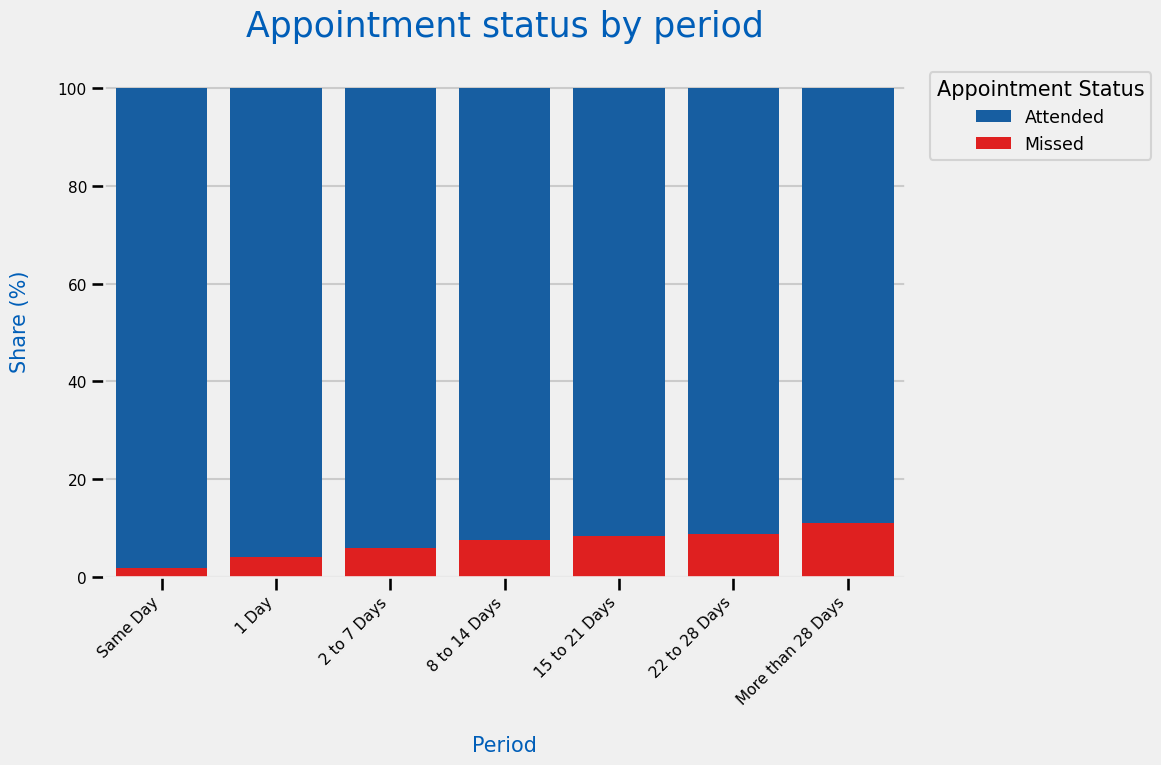

In [245]:
# Define the order for x axis.
custom_order = ['Same Day', '1 Day', '2 to 7 Days', '8 to 14 Days', '15 to 21 Days', '22 to 28 Days', 'More than 28 Days']

# Sort the DataFrame in that order.
time_grouped_sorted = time_grouped.set_index('time_between_book_and_appointment').loc[custom_order].reset_index()

# Visualize in a graphic.
plt.figure(figsize = (12,8))
sns.barplot(x = 'time_between_book_and_appointment', y = 'Attended', data = time_grouped_sorted,
            color = '#005EB8', label = 'Attended', bottom = time_grouped_sorted['DNA'])
sns.barplot(x = 'time_between_book_and_appointment', y = 'DNA', data = time_grouped_sorted,
            color = 'red', label = 'Missed')
plt.title('Appointment status by period', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Period', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(rotation = 45, ha = 'right', size = 11)
plt.yticks(size = 11)
plt.legend(title = 'Appointment Status', fontsize = 'x-small', title_fontsize = 'small', loc='best', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

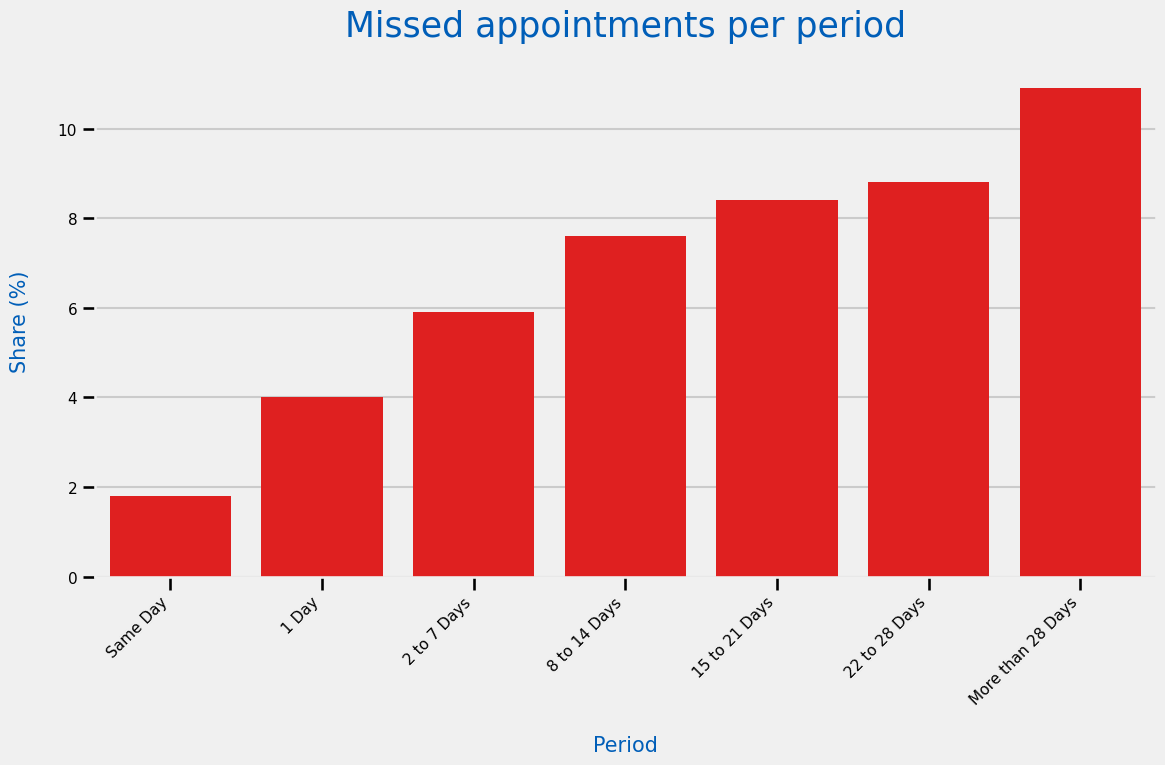

In [246]:
# Visualize in a graphic.
plt.figure(figsize = (12,8))
sns.barplot(x = 'time_between_book_and_appointment', y = 'DNA', data = time_grouped_sorted, color = 'red')
plt.title('Missed appointments per period', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Period', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(rotation = 45, ha = 'right', size = 11)
plt.yticks(size = 11)
plt.tight_layout()
plt.show()

<span style="color: #808080; font-style: italic;">Missed share by time between booking and the appointment and sonth</span>

In [247]:
# Calculate shares.
missed_time_pivot[['Attended', 'DNA']] = missed_time_pivot[['Attended', 'DNA']].apply(lambda x: x/x.sum(), axis=1)

# Transform shares.
missed_time_pivot['Attended'] = share(missed_time_pivot['Attended'])
missed_time_pivot['DNA'] = share(missed_time_pivot['DNA'])

# Visualize.
missed_time_pivot.head()

appointment_status appointment_month time_between_book_and_appointment  \
0                         2020-01-01                             1 Day   
1                         2020-01-01                     15 to 21 Days   
2                         2020-01-01                       2 to 7 Days   
3                         2020-01-01                     22 to 28 Days   
4                         2020-01-01                      8 to 14 Days   

appointment_status  Attended  DNA  
0                       94.6  5.4  
1                       91.9  8.1  
2                       93.6  6.4  
3                       91.7  8.3  
4                       92.5  7.5

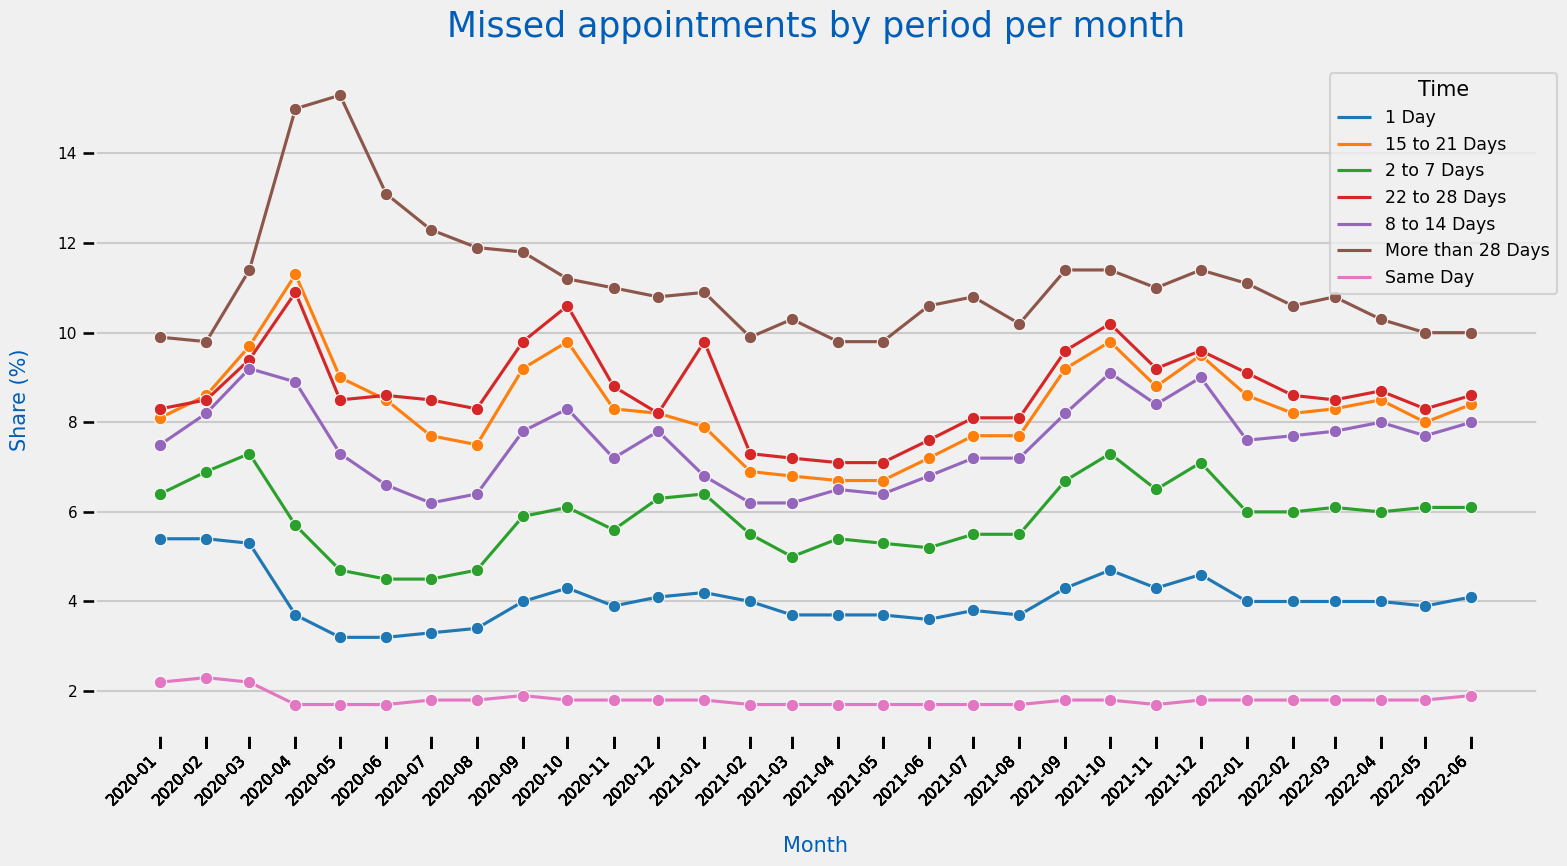

In [248]:
# Visualize the graphic.
plt.figure(figsize = (16,9))
sns.lineplot(x = 'appointment_month', y = 'DNA', data = missed_time_pivot, hue = 'time_between_book_and_appointment', marker = 'o')
plt.title('Missed appointments by period per month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(ticks = missed_time_pivot['appointment_month'], labels = missed_time_pivot['appointment_month'].dt.strftime('%Y-%m'),
           rotation = 45, ha = 'right', size = 11)
plt.yticks(size = 11)
plt.grid(axis = 'x')
plt.legend(title = 'Time', fontsize = 'x-small', title_fontsize = 'small', loc='best', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

**Missed appointments by region**

In [249]:
# Filter with relevant columns.
missed_region = ar_check.groupby(['appointment_month', 'appointment_status', 'icb_ons_code'])['count_of_appointments'].sum().reset_index()

# Visualize.
missed_region.head()

appointment_month appointment_status icb_ons_code  count_of_appointments
0        2020-01-01           Attended    E54000008                1076386
1        2020-01-01           Attended    E54000010                 433319
2        2020-01-01           Attended    E54000011                 224715
3        2020-01-01           Attended    E54000013                 358516
4        2020-01-01           Attended    E54000015                 509096

<span style="color: #808080; font-style: italic;">Create the DataFrame</span>

In [250]:
# Merge with regions.
missed_region_merged = pd.merge(missed_region, regions, on = 'icb_ons_code', how = 'left')

# Visualize.
missed_region_merged.head()

appointment_month appointment_status icb_ons_code  count_of_appointments  \
0        2020-01-01           Attended    E54000008                1076386   
1        2020-01-01           Attended    E54000010                 433319   
2        2020-01-01           Attended    E54000011                 224715   
3        2020-01-01           Attended    E54000013                 358516   
4        2020-01-01           Attended    E54000015                 509096   

  region_ons_code region_code region_name  
0       E40000010         Y62  North West  
1       E40000011         Y60    Midlands  
2       E40000011         Y60    Midlands  
3       E40000011         Y60    Midlands  
4       E40000011         Y60    Midlands

In [251]:
# Filter the columns needed.
missed_region_filtered = missed_region_merged.groupby(['appointment_month', 'region_name', 'appointment_status'])\
                                                      ['count_of_appointments'].sum().reset_index()

# Visualize.
missed_region_filtered.head()

appointment_month      region_name appointment_status  count_of_appointments
0        2020-01-01  East of England           Attended                2882214
1        2020-01-01  East of England                DNA                 128642
2        2020-01-01           London           Attended                3344563
3        2020-01-01           London                DNA                 233640
4        2020-01-01         Midlands           Attended                4798500

In [252]:
# Pivot DataFrame.
missed_region_pivot = missed_region_filtered.pivot(index = ['appointment_month', 'region_name'], columns = 'appointment_status',
                                                     values = 'count_of_appointments').reset_index()

# Visualize.
missed_region_pivot.head()

appointment_status appointment_month               region_name  Attended  \
0                         2020-01-01           East of England   2882214   
1                         2020-01-01                    London   3344563   
2                         2020-01-01                  Midlands   4798500   
3                         2020-01-01  North East and Yorkshire   4016963   
4                         2020-01-01                North West   2929357   

appointment_status     DNA  
0                   128642  
1                   233640  
2                   258711  
3                   198574  
4                   180883

<span style="color: #808080; font-style: italic;">Region analysis</span>

In [253]:
# Group by Region.
region_grouped = missed_region_pivot.groupby('region_name')[['Attended', 'DNA']].sum().reset_index()

# Calculate shares.
region_grouped[['Attended', 'DNA']] = region_grouped[['Attended', 'DNA']].apply(lambda x: x/x.sum(), axis=1)

# Transform shares.
region_grouped['Attended'] = share(region_grouped['Attended'])
region_grouped['DNA'] = share(region_grouped['DNA'])

# Visualize.
region_grouped

appointment_status               region_name  Attended  DNA
0                            East of England      96.6  3.4
1                                     London      94.7  5.3
2                                   Midlands      95.6  4.4
3                   North East and Yorkshire      96.2  3.8
4                                 North West      94.6  5.4
5                                 South East      95.7  4.3
6                                 South West      96.1  3.9

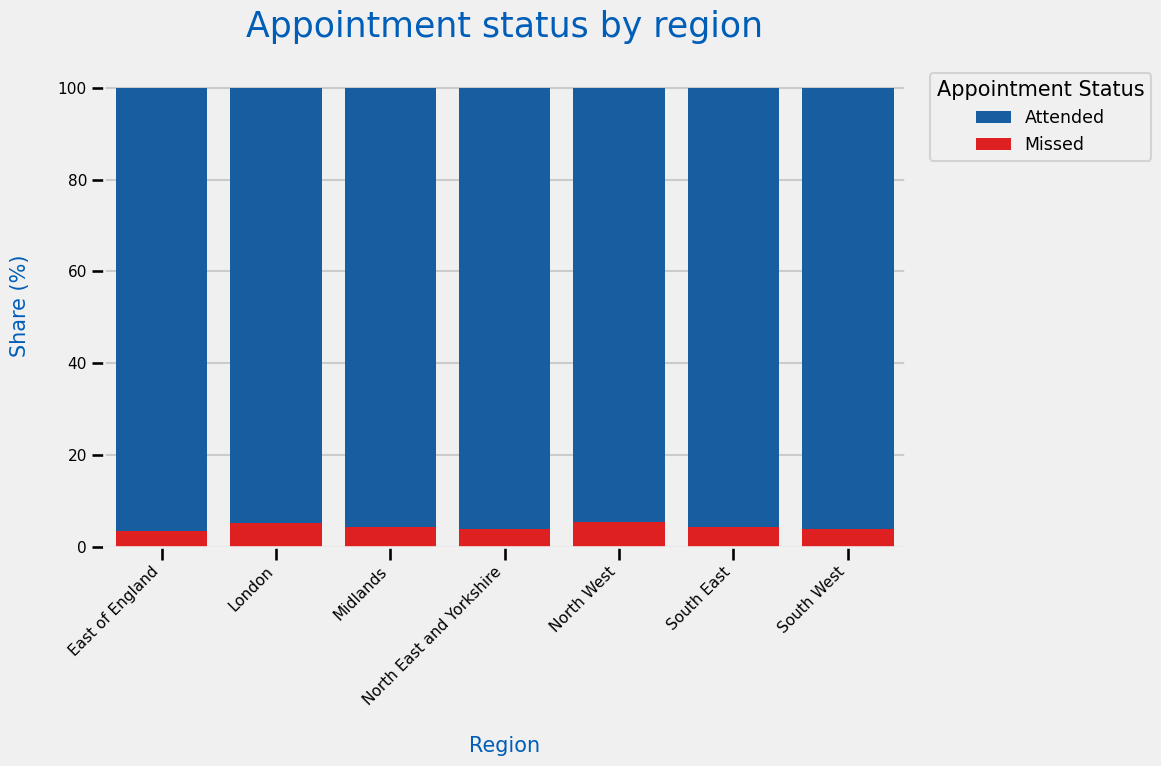

In [254]:
# Visualize in a graphic.
plt.figure(figsize = (12,8))
sns.barplot(x = 'region_name', y = 'Attended', data = region_grouped, color = '#005EB8', label = 'Attended', bottom = region_grouped['DNA'])
sns.barplot(x = 'region_name', y = 'DNA', data = region_grouped, color = 'red', label = 'Missed')
plt.title('Appointment status by region', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Region', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(rotation = 45, ha = 'right', size = 11)
plt.yticks(size = 11)
plt.legend(title = 'Appointment Status', fontsize = 'x-small', title_fontsize = 'small', loc='best', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

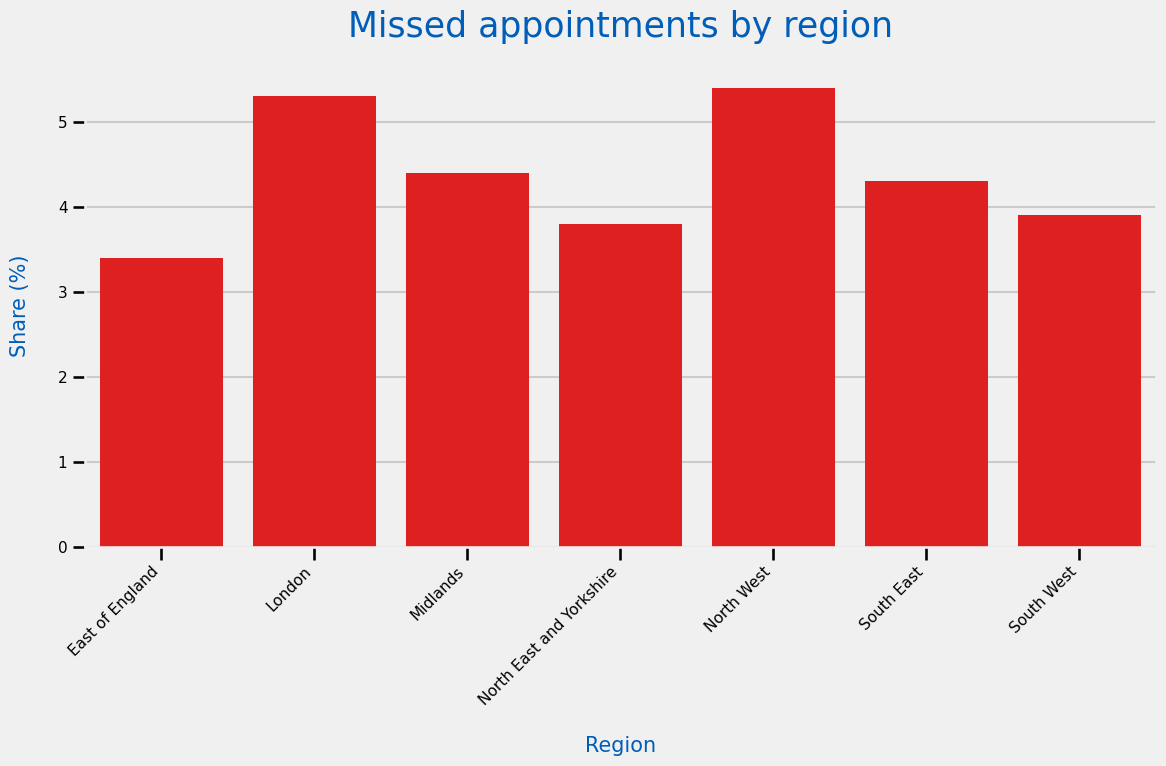

In [255]:
# Visualize in a graphic.
plt.figure(figsize = (12,8))
sns.barplot(x = 'region_name', y = 'DNA', data = region_grouped, color = 'red')
plt.title('Missed appointments by region', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Region', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(rotation = 45, ha = 'right', size = 11)
plt.yticks(size = 11)
plt.tight_layout()
plt.show()

<span style="color: #808080; font-style: italic;">Missed share by region and month</span>

In [256]:
# Calculate shares.
missed_region_pivot[['Attended', 'DNA']] = missed_region_pivot[['Attended', 'DNA']].apply(lambda x: x/x.sum(), axis=1)

# Transform shares.
missed_region_pivot['Attended'] = share(missed_region_pivot['Attended'])
missed_region_pivot['DNA'] = share(missed_region_pivot['DNA'])

# Visualize.
missed_region_pivot.head()

appointment_status appointment_month               region_name  Attended  DNA
0                         2020-01-01           East of England      95.7  4.3
1                         2020-01-01                    London      93.5  6.5
2                         2020-01-01                  Midlands      94.9  5.1
3                         2020-01-01  North East and Yorkshire      95.3  4.7
4                         2020-01-01                North West      94.2  5.8

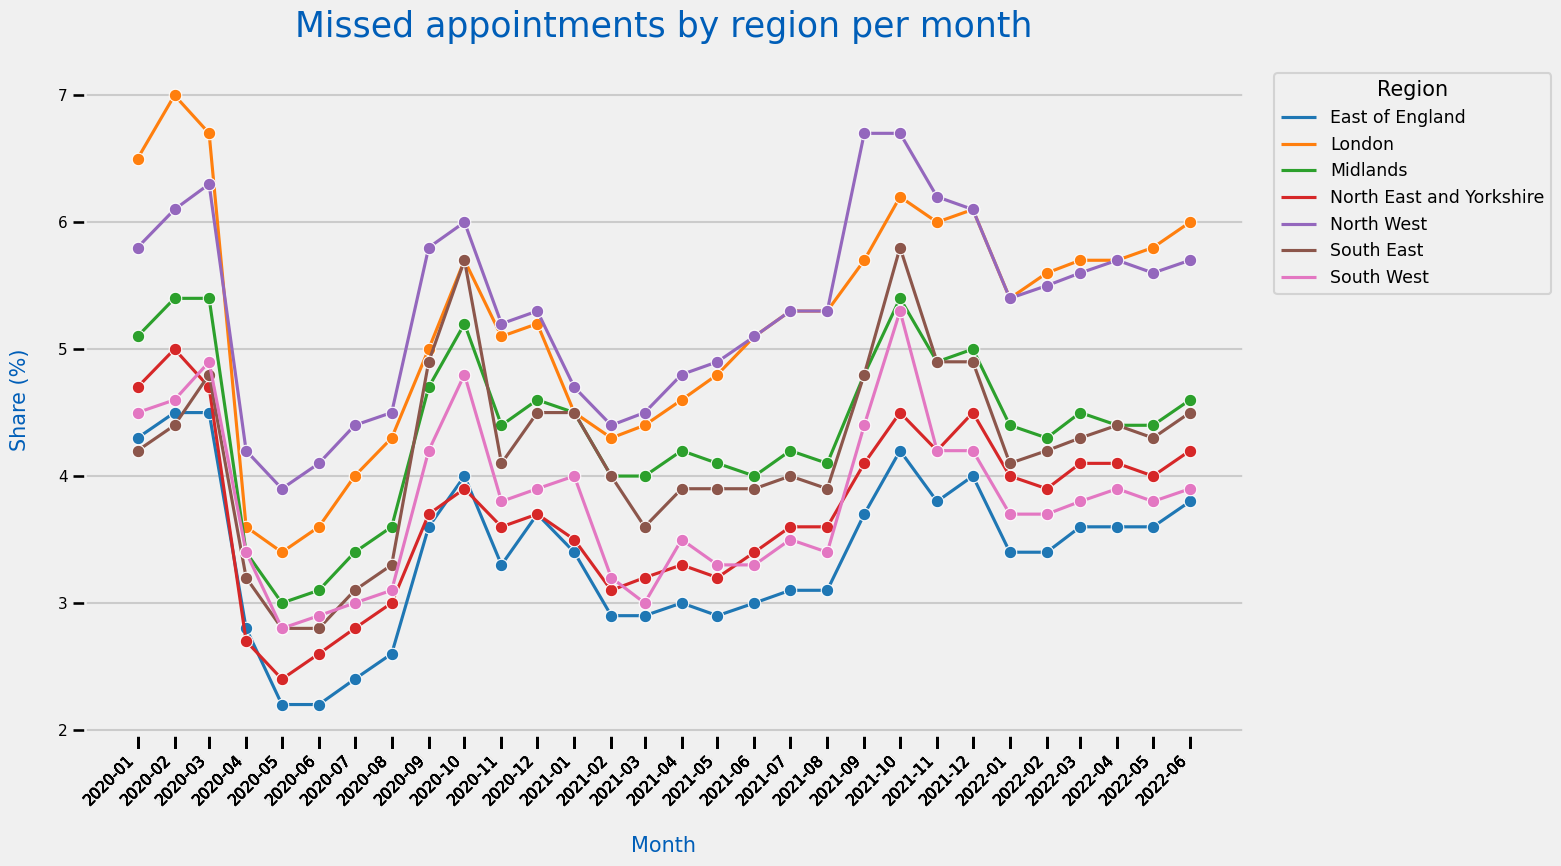

In [257]:
# Visualize the graphic.
plt.figure(figsize = (16,9))
sns.set_palette('tab10')
sns.lineplot(x = 'appointment_month', y = 'DNA', data = missed_region_pivot, hue = 'region_name', marker = 'o')
plt.title('Missed appointments by region per month', color = '#005EB8', size = 25, pad = 20)
plt.xlabel('Month', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color='#005EB8', size = 15, ha = 'center', labelpad = 20)
plt.xticks(ticks = missed_region_pivot['appointment_month'], labels = missed_region_pivot['appointment_month'].dt.strftime('%Y-%m'),
           rotation = 45, ha = 'right', size = 11)
plt.yticks(size = 11)
plt.grid(axis='x')
plt.legend(title = 'Region', fontsize = 'x-small', title_fontsize = 'small', loc='best', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

<div style="color:#005EB8; font-weight:bold;">
    
## Utilisation of resources
    
</div>

NHS guidelines for maximum capacity - 1,200,000 appointments per day

In [258]:
# Subset the data.
nc_day = nc.groupby('appointment_date')['count_of_appointments'].sum().reset_index()

# Visualize.
nc_day.head()

appointment_date  count_of_appointments
0       2021-08-01                   5627
1       2021-08-02                1222768
2       2021-08-03                1169920
3       2021-08-04                1093532
4       2021-08-05                1074043

In [259]:
# Max capacity per month.
max_capacity_day = 1200000

# Apply the function to the DataFrame.
nc_day['over_capacity_day'] = nc_day['count_of_appointments'].apply(capacity_day)

# Visualize.
nc_day.head()

appointment_date  count_of_appointments over_capacity_day
0       2021-08-01                   5627                No
1       2021-08-02                1222768               Yes
2       2021-08-03                1169920                No
3       2021-08-04                1093532                No
4       2021-08-05                1074043                No

In [260]:
days_over = nc_day[nc_day['over_capacity_day'] == 'Yes']['over_capacity_day'].count()
days_under = nc_day[nc_day['over_capacity_day'] == 'No']['over_capacity_day'].count()
share_of_days_over = ((nc_day[nc_day['over_capacity_day'] == 'Yes']['over_capacity_day'].count()/nc_day['appointment_date'].count())
                                    * 100).round(1)

# Check results.
print("Total days -", nc_day['appointment_date'].count())
print("Days over capacity -", days_over)
print("Days under capacity -", days_under)
print("% of days over capacity -", share_of_days_over, "%")

Total days - 334
Days over capacity - 175
Days under capacity - 159
% of days over capacity - 52.4 %


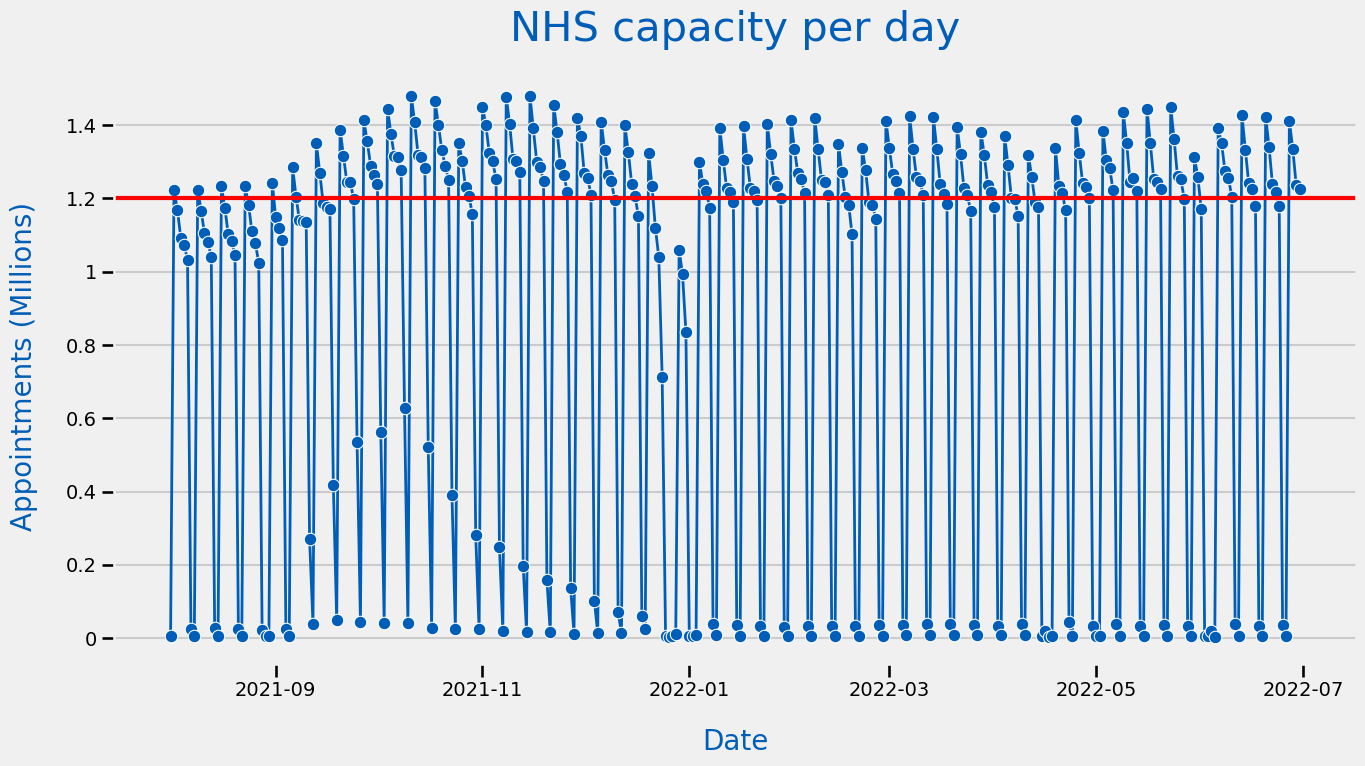

In [261]:
# Visualize in a graphic.
plt.figure(figsize = (14,8))
sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', data = nc_day, color = '#005EB8', errorbar=None, marker = 'o', linewidth = 2)
plt.axhline(y = max_capacity_day, color = 'red', linestyle = '-', label = 'Max Capacity Day', linewidth = 3)
plt.title('NHS capacity per day', color = '#005EB8', size = 30, pad = 20)
plt.xlabel('Date', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.xticks(size = 14)
plt.yticks([0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6, 1.2e6, 1.4e6], ['0', '0.2', '0.4', '0.6', '0.8', '1', '1.2', '1.4'], size = 14)
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

<span style="color: #808080; font-style: italic;">NHS capacity per weekday</span>

In [262]:
# Use a new DataFrame.
nc_weekday = nc_day.copy()

# Create day of week.
nc_weekday['day_of_week'] = nc_weekday['appointment_date'].dt.day_name()

# Filter weekdays.
nc_weekday = nc_weekday[nc_weekday['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Visualize.
nc_weekday.head(7)

appointment_date  count_of_appointments over_capacity_day day_of_week
1       2021-08-02                1222768               Yes      Monday
2       2021-08-03                1169920                No     Tuesday
3       2021-08-04                1093532                No   Wednesday
4       2021-08-05                1074043                No    Thursday
5       2021-08-06                1032165                No      Friday
8       2021-08-09                1223650               Yes      Monday
9       2021-08-10                1167188                No     Tuesday

In [263]:
weekdays_over = nc_weekday[nc_weekday['over_capacity_day'] == 'Yes']['over_capacity_day'].count()
weekdays_under = nc_weekday[nc_weekday['over_capacity_day'] == 'No']['over_capacity_day'].count()
share_of_weekdays_over = ((nc_weekday[nc_weekday['over_capacity_day'] == 'Yes']['over_capacity_day'].count()\
                           /nc_weekday['appointment_date'].count())* 100).round(1)

# Check results.
print("Total days -", nc_weekday['appointment_date'].count())
print("Days over capacity -", weekdays_over)
print("Days under capacity -", weekdays_under)
print("% of days over capacity -", share_of_weekdays_over, "%")

Total days - 239
Days over capacity - 175
Days under capacity - 64
% of days over capacity - 73.2 %


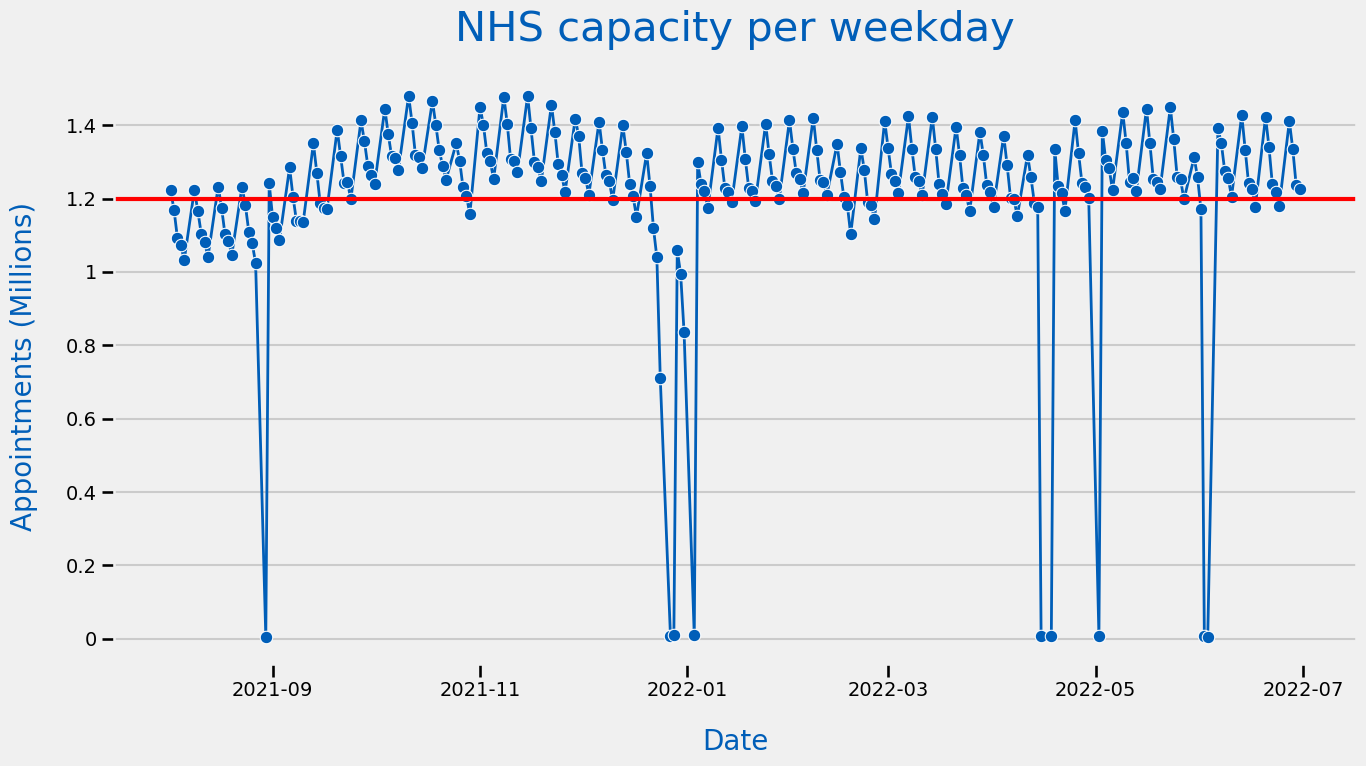

In [264]:
# Visualize in a graphic.
plt.figure(figsize = (14,8))
sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', data = nc_weekday, color = '#005EB8', errorbar=None, marker = 'o', linewidth = 2)
plt.axhline(y = max_capacity_day, color = 'red', linestyle = '-', label = 'Max Capacity Day', linewidth = 3)
plt.title('NHS capacity per weekday', color = '#005EB8', size = 30, pad = 20)
plt.xlabel('Date', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.ylabel('Appointments (Millions)', color='#005EB8', size = 20, ha = 'center', labelpad = 20)
plt.xticks(size = 14)
plt.yticks([0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6, 1.2e6, 1.4e6], ['0', '0.2', '0.4', '0.6', '0.8', '1', '1.2', '1.4'], size = 14)
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

In [265]:
# Check the low values.
lower_points = nc_weekday[nc_weekday['count_of_appointments'] < 1000000]

# Visualize.
lower_points

appointment_date  count_of_appointments over_capacity_day day_of_week
29        2021-08-30                   5344                No      Monday
145       2021-12-24                 711488                No      Friday
148       2021-12-27                   7258                No      Monday
149       2021-12-28                  10216                No     Tuesday
151       2021-12-30                 993878                No    Thursday
152       2021-12-31                 836278                No      Friday
155       2022-01-03                   9123                No      Monday
257       2022-04-15                   6901                No      Friday
260       2022-04-18                   6683                No      Monday
274       2022-05-02                   6622                No      Monday
305       2022-06-02                   6441                No    Thursday
306       2022-06-03                   5408                No      Friday

Lower values are bank holidays and days around Christmas and New Year.

<div style="background-color:#005EB8; color:white; padding:20px; text-align:center; font-weight:bold; border-radius: 8px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">

<h2 style="font-size: 24px;">End of analysis</h2>
    
</div>
